# **Tabular Deep Learning vs Classical Machine Learning for Urban Land Cover Classification**

**Muntasir Tabasum, Department of Geology and Geography, West Virginia University, Morgantown, WV 26506, USA**

**Contact: mt00079@mix.wvu.edu (Muntasir Tabasum)**

# Import Necessary Libraries

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import xlrd
import csv
# Import a scoring metric to compare methods
from sklearn.metrics import r2_score
%matplotlib inline
import time
%matplotlib inline
#for HD images
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#ignore warning
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
import pandas as pd
df1= pd.read_csv('urbantraining.csv')

df1.head()

class  BrdIndx  Area  Round  Bright  Compact  ShpIndx  Mean_G  Mean_R  \
0       car      1.27    91   0.97  231.38     1.39     1.47  207.92  241.74   
1  concrete      2.36   241   1.56  216.15     2.46     2.51  187.85  229.39   
2  concrete      2.12   266   1.47  232.18     2.07     2.21  206.54  244.22   
3  concrete      2.42   399   1.28  230.40     2.49     2.73  204.60  243.27   
4  concrete      2.15   944   1.73  193.18     2.28     4.10  165.98  205.55   

   Mean_NIR  ...  SD_NIR_140  LW_140  GLCM1_140  Rect_140  GLCM2_140  \
0    244.48  ...       26.18    2.00       0.50      0.85       6.29   
1    231.20  ...       22.29    2.25       0.79      0.55       8.42   
2    245.79  ...       15.59    2.19       0.76      0.74       7.24   
3    243.32  ...       13.51    3.34       0.82      0.74       7.44   
4    208.00  ...       15.65   50.08       0.85      0.49       8.15   

   Dens_140  Assym_140  NDVI_140  BordLngth_140  GLCM3_140  
0      1.67       0.70     -0.08             56    3806.36  
1      1.38       0.81     -0.09           1746    1450.14  
2      1.68       0.81     -0.07            566    1094.04  
3      1.36       0.92     -0.09           1178    1125.38  
4      0.23       1.00     -0.08           6232    1146.38  

[5 rows x 148 columns]

In [4]:
df1.shape

(168, 148)

In [5]:
df2= pd.read_csv('urbantesting.csv')

df2.head()

class  BrdIndx  Area  Round  Bright  Compact  ShpIndx  Mean_G  Mean_R  \
0  concrete      1.32   131   0.81  222.74     1.66     2.18  192.94  235.11   
1    shadow      1.59   864   0.94   47.56     1.41     1.87   36.82   48.78   
2    shadow      1.41   409   1.00   51.38     1.37     1.53   41.72   51.96   
3      tree      2.58   187   1.91   70.08     3.41     3.11   93.13   55.20   
4   asphalt      2.60   116   2.05   89.57     3.06     3.02   73.17   94.89   

   Mean_NIR  ...  SD_NIR_140  LW_140  GLCM1_140  Rect_140  GLCM2_140  \
0    240.15  ...       31.15    5.04       0.80      0.58       8.56   
1     57.09  ...       12.01    3.70       0.52      0.96       7.01   
2     60.48  ...       18.75    3.09       0.90      0.63       8.32   
3     61.92  ...       27.67    6.33       0.89      0.70       8.56   
4    100.64  ...       32.05    1.01       0.83      0.75       8.62   

   Dens_140  Assym_140  NDVI_140  BordLngth_140  GLCM3_140  
0      0.82       0.98     -0.10           1512    1287.52  
1      1.69       0.86     -0.14            196    2659.74  
2      1.38       0.84      0.10           1198     720.38  
3      1.10       0.96      0.20            524     891.36  
4      2.08       0.08     -0.10            496    1194.76  

[5 rows x 148 columns]

In [6]:
df2.shape

(507, 148)

# Validation Split and Label Encoder

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Preparing features (X) and target (y) for the training dataset
X_train_full = df1.drop(columns=['class'])  # Assuming 'class' is the target column
y_train_full = df1['class']

# Encoding the target labels for the training dataset
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_full)

# Creating a validation split from the training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_encoded, test_size=0.1, random_state=None
)

# Preparing features (X) and target (y) for the testing dataset
X_test = df2.drop(columns=['class'])  # Testing dataset features
y_test = label_encoder.transform(df2['class'])  # Transforming test labels using the same encoder

# Displaying the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train length:", len(y_train))
print("y_val length:", len(y_val))
print("y_test length:", len(y_test))

# Optional: Display the mapping of class labels for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

X_train shape: (151, 147)
X_val shape: (17, 147)
X_test shape: (507, 147)
y_train length: 151
y_val length: 17
y_test length: 507
Label Mapping: {'asphalt ': 0, 'building ': 1, 'car ': 2, 'concrete ': 3, 'grass ': 4, 'pool ': 5, 'shadow ': 6, 'soil ': 7, 'tree ': 8}


# Normalization

In [41]:
from scipy.stats import zscore
import pandas as pd

# Applying z-score normalization and converting to DataFrames
X_train_scaled = pd.DataFrame(X_train.apply(zscore, axis=0), columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val.apply(zscore, axis=0), columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test.apply(zscore, axis=0), columns=X_test.columns)

# Displaying the shapes of the scaled datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (151, 147)
X_val_scaled shape: (17, 147)
X_test_scaled shape: (507, 147)


In [18]:
X_train_scaled.head()

BrdIndx      Area     Round    Bright   Compact   ShpIndx    Mean_G  \
29   1.144273 -0.346316  1.584773  0.565102  0.915130  1.555723  0.296289   
53  -0.954526 -0.657133 -1.241693  1.159913 -0.861839 -0.956498  0.996421   
89   0.063073 -0.513439 -0.212052  0.773343 -0.486219 -0.037743  1.208893   
151 -1.622326 -0.821132 -2.109821 -0.342559 -1.223011 -1.559430 -0.365930   
125 -0.652426 -0.480639 -0.474509 -1.498344 -0.529560 -0.841653 -1.544560   

       Mean_R  Mean_NIR      SD_G  ...  SD_NIR_140    LW_140  GLCM1_140  \
29   0.635035  0.595814 -0.522741  ...    0.726451 -0.182578   1.172133   
53   1.089271  1.082851  1.865521  ...    1.086644 -0.177872  -1.854990   
89   0.498438  0.448827 -0.815523  ...   -0.753820 -0.275140  -0.057636   
151  0.062604 -0.655885  2.095563  ...    2.033733 -0.330050  -0.341428   
125 -1.258488 -1.312649 -0.411903  ...    0.594537 -0.272002   1.455926   

     Rect_140  GLCM2_140  Dens_140  Assym_140  NDVI_140  BordLngth_140  \
29   0.609976  -0.190439  0.307929   0.604331 -0.556272      -0.911894   
53   1.464923  -1.535156  0.549645   0.060904 -0.299596      -1.067392   
89   0.381990  -0.604198  0.725438  -1.067752  0.342092       0.611990   
151  1.122944  -0.648529  0.967154  -1.694783 -0.812947      -1.038514   
125 -1.498894   1.907911 -0.417218  -0.816940  1.368794       1.860419   

     GLCM3_140  
29   -1.145636  
53    2.544971  
89   -0.100644  
151   0.987452  
125  -1.459052  

[5 rows x 147 columns]

# Traditional Machine Learning

# Logistic Regression

Test Accuracy: 0.7061
Macro Precision: 0.6913
Macro Recall: 0.7331
Macro F1-Score: 0.7066
One-vs-All AUC: 0.9459


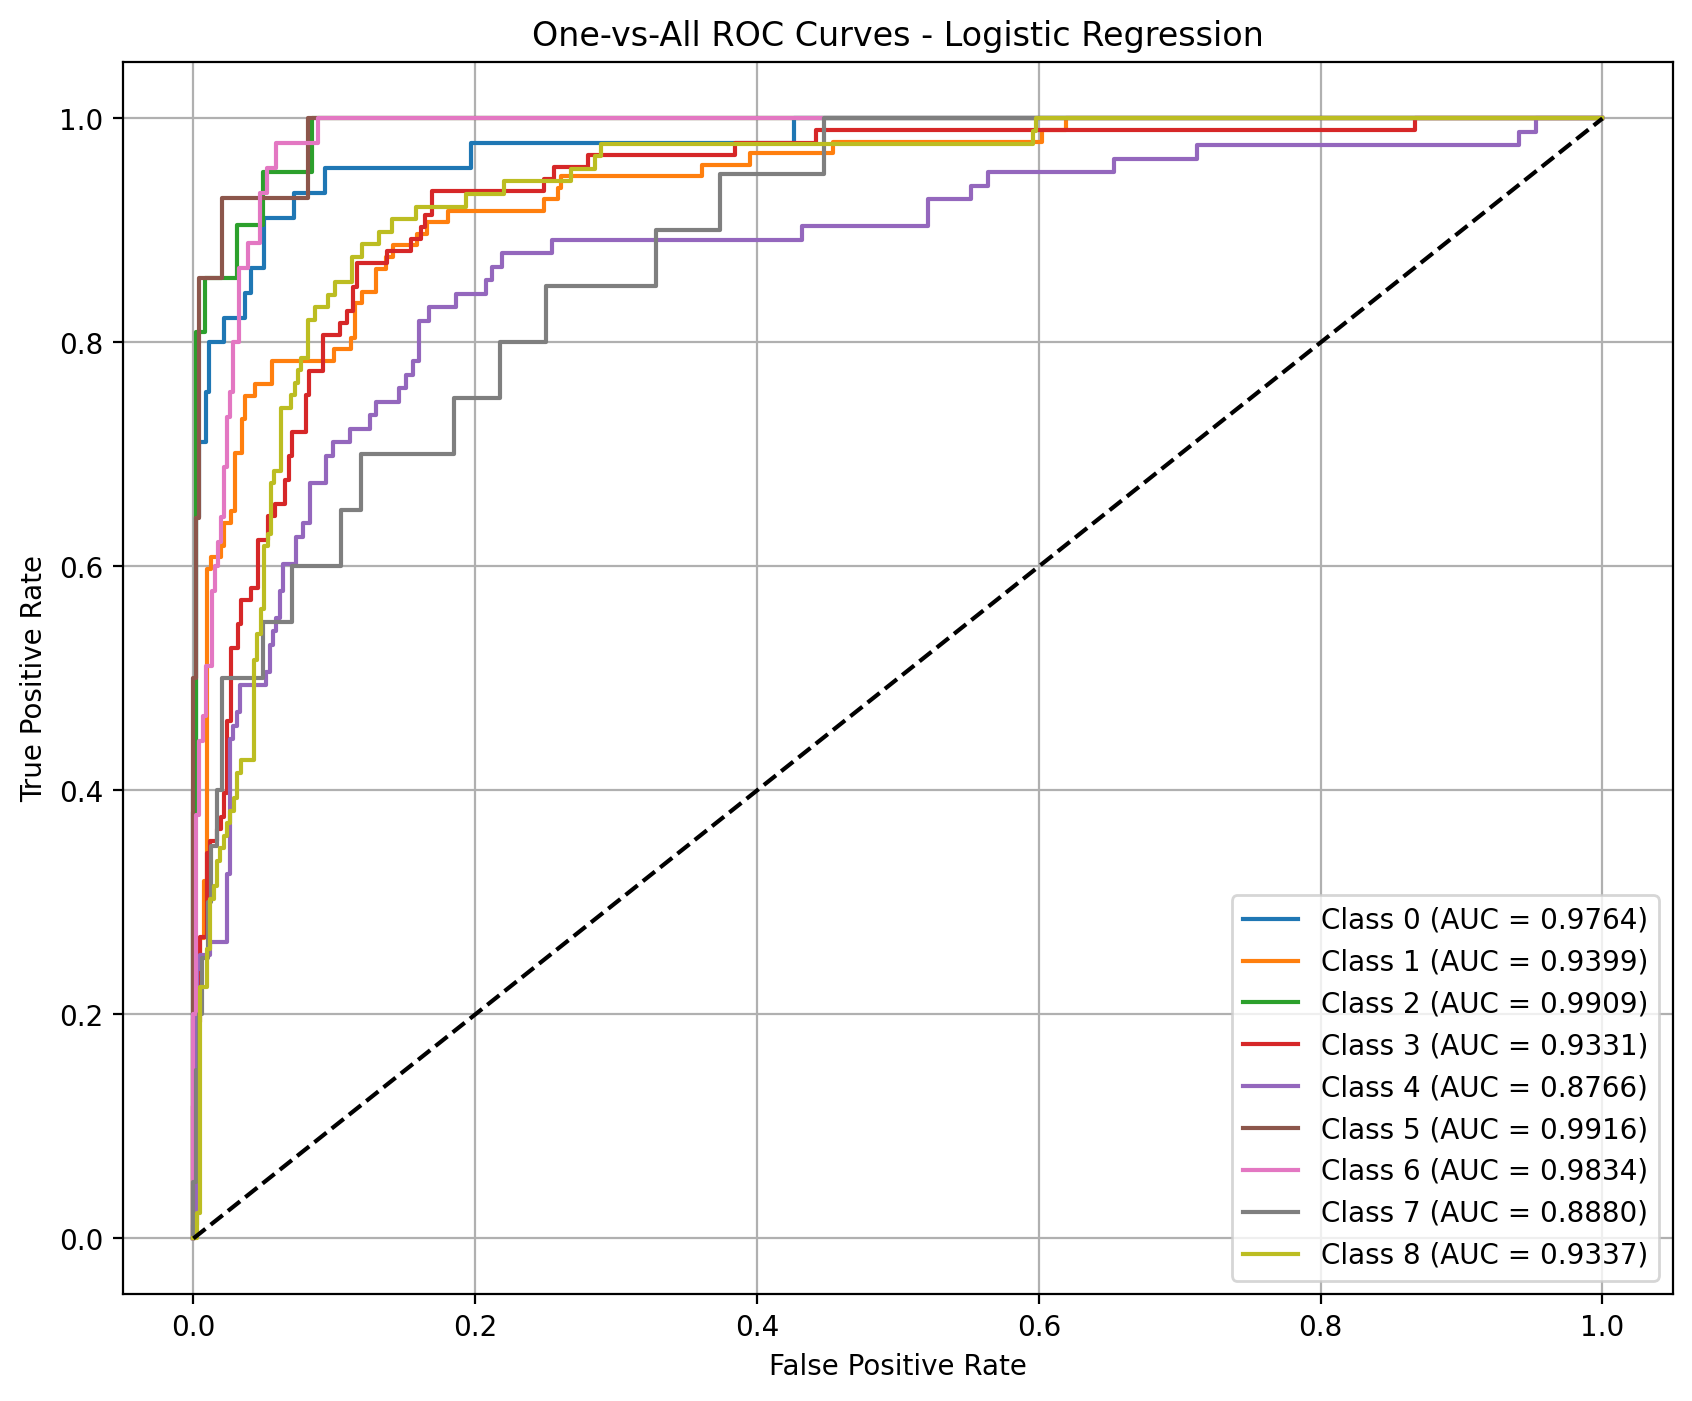

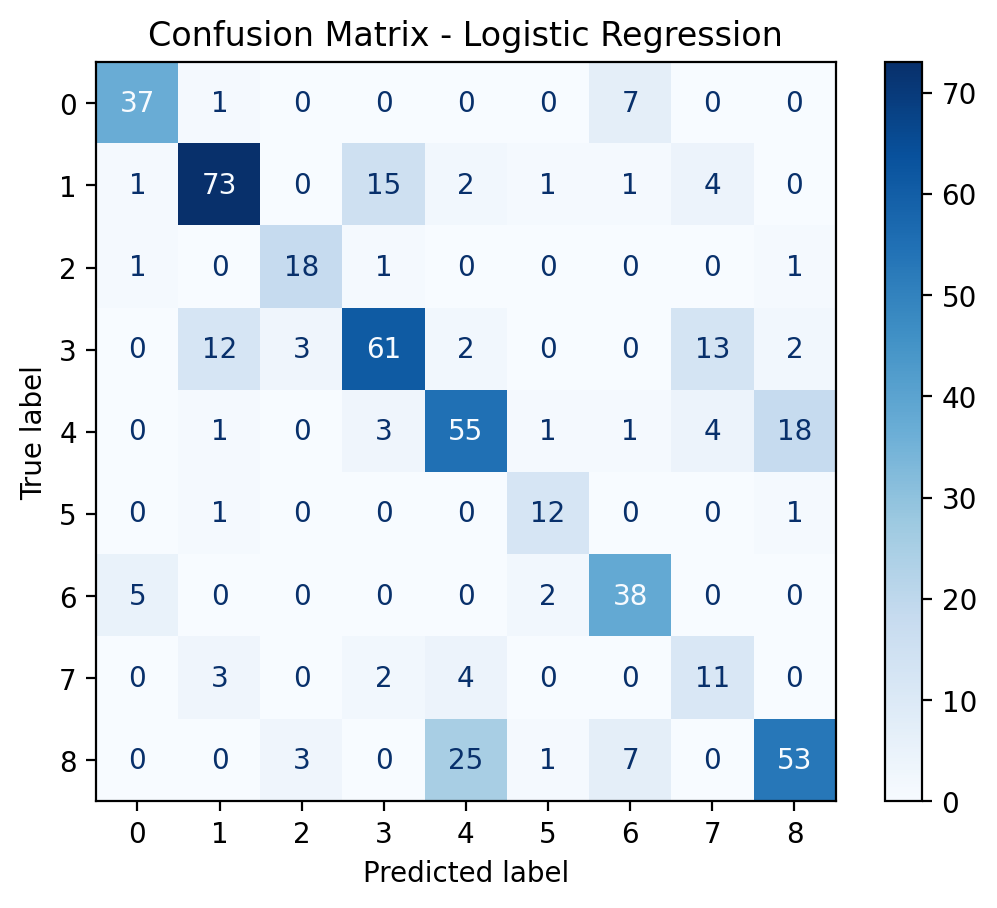

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizing the labels for OvA (One-vs-All) metrics
class_labels = list(set(y_train))  # Get unique class labels
y_test_binarized = label_binarize(y_test, classes=class_labels)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = logistic_model.predict(X_test_scaled)
y_prob = logistic_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest

Test Accuracy: 0.7929
Macro Precision: 0.8257
Macro Recall: 0.7665
Macro F1-Score: 0.7693
One-vs-All AUC: 0.9693


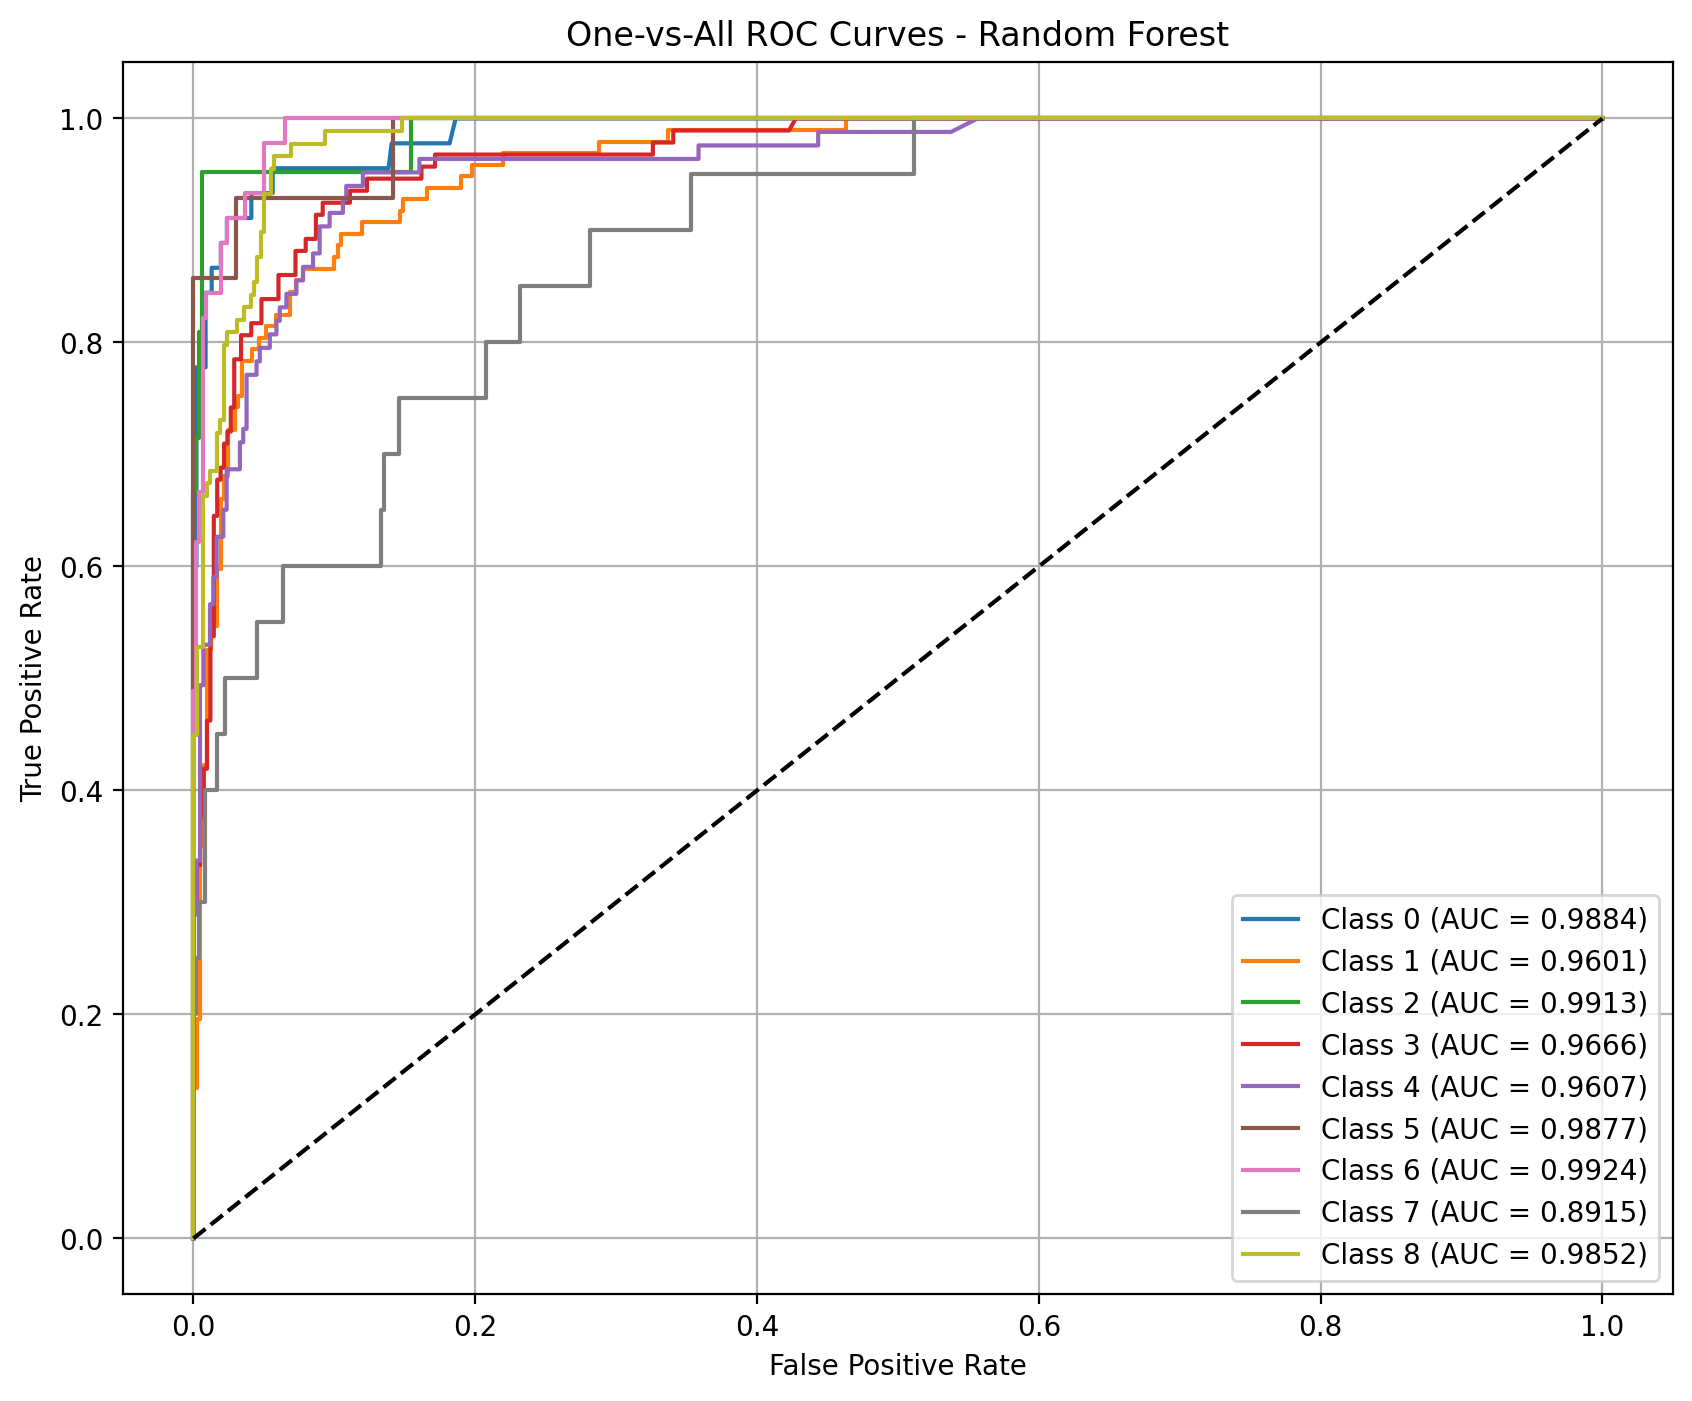

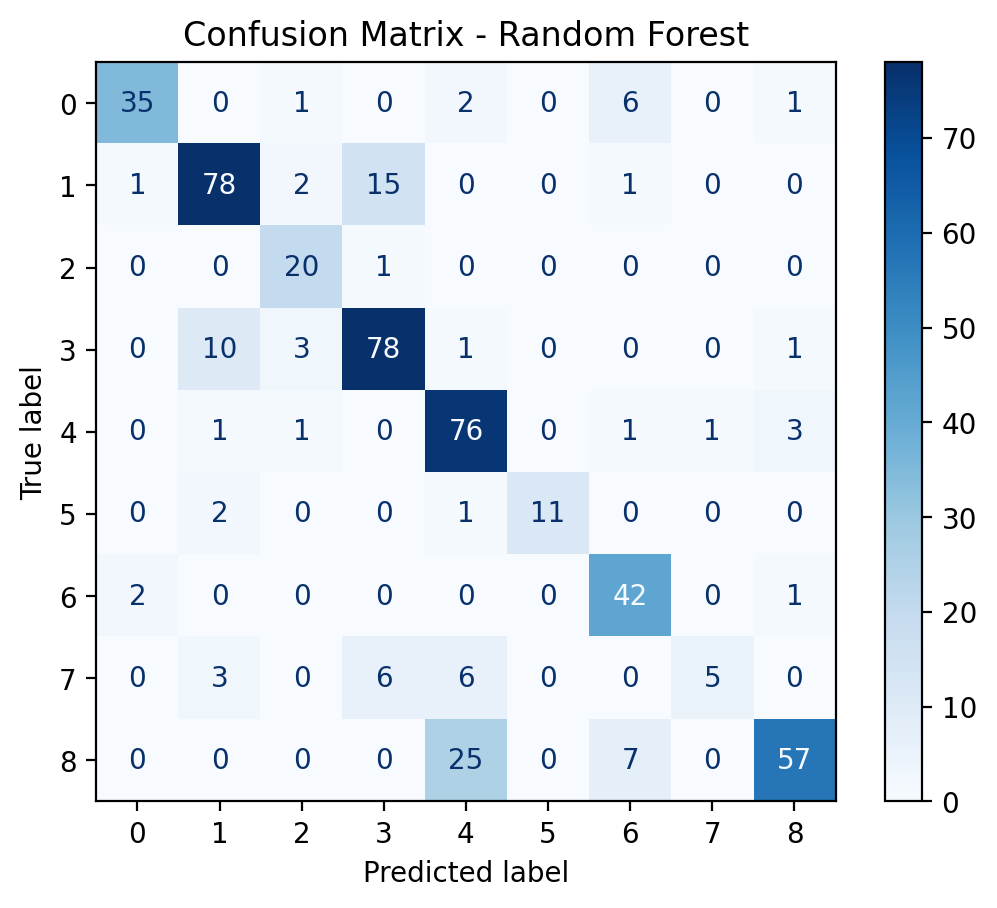

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
# Initialize Random Forest model
random_forest_model = RandomForestClassifier(
    n_estimators=30,         # More trees than 10, but still less than 100
    max_depth=5,             # Allows more complexity than 3, but not full depth
    min_samples_split=5,     # Slightly relaxed split requirement
    min_samples_leaf=3,      # Moderate generalization
    max_features='log2',     # Still limited, but better than 'sqrt' in some cases
    bootstrap=True,          # Enable bootstrapping for better variance reduction
    random_state=42
)



# Train the model
random_forest_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = random_forest_model.predict(X_test_scaled)
y_prob = random_forest_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - Random Forest")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Support Vector Machine (SVM)

Test Accuracy: 0.6844
Macro Precision: 0.6720
Macro Recall: 0.7071
Macro F1-Score: 0.6817
One-vs-All AUC: 0.9579


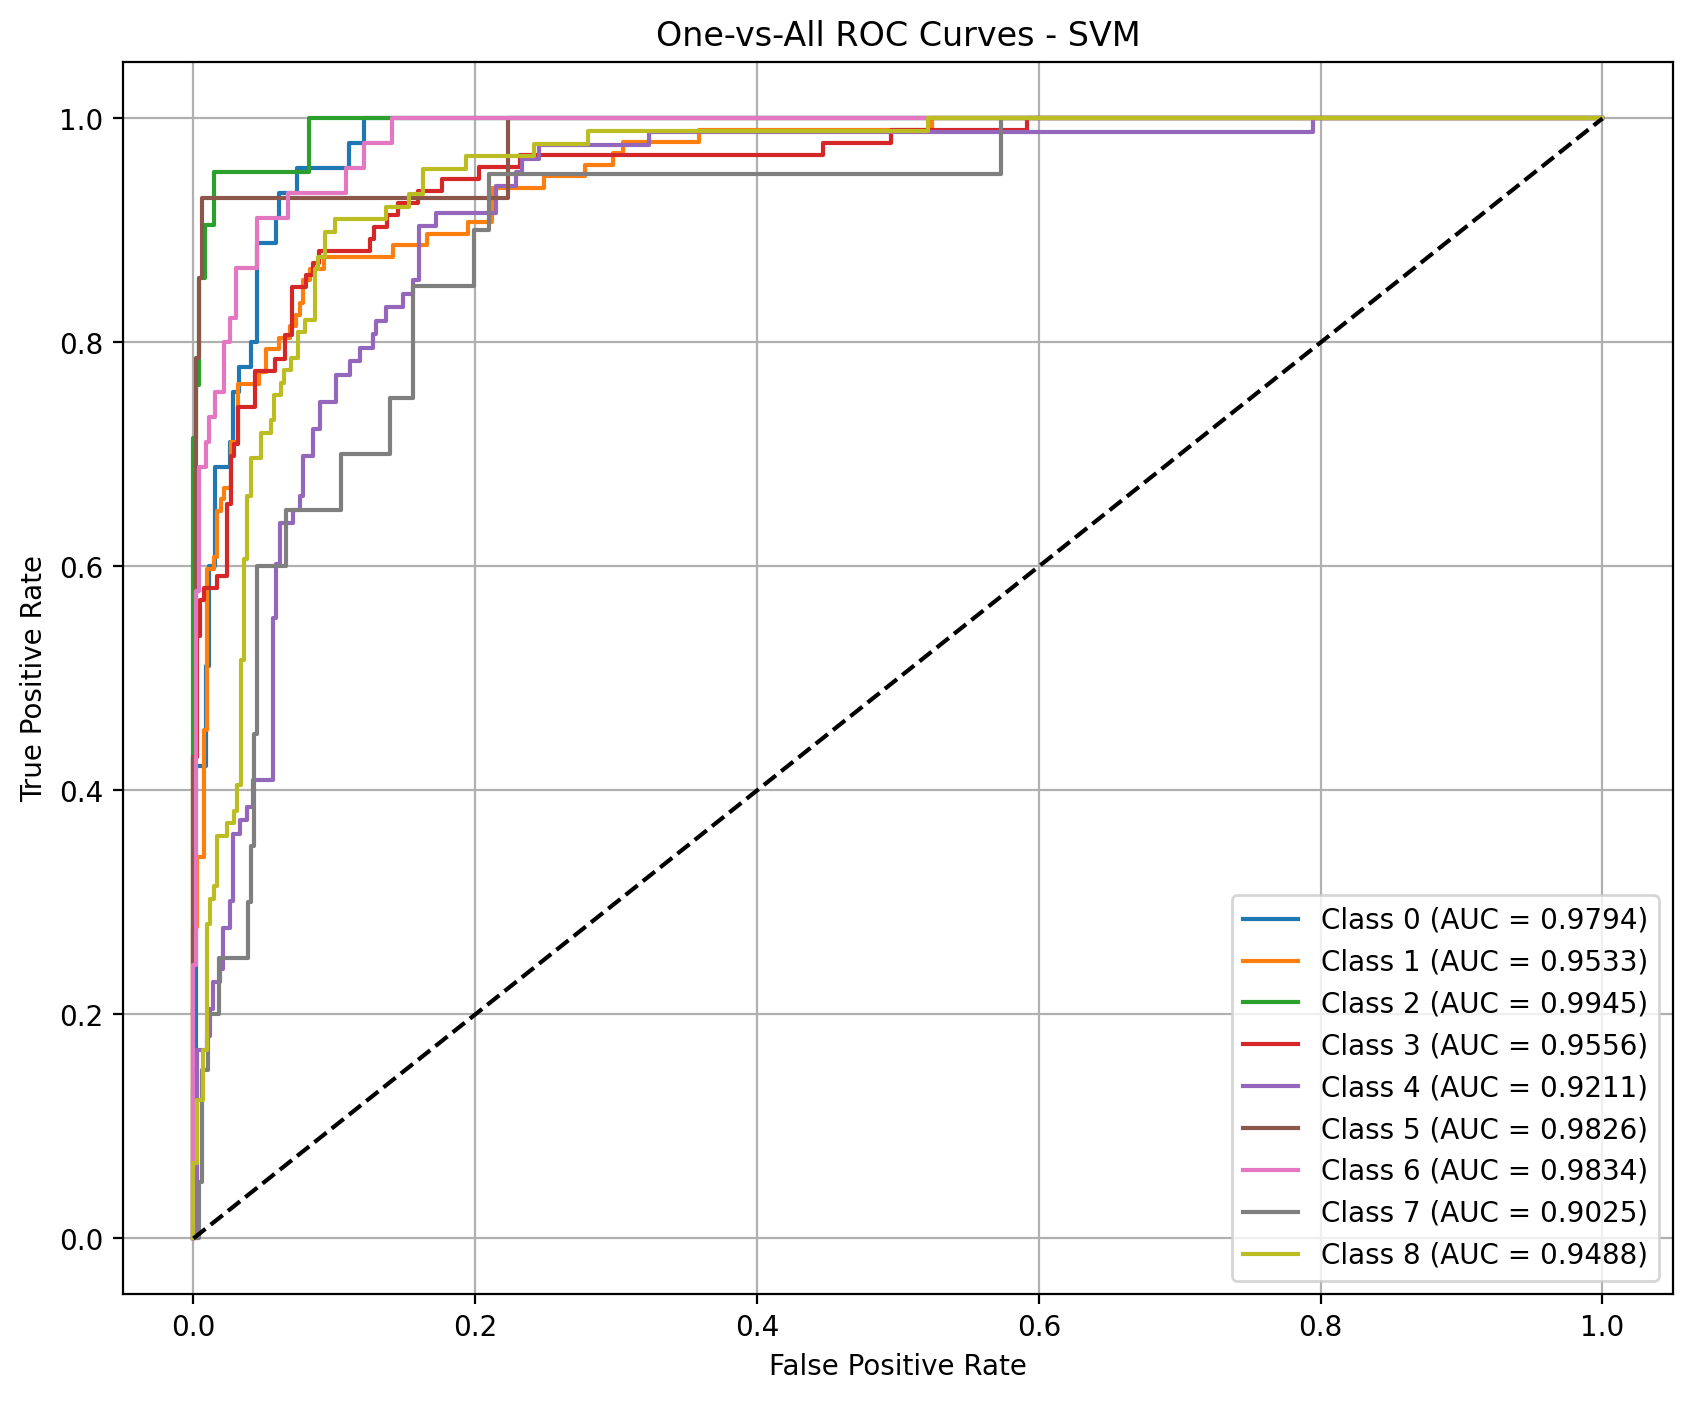

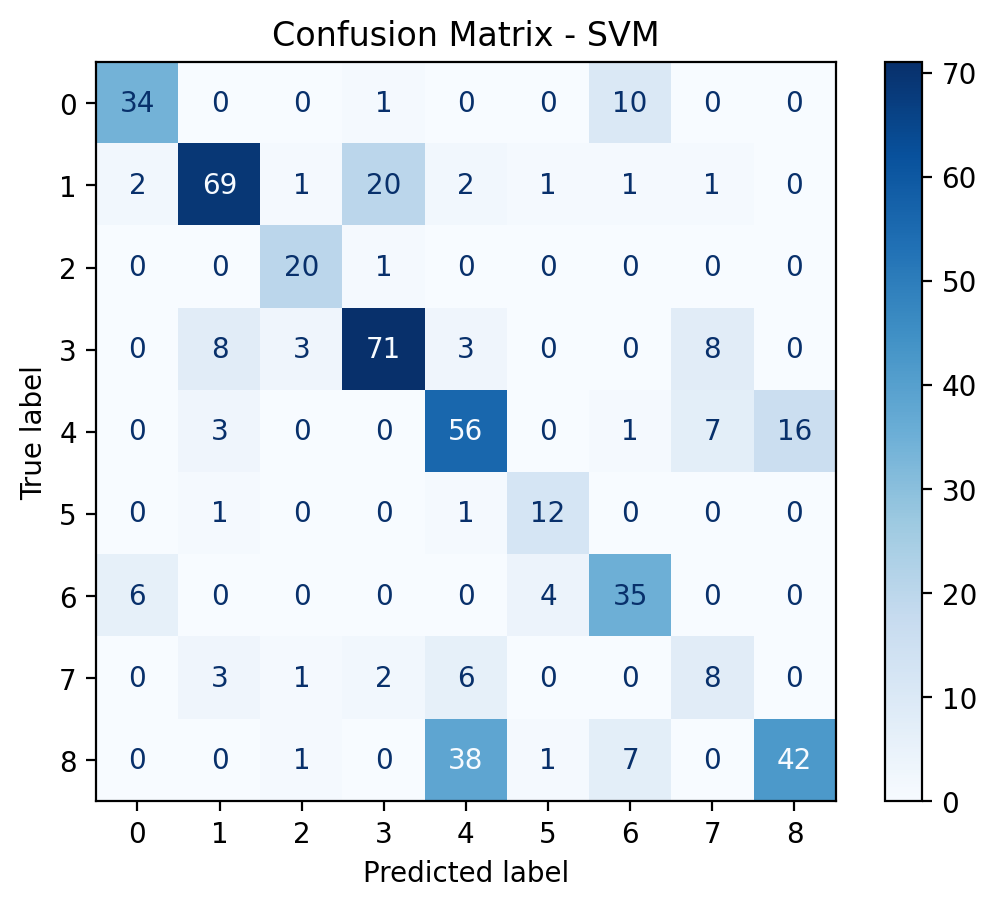

In [22]:
from sklearn.svm import SVC

# Initialize SVM model with probability enabled
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - SVM")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - SVM")
plt.show()

# Decision Tree

Test Accuracy: 0.7475
Macro Precision: 0.7202
Macro Recall: 0.7496
Macro F1-Score: 0.7272
One-vs-All AUC: 0.8585


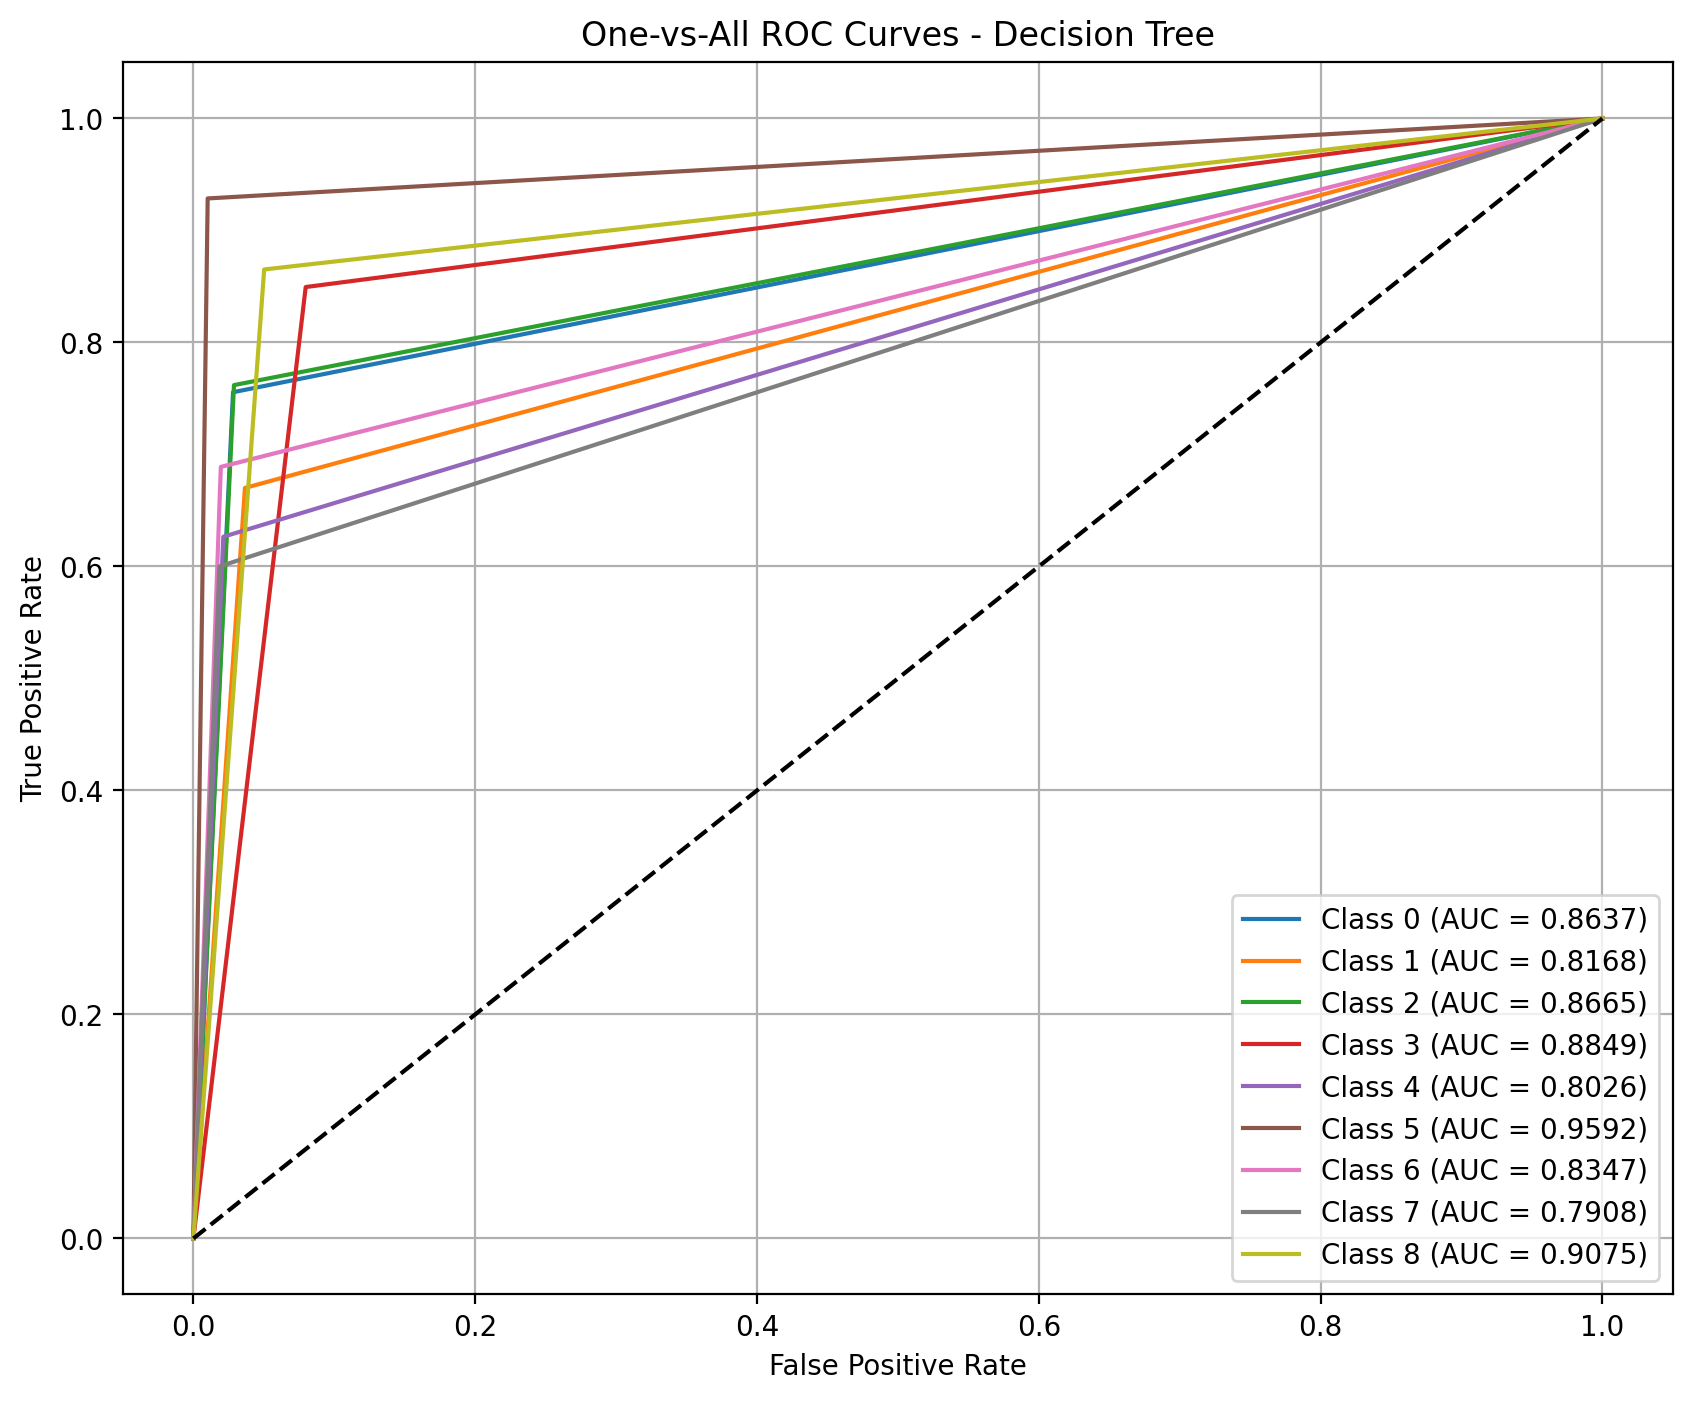

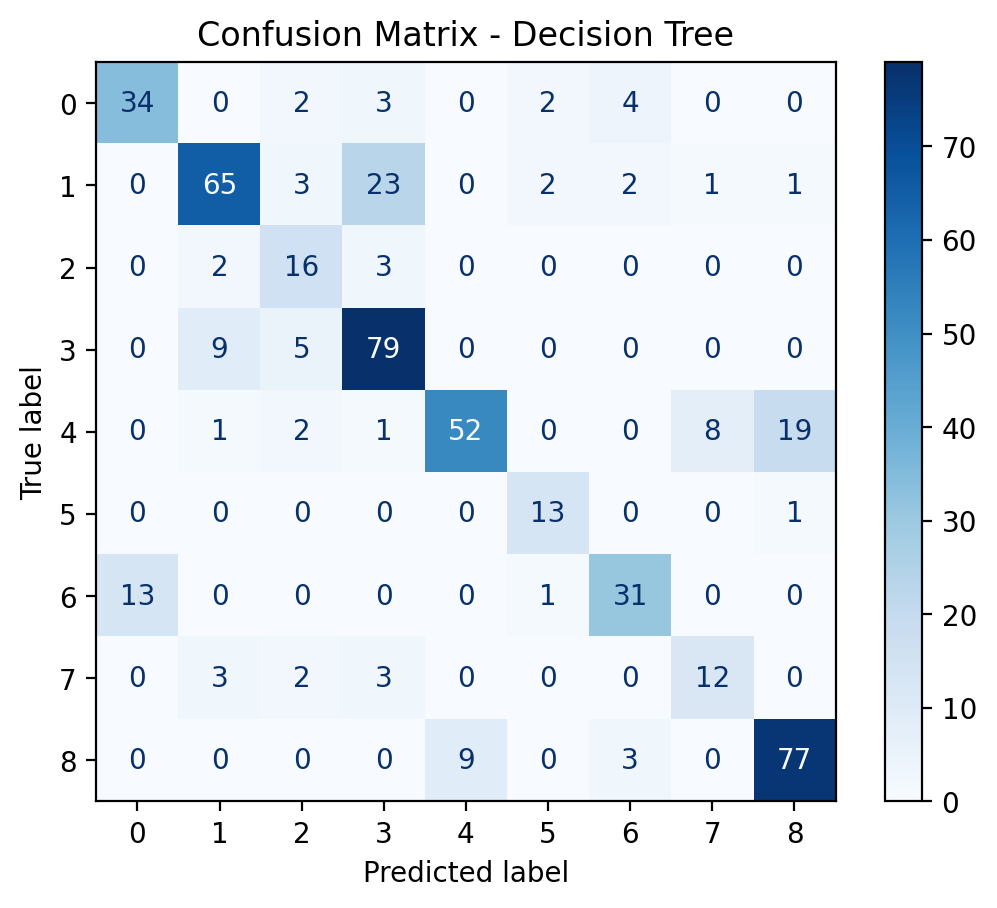

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = decision_tree_model.predict(X_test_scaled)
y_prob = decision_tree_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - Decision Tree")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# K-Nearest Neighbors (KNN)

Test Accuracy: 0.7022
Macro Precision: 0.6873
Macro Recall: 0.6929
Macro F1-Score: 0.6853
One-vs-All AUC: 0.9249


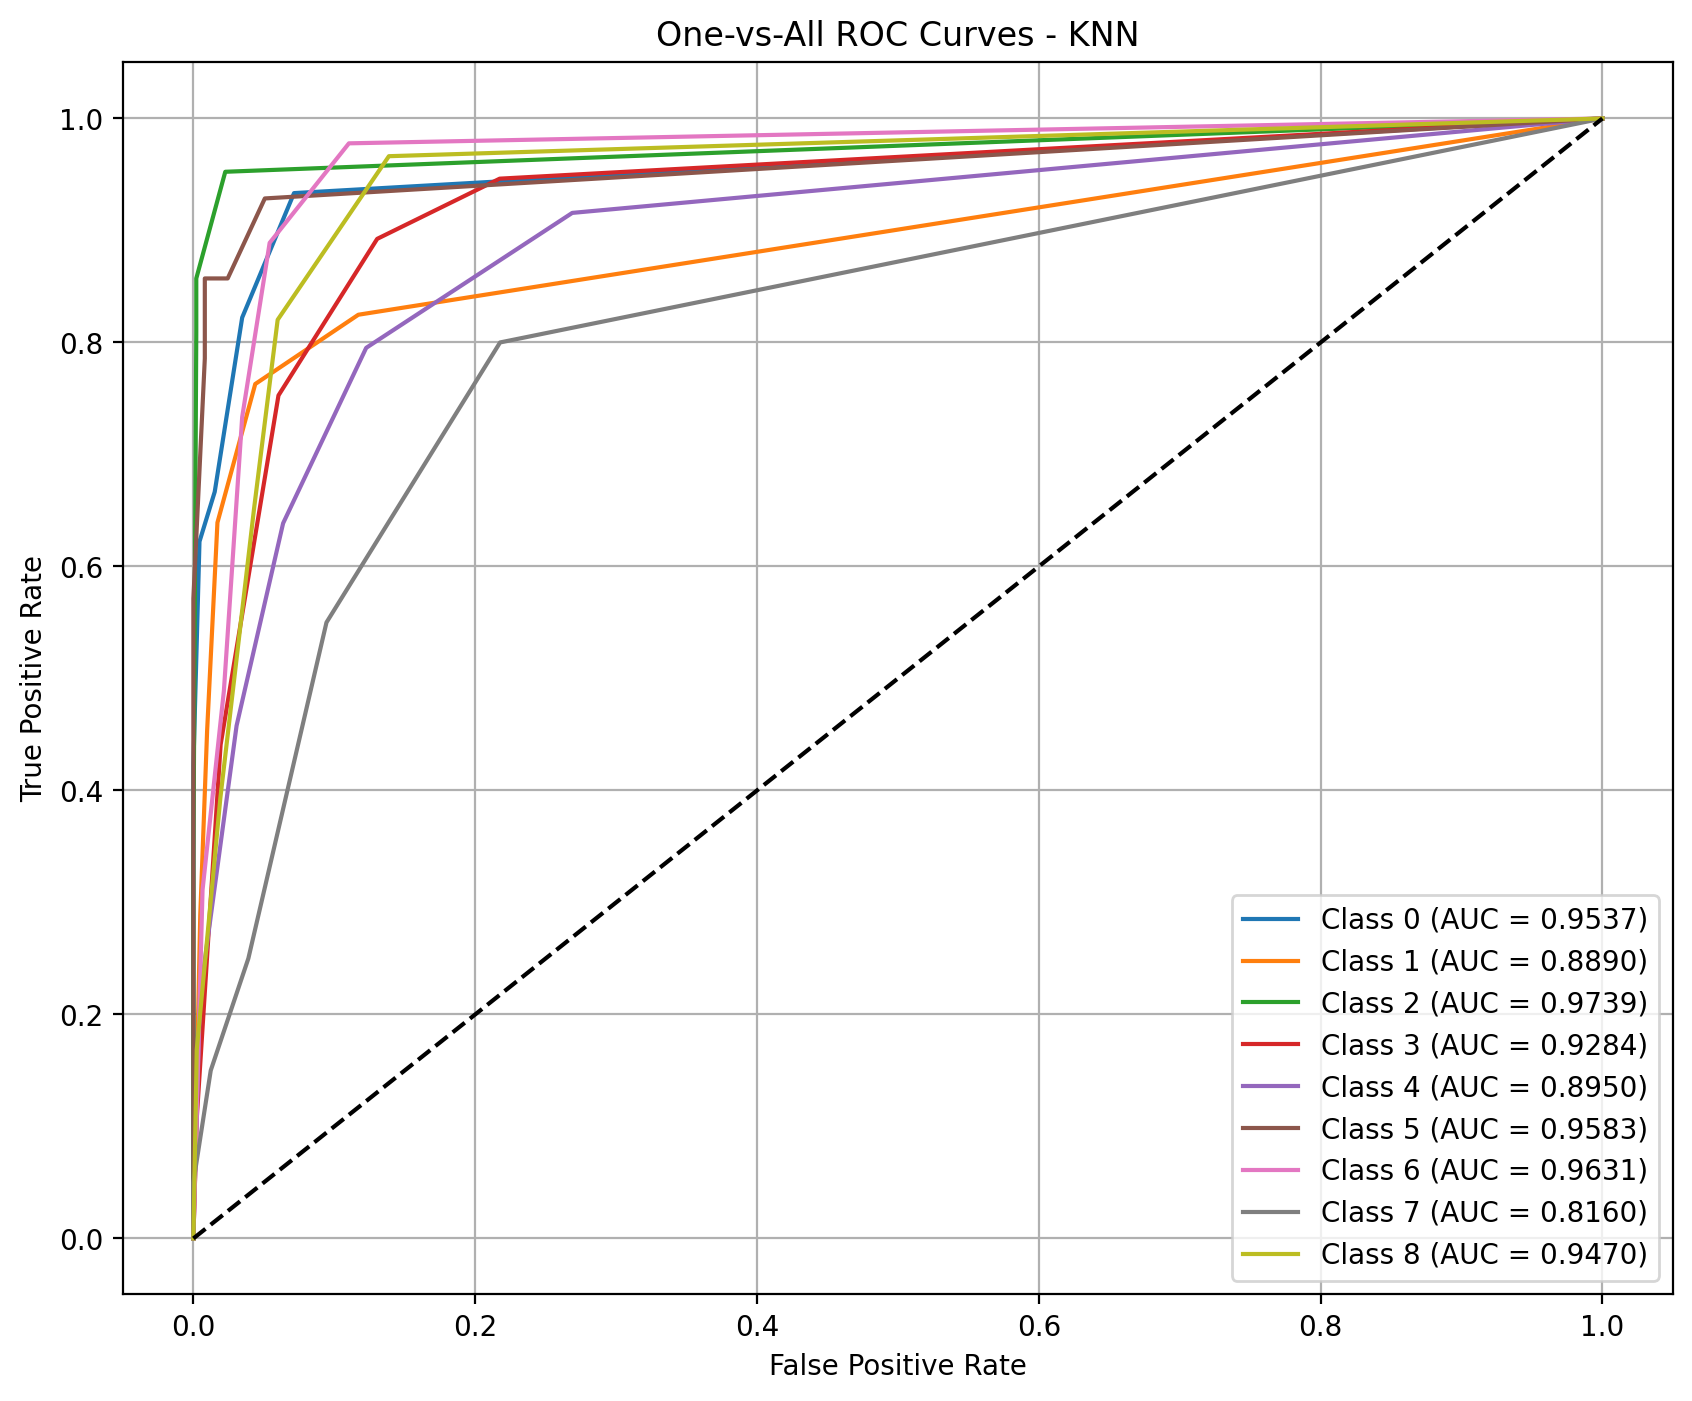

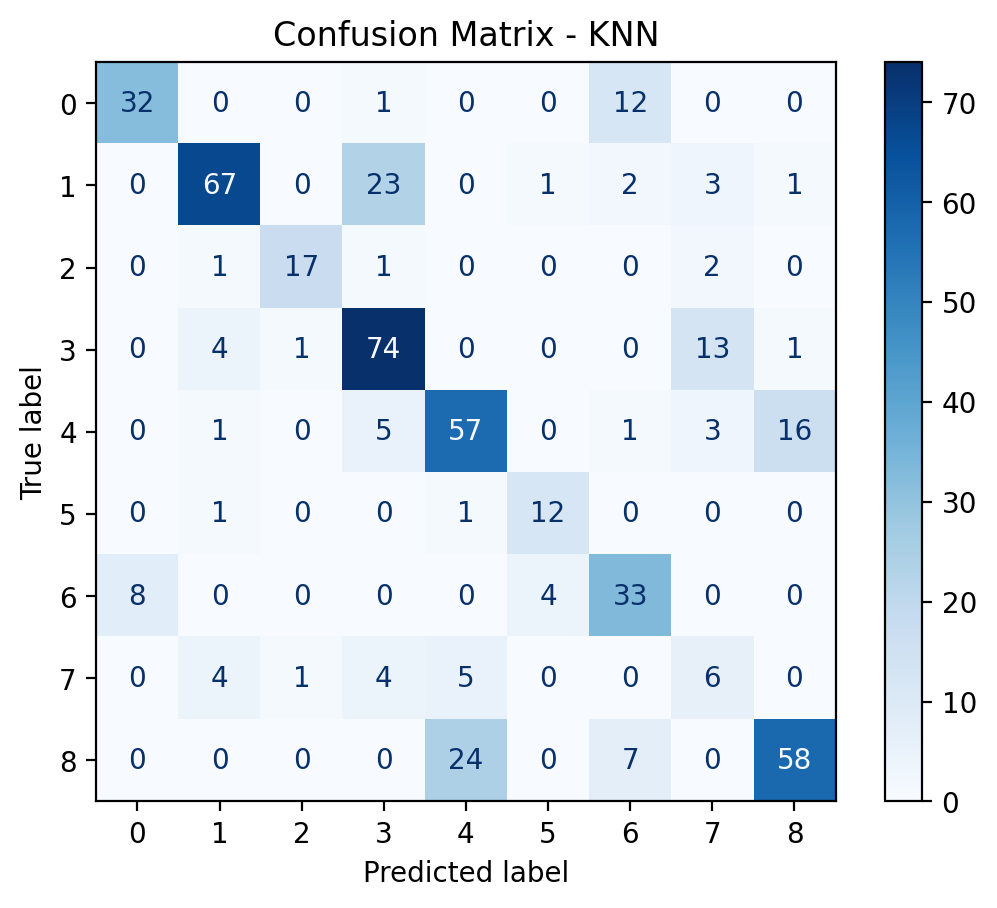

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default number of neighbors is 5

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)
y_prob = knn_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - KNN")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - KNN")
plt.show()

# Naive Bayes (GaussianNB)

Test Accuracy: 0.7751
Macro Precision: 0.7615
Macro Recall: 0.7746
Macro F1-Score: 0.7624
One-vs-All AUC: 0.9617


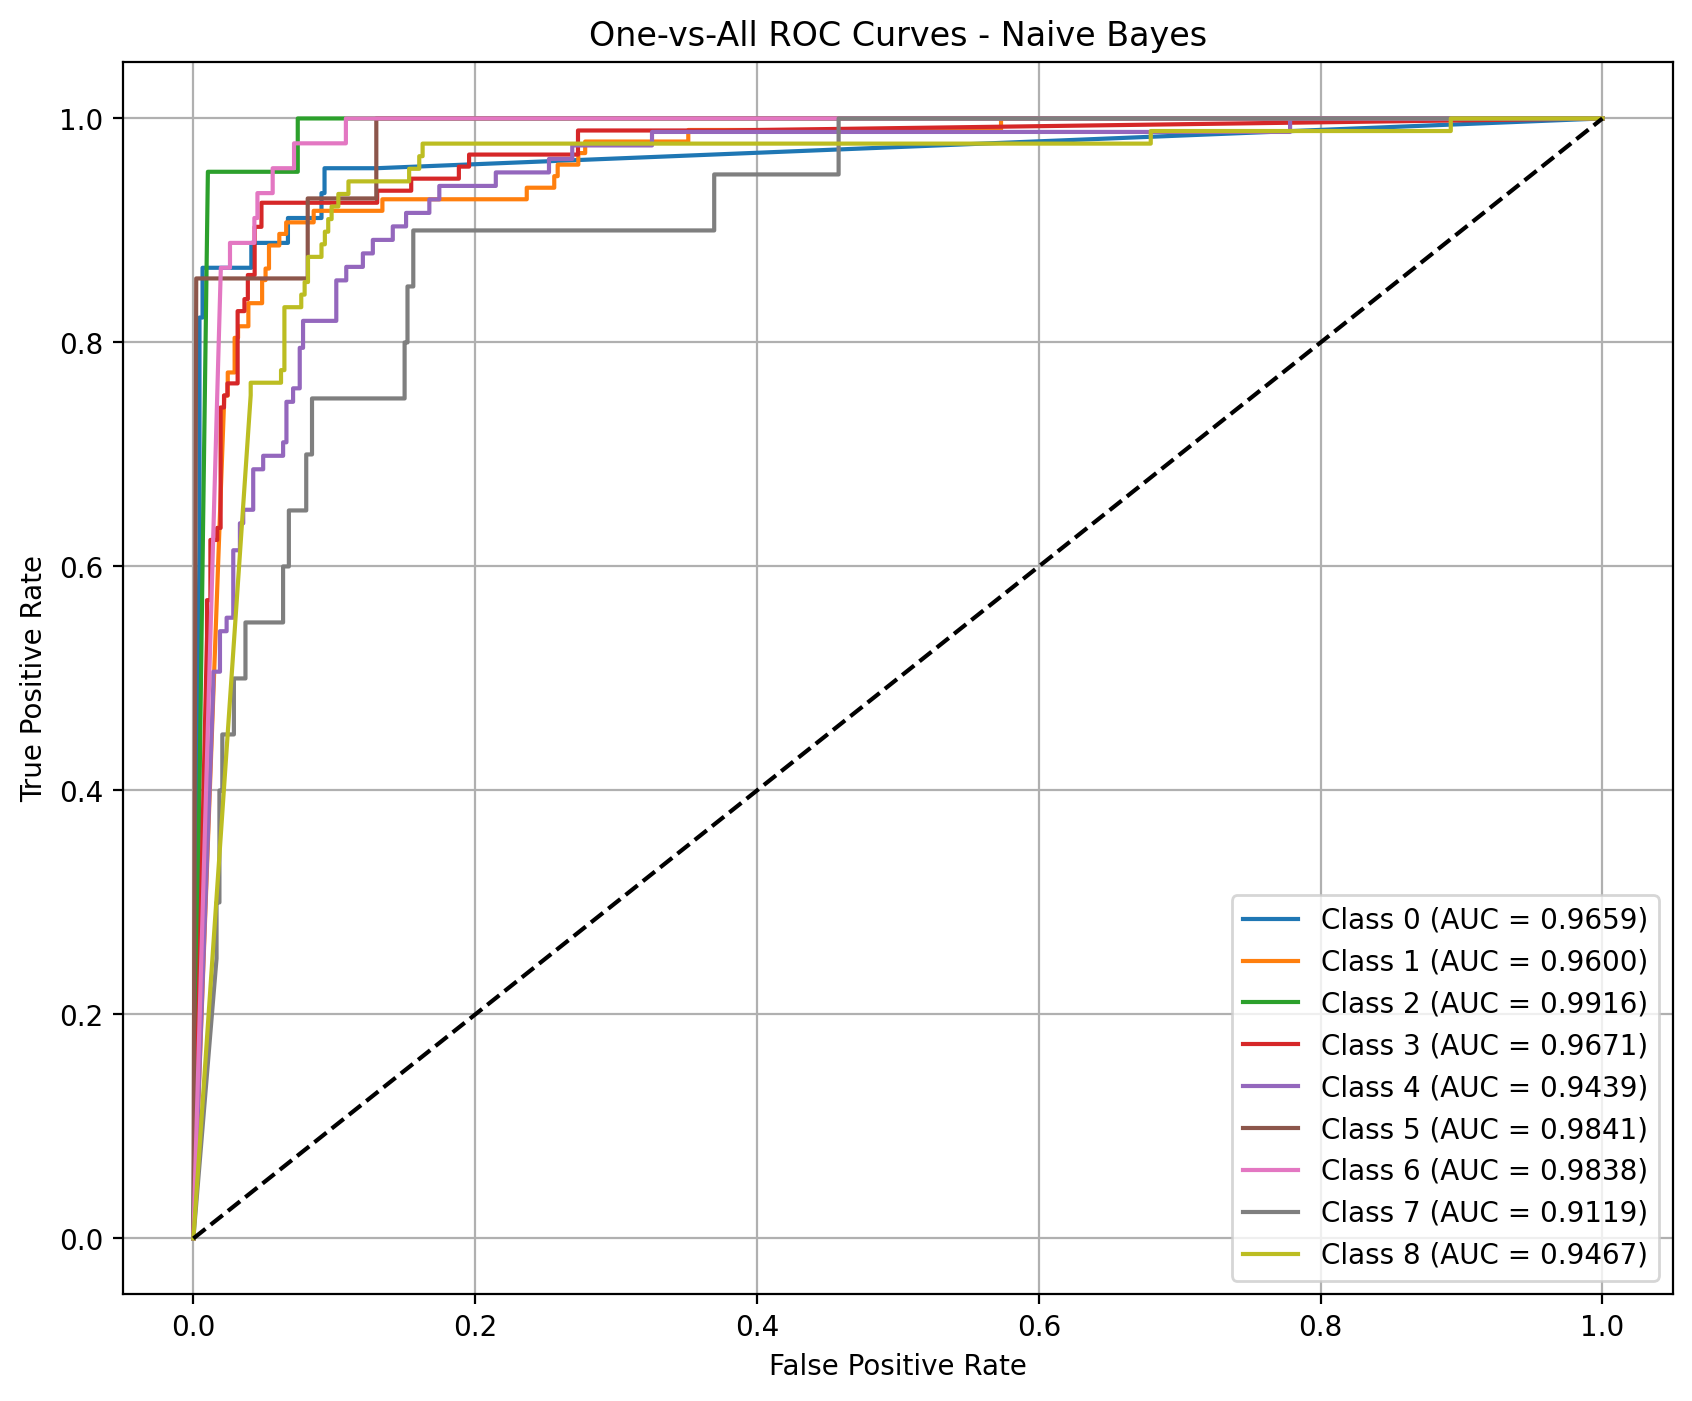

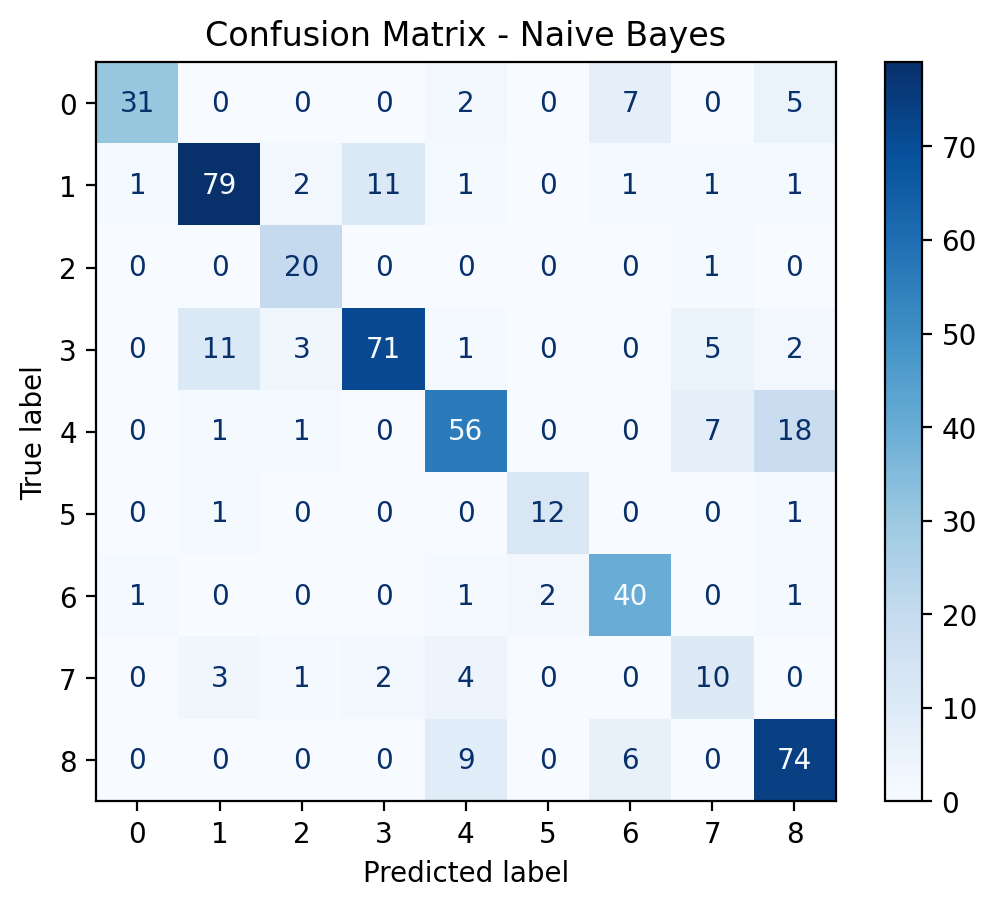

In [25]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = naive_bayes_model.predict(X_test_scaled)
y_prob = naive_bayes_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - Naive Bayes")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Multi-Layer Perceptron (MLP)

Test Accuracy: 0.6963
Macro Precision: 0.6485
Macro Recall: 0.7034
Macro F1-Score: 0.6663
One-vs-All AUC: 0.9430


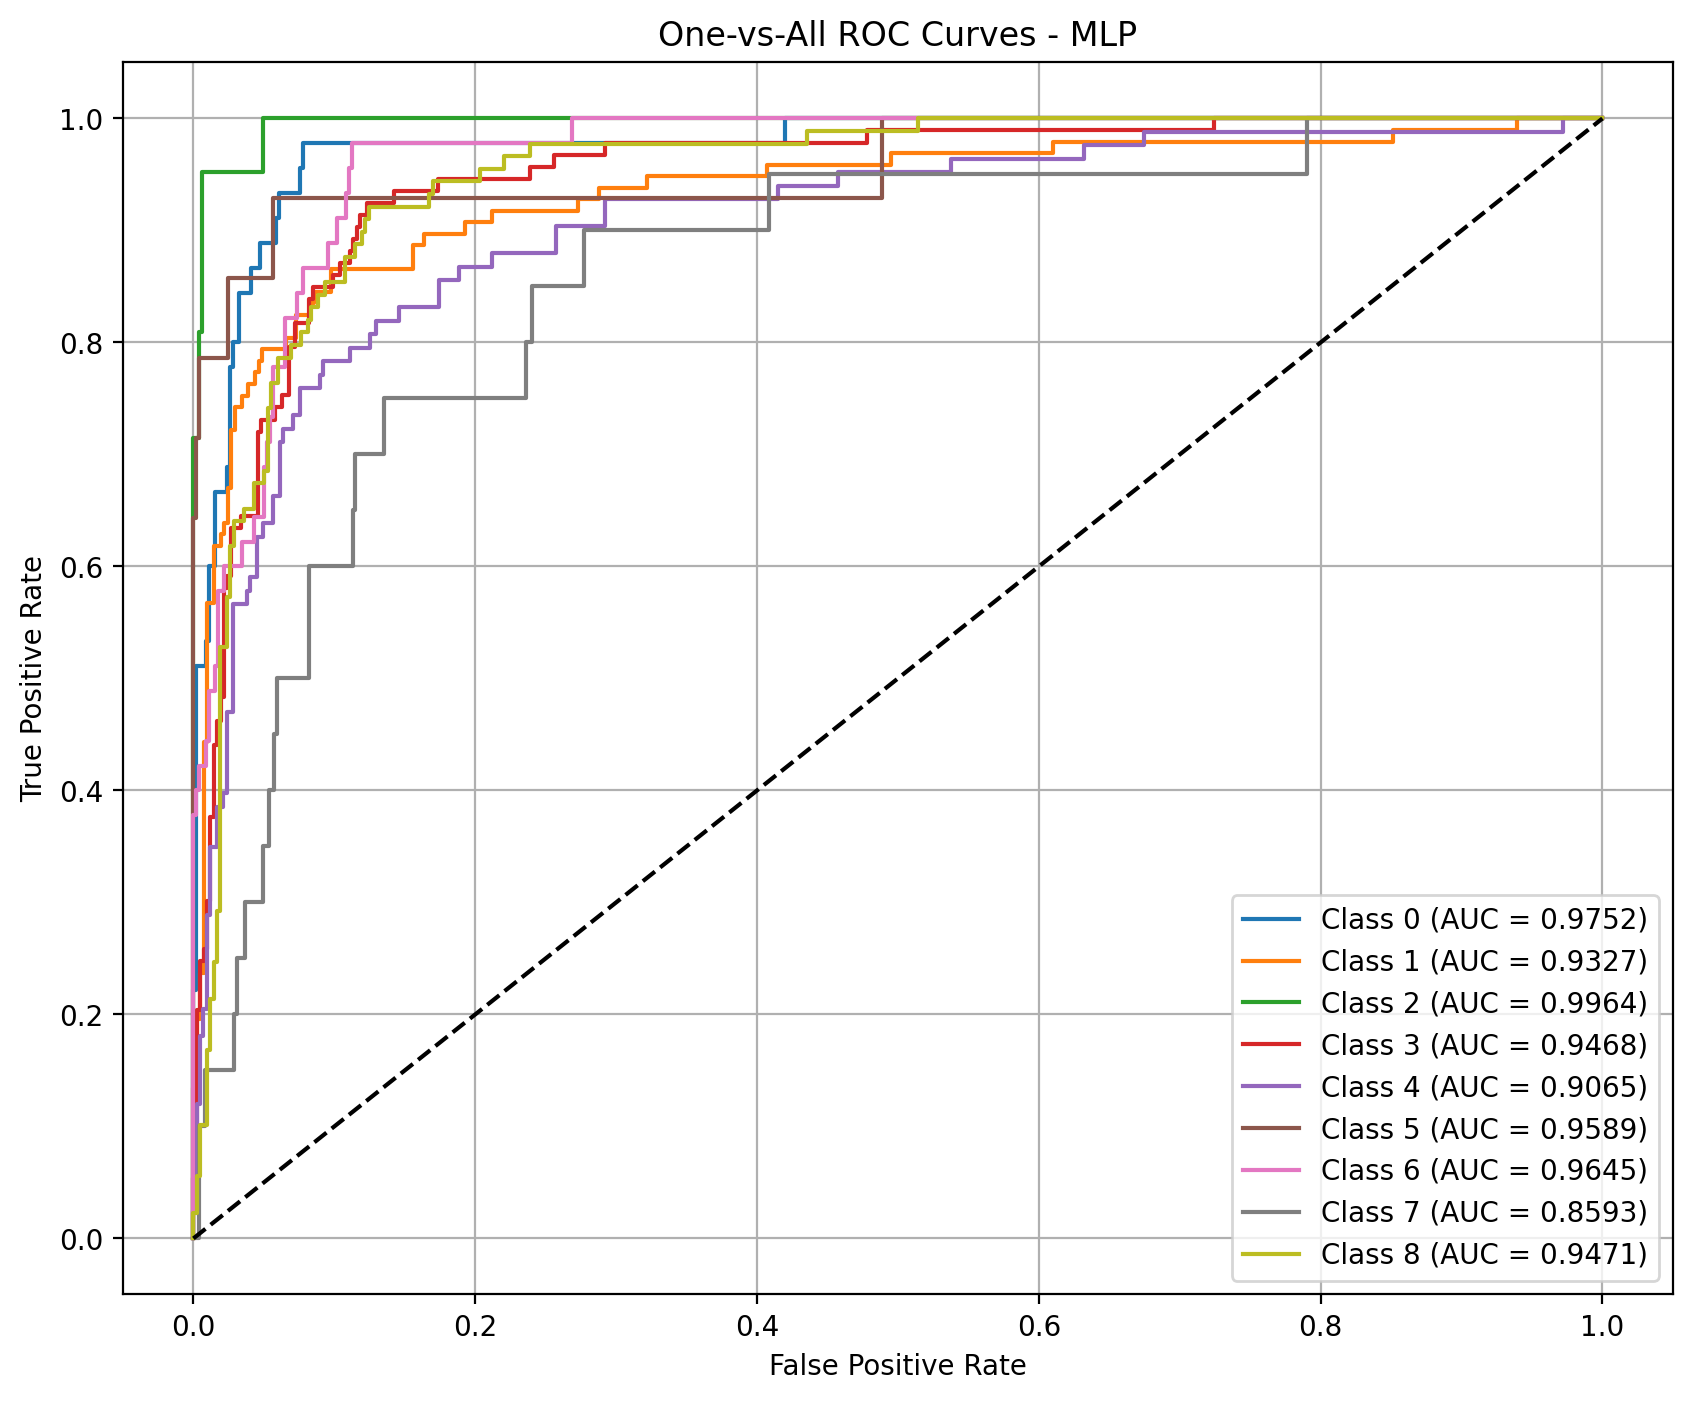

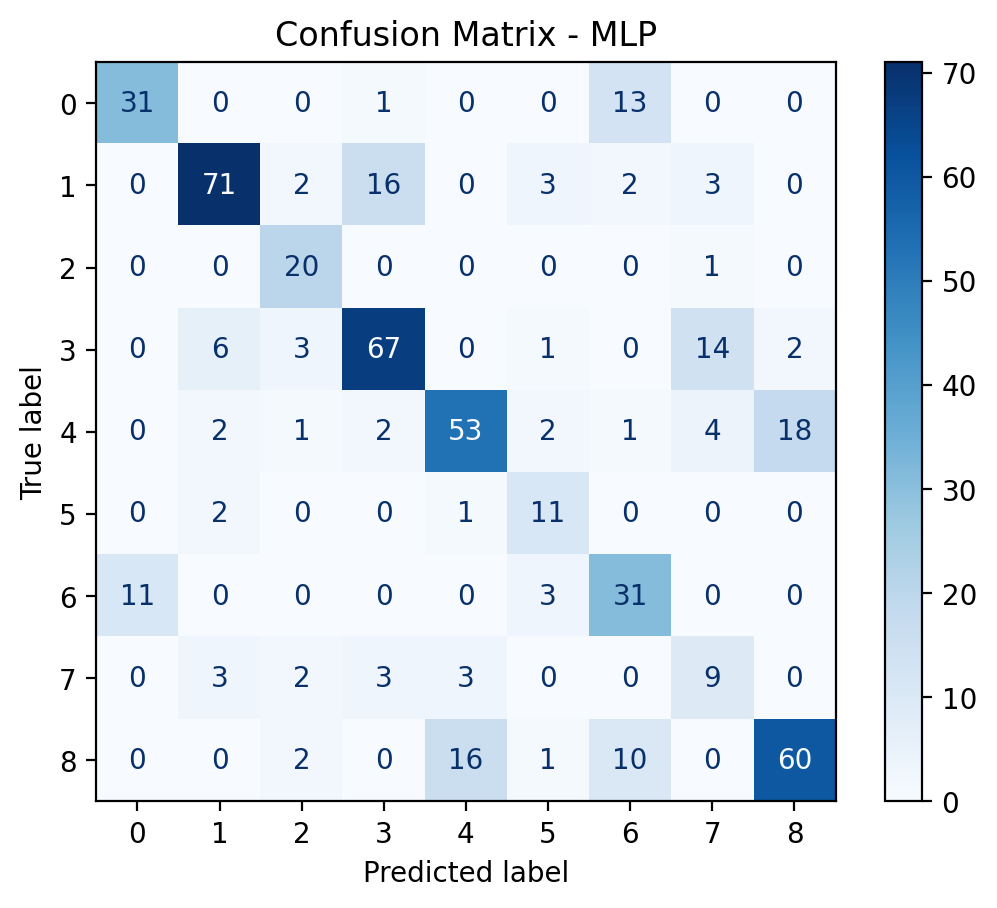

In [26]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp_model.predict(X_test_scaled)
y_prob = mlp_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - MLP")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - MLP")
plt.show()

# CatBoost

Test Accuracy: 0.8008
Macro Precision: 0.8146
Macro Recall: 0.7937
Macro F1-Score: 0.7907
One-vs-All AUC: 0.9736


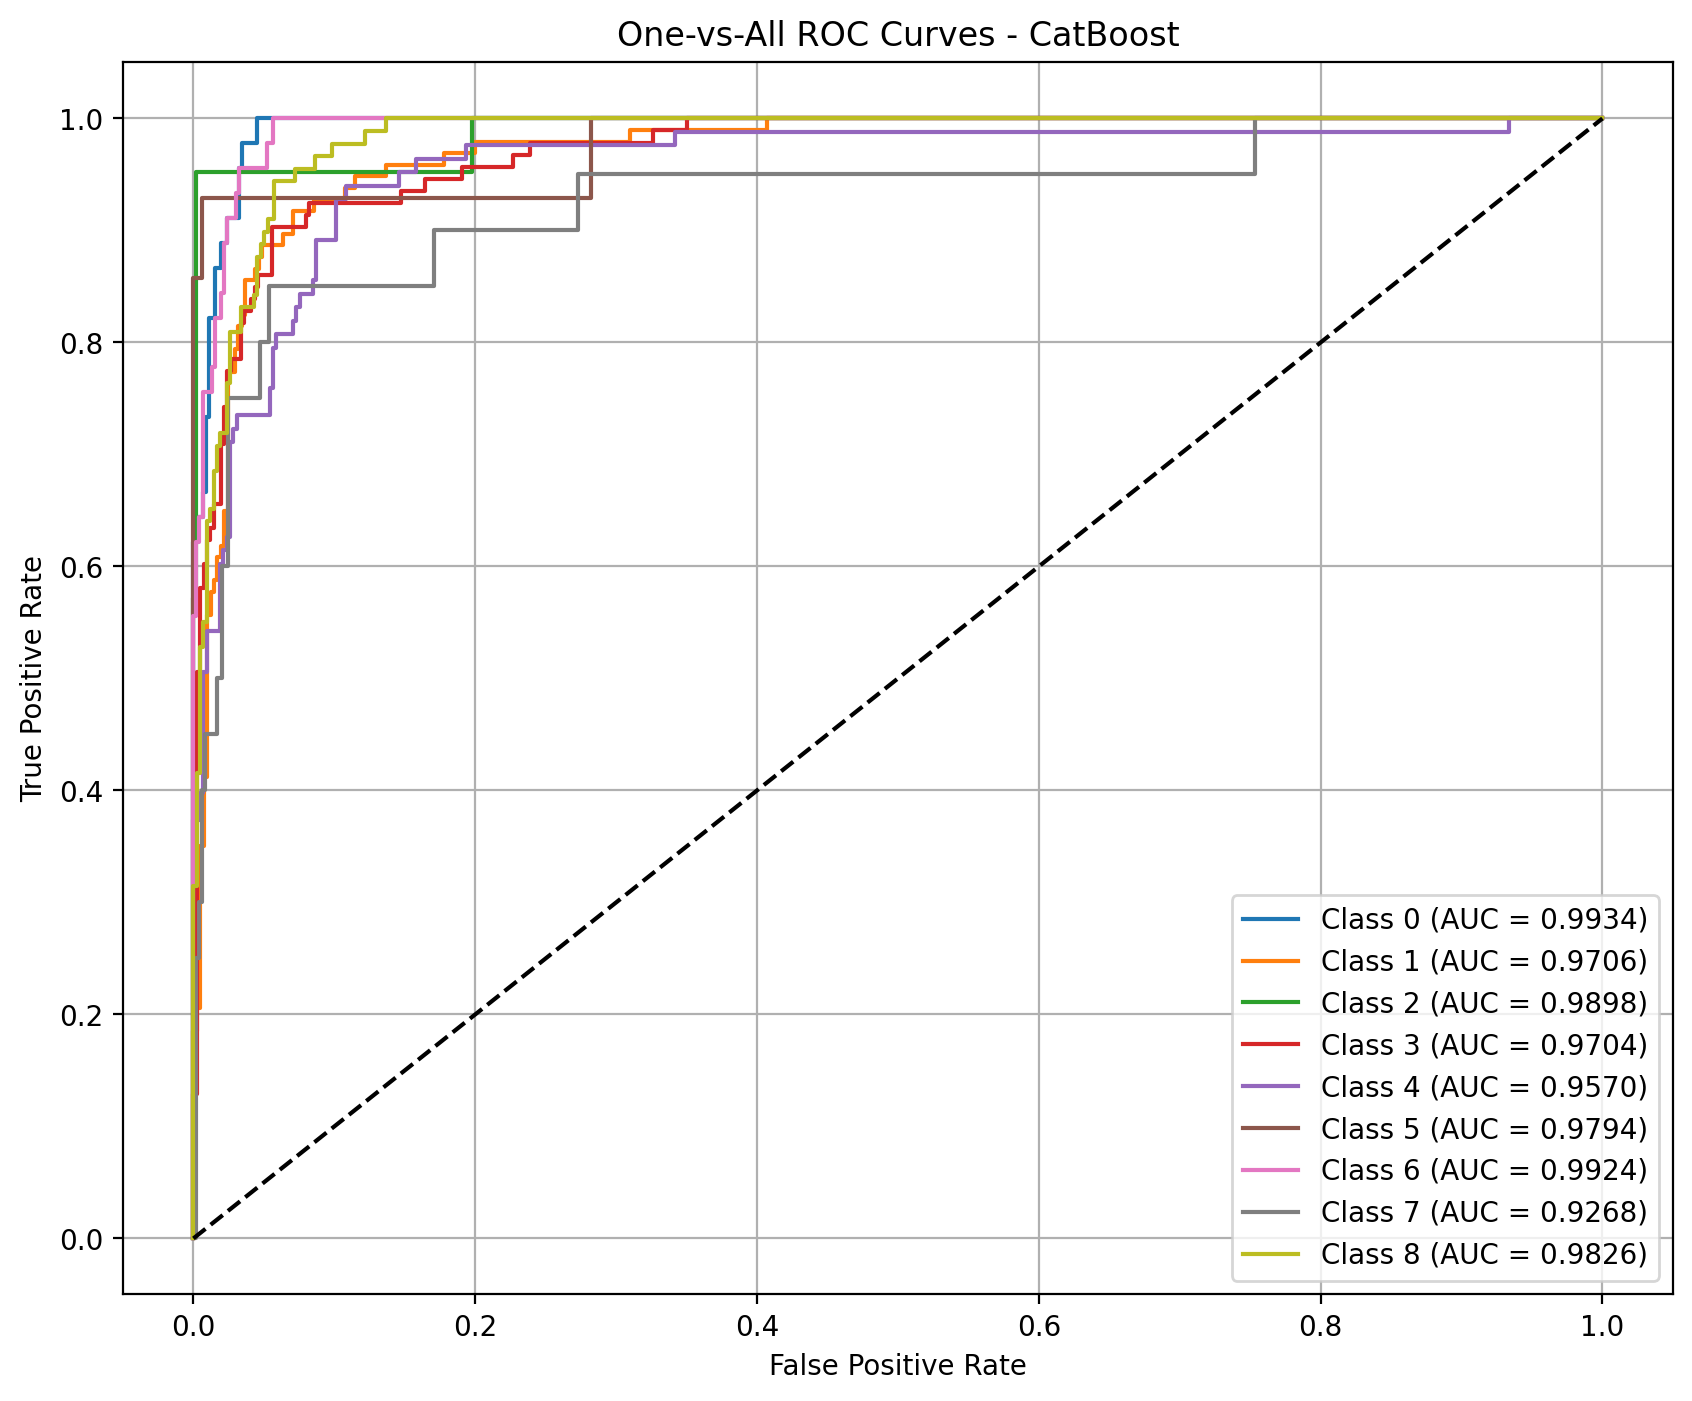

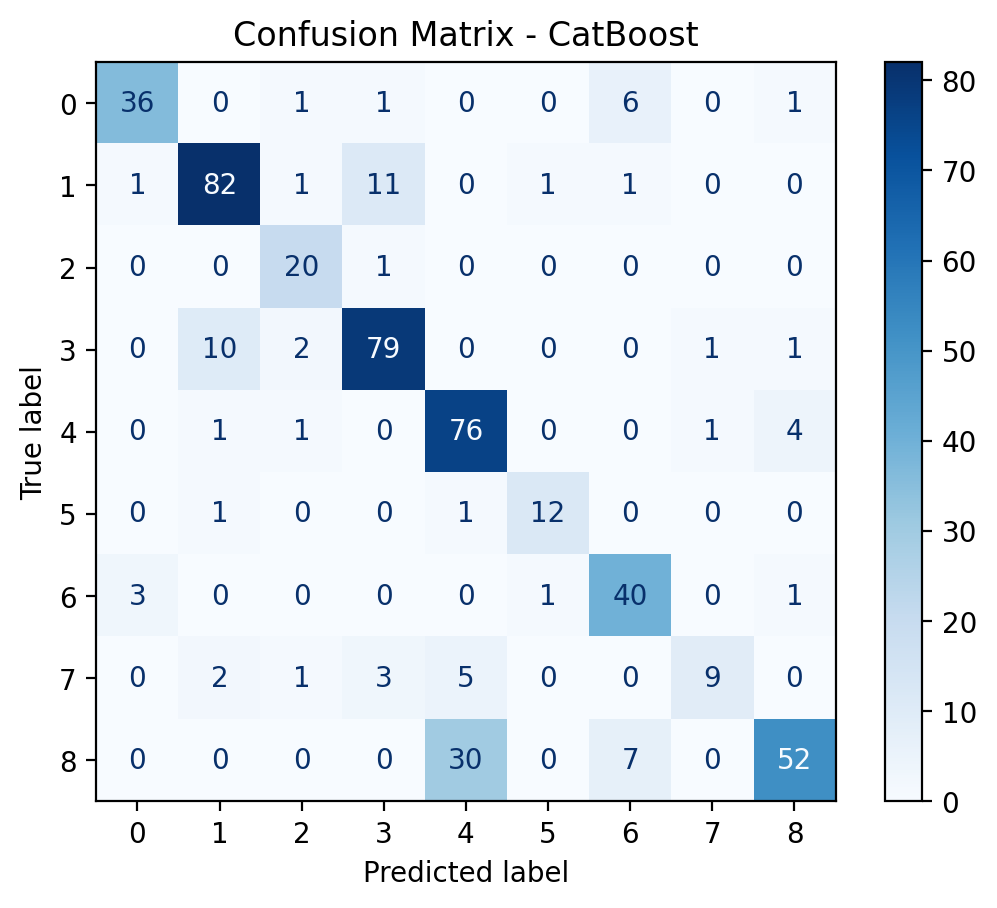

In [51]:
from catboost import CatBoostClassifier

# Initialize CatBoost model
catboost_model = CatBoostClassifier(
    iterations=100,           
    learning_rate=0.15,       
    depth=3,                  
    l2_leaf_reg=5.0,         
    random_state=42,
    verbose=0
)

# Train the model
catboost_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = catboost_model.predict(X_test_scaled)
y_prob = catboost_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - CatBoost")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - CatBoost")
plt.show()

# AdaBoost

Test Accuracy: 0.6312
Macro Precision: 0.6716
Macro Recall: 0.6234
Macro F1-Score: 0.6341
One-vs-All AUC: 0.9260


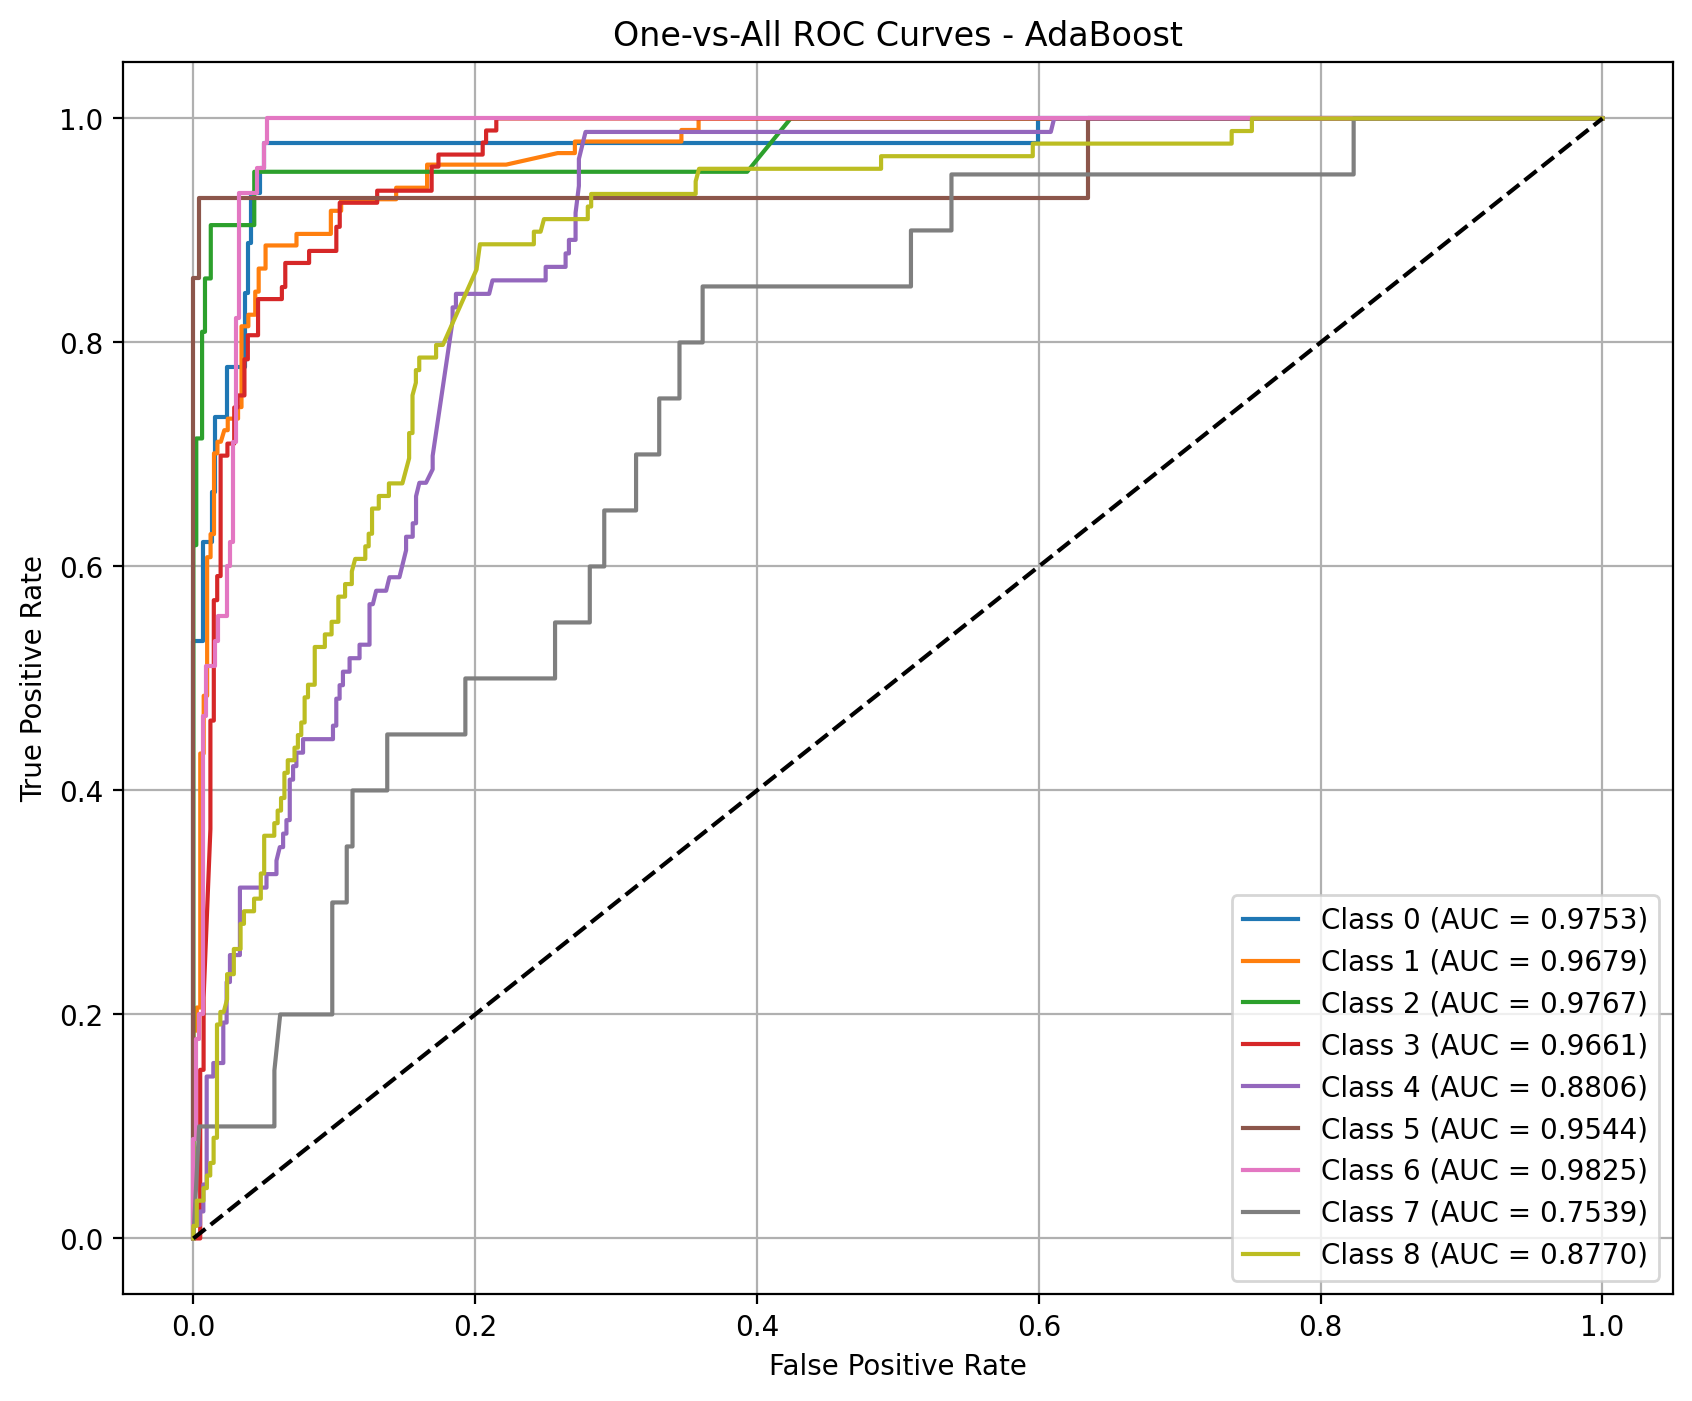

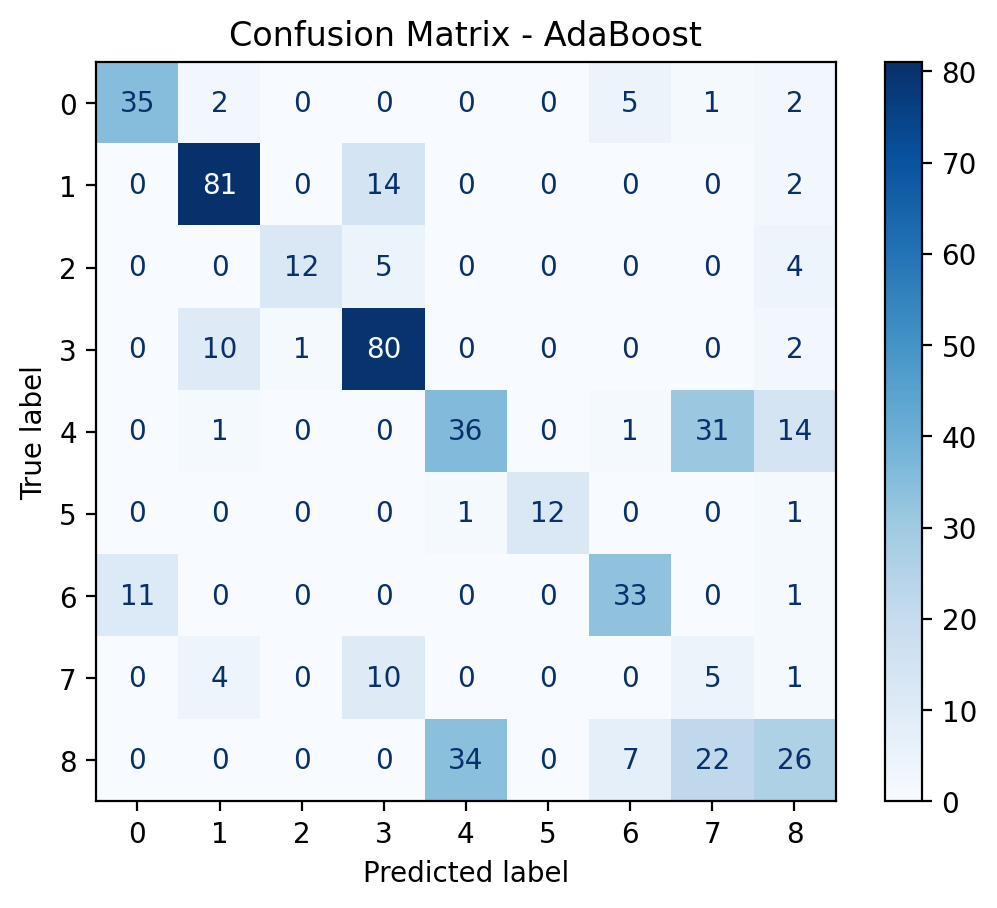

In [28]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
adaboost_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = adaboost_model.predict(X_test_scaled)
y_prob = adaboost_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - AdaBoost")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# XGBoost

Test Accuracy: 0.6805
Macro Precision: 0.6848
Macro Recall: 0.6963
Macro F1-Score: 0.6401
One-vs-All AUC: 0.9517


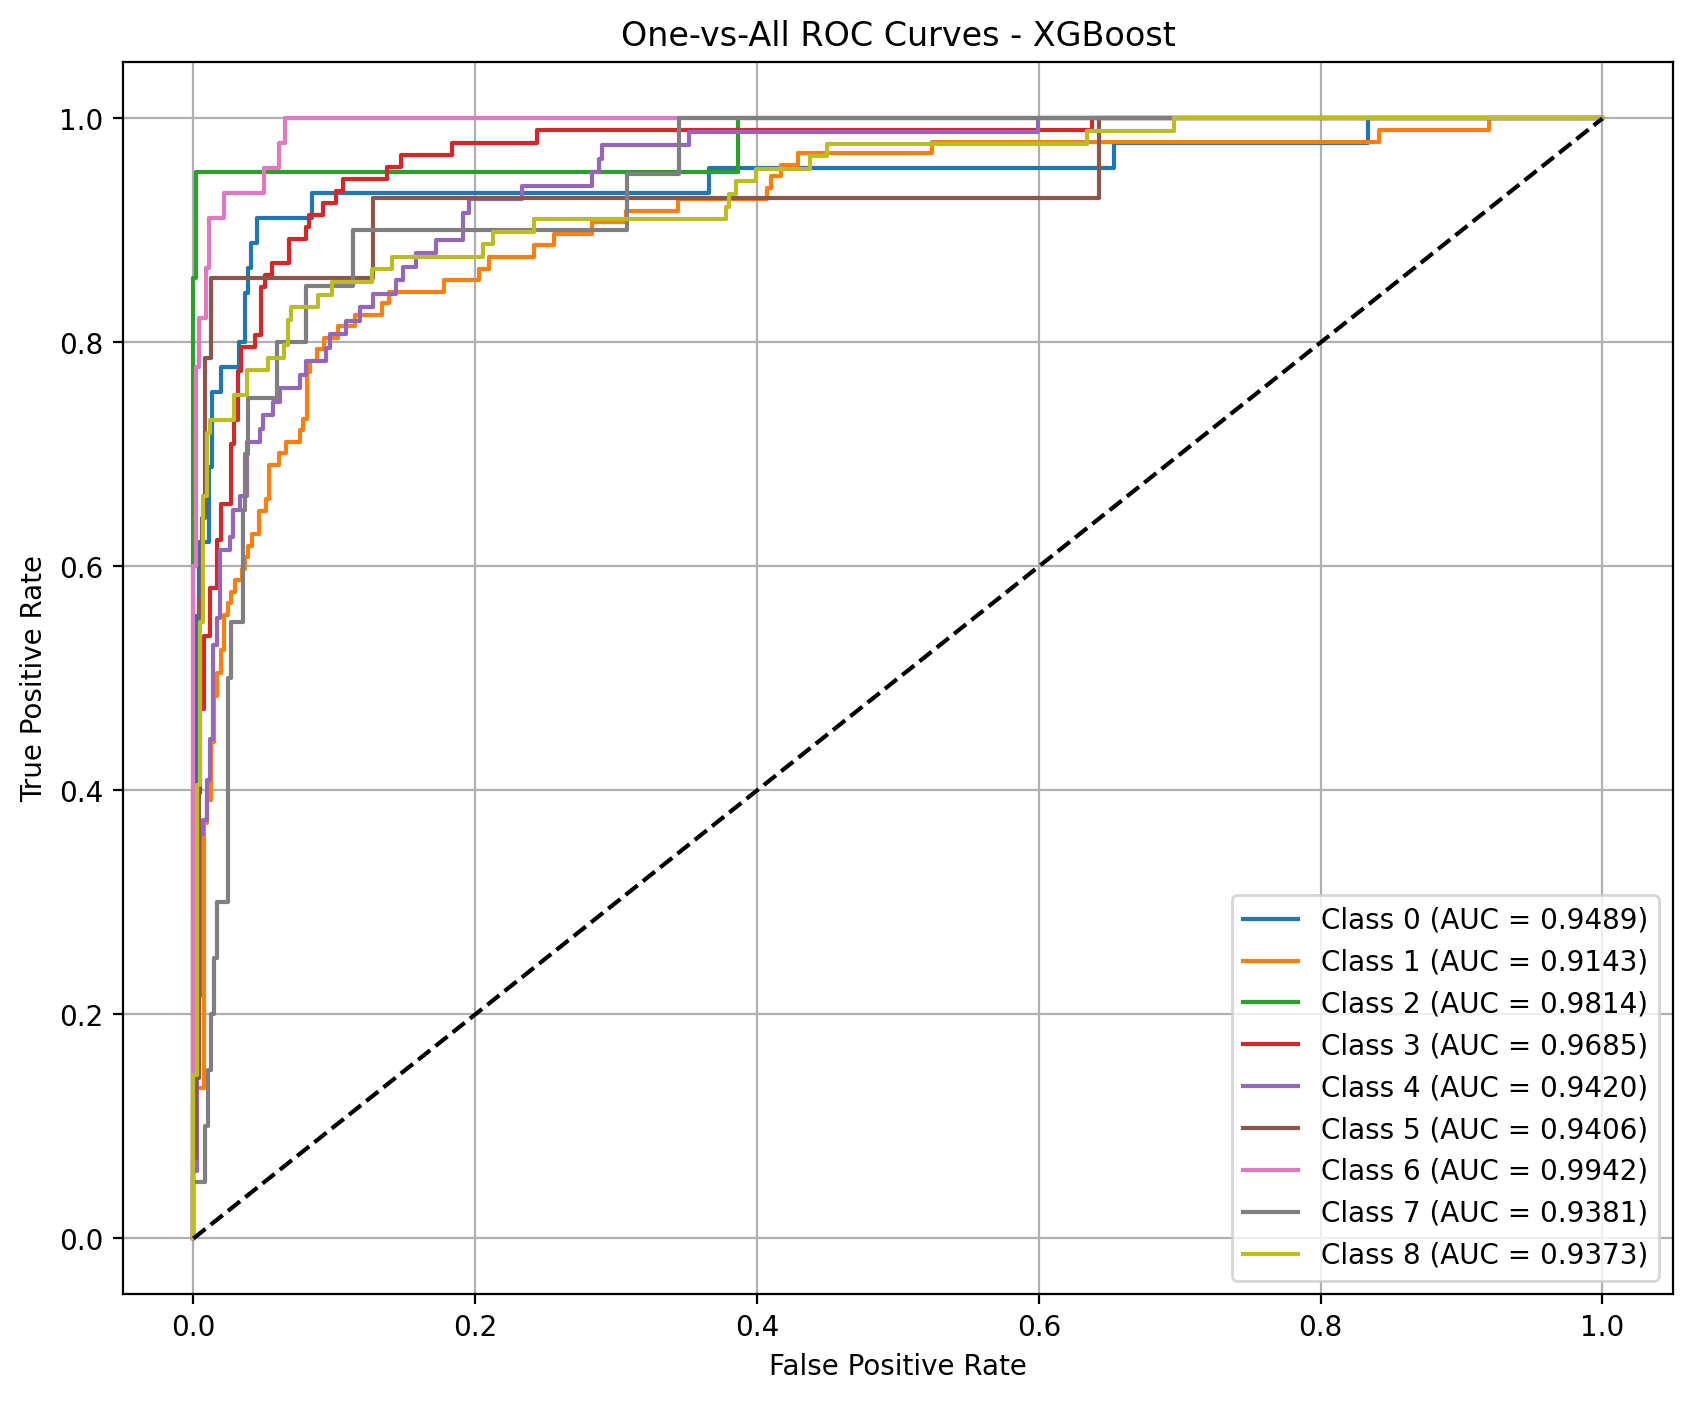

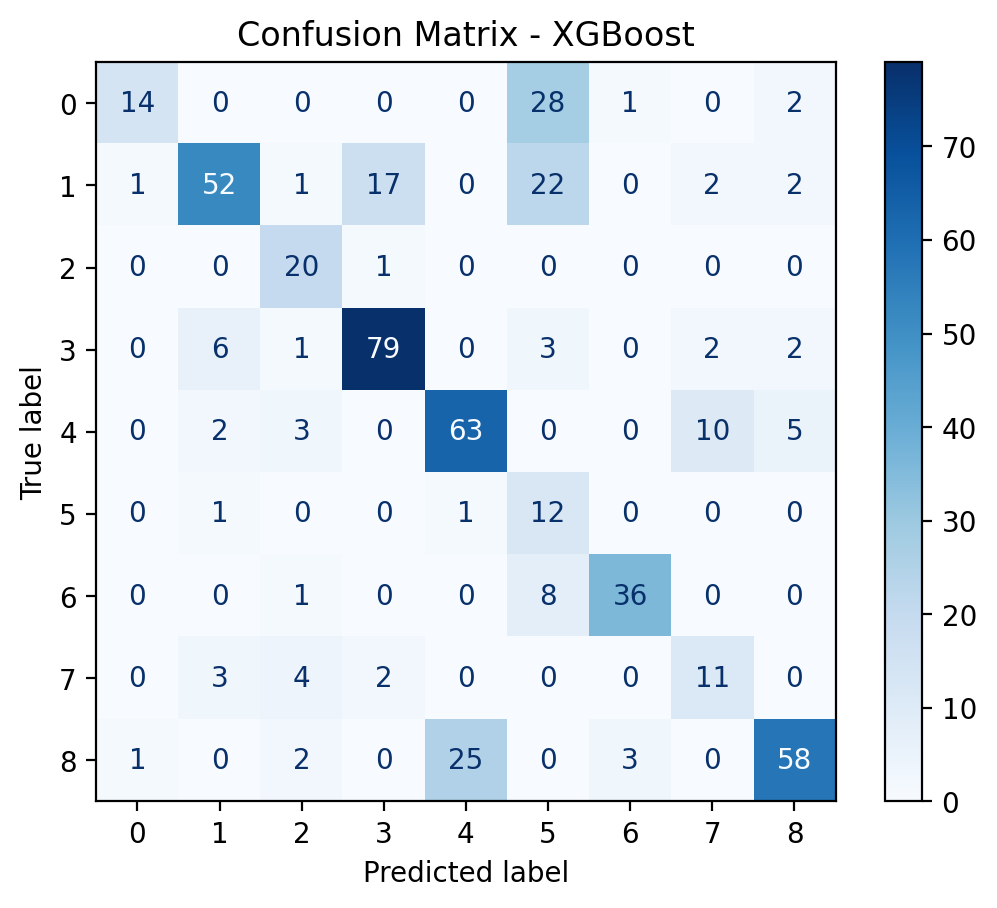

In [29]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgboost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False)

# Train the model
xgboost_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgboost_model.predict(X_test_scaled)
y_prob = xgboost_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - XGBoost")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Gradient Boosting Machine (GBM)

Test Accuracy: 0.7278
Macro Precision: 0.6976
Macro Recall: 0.7223
Macro F1-Score: 0.7010
One-vs-All AUC: 0.9309


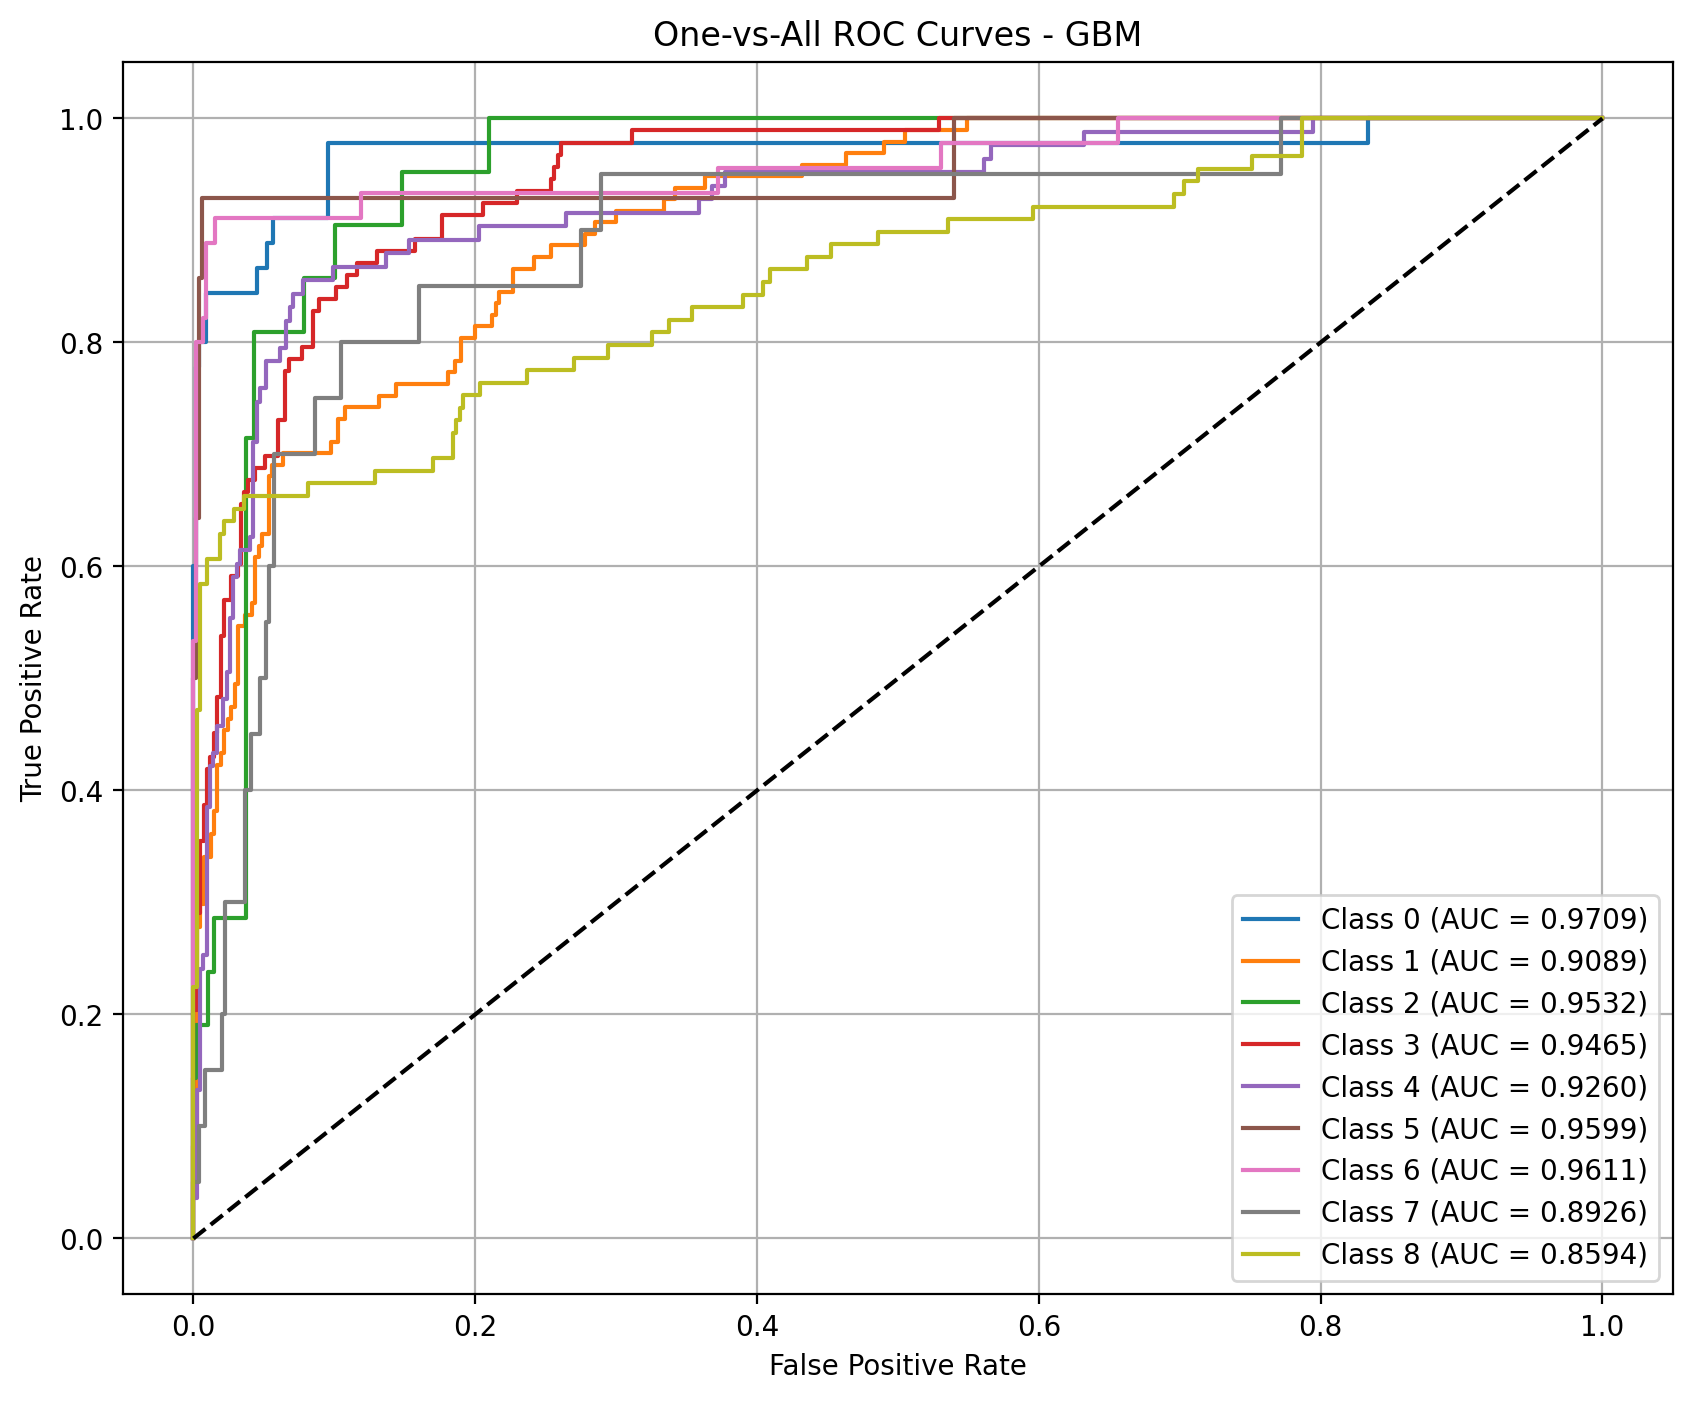

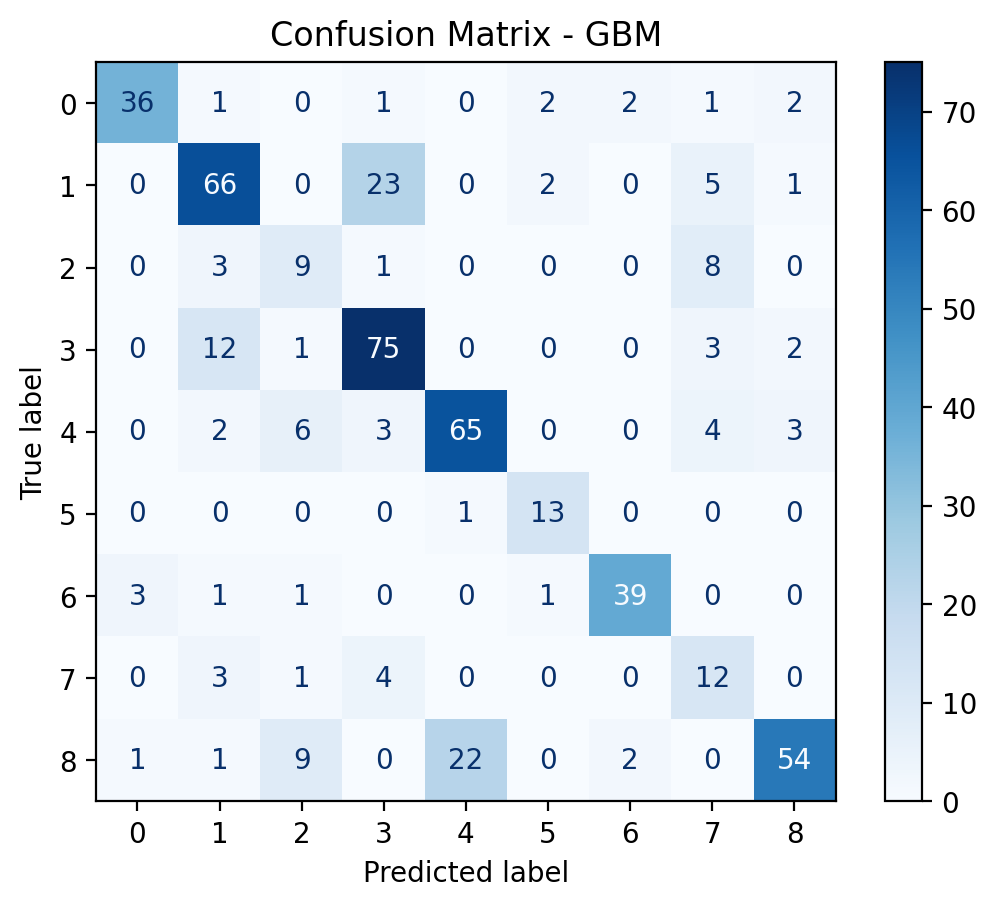

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GBM model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = gbm_model.predict(X_test_scaled)
y_prob = gbm_model.predict_proba(X_test_scaled)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - GBM")
plt.legend()
plt.grid()
plt.show()

# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_labels, cmap="Blues"
)
plt.title("Confusion Matrix - GBM")
plt.show()

# 1D Convolutional Neural Networks (CNN)

Test Accuracy: 0.7337
Macro Precision: 0.7012
Macro Recall: 0.7453
Macro F1-Score: 0.7098


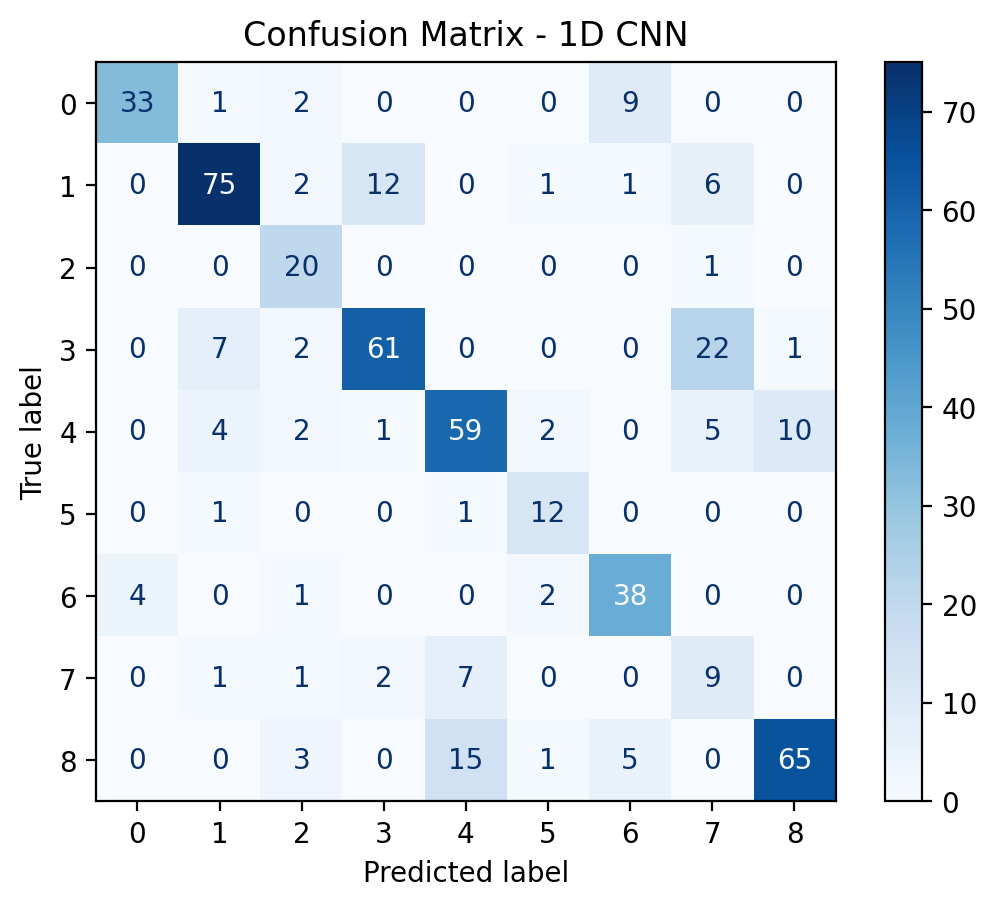

One-vs-All AUC: 0.9458


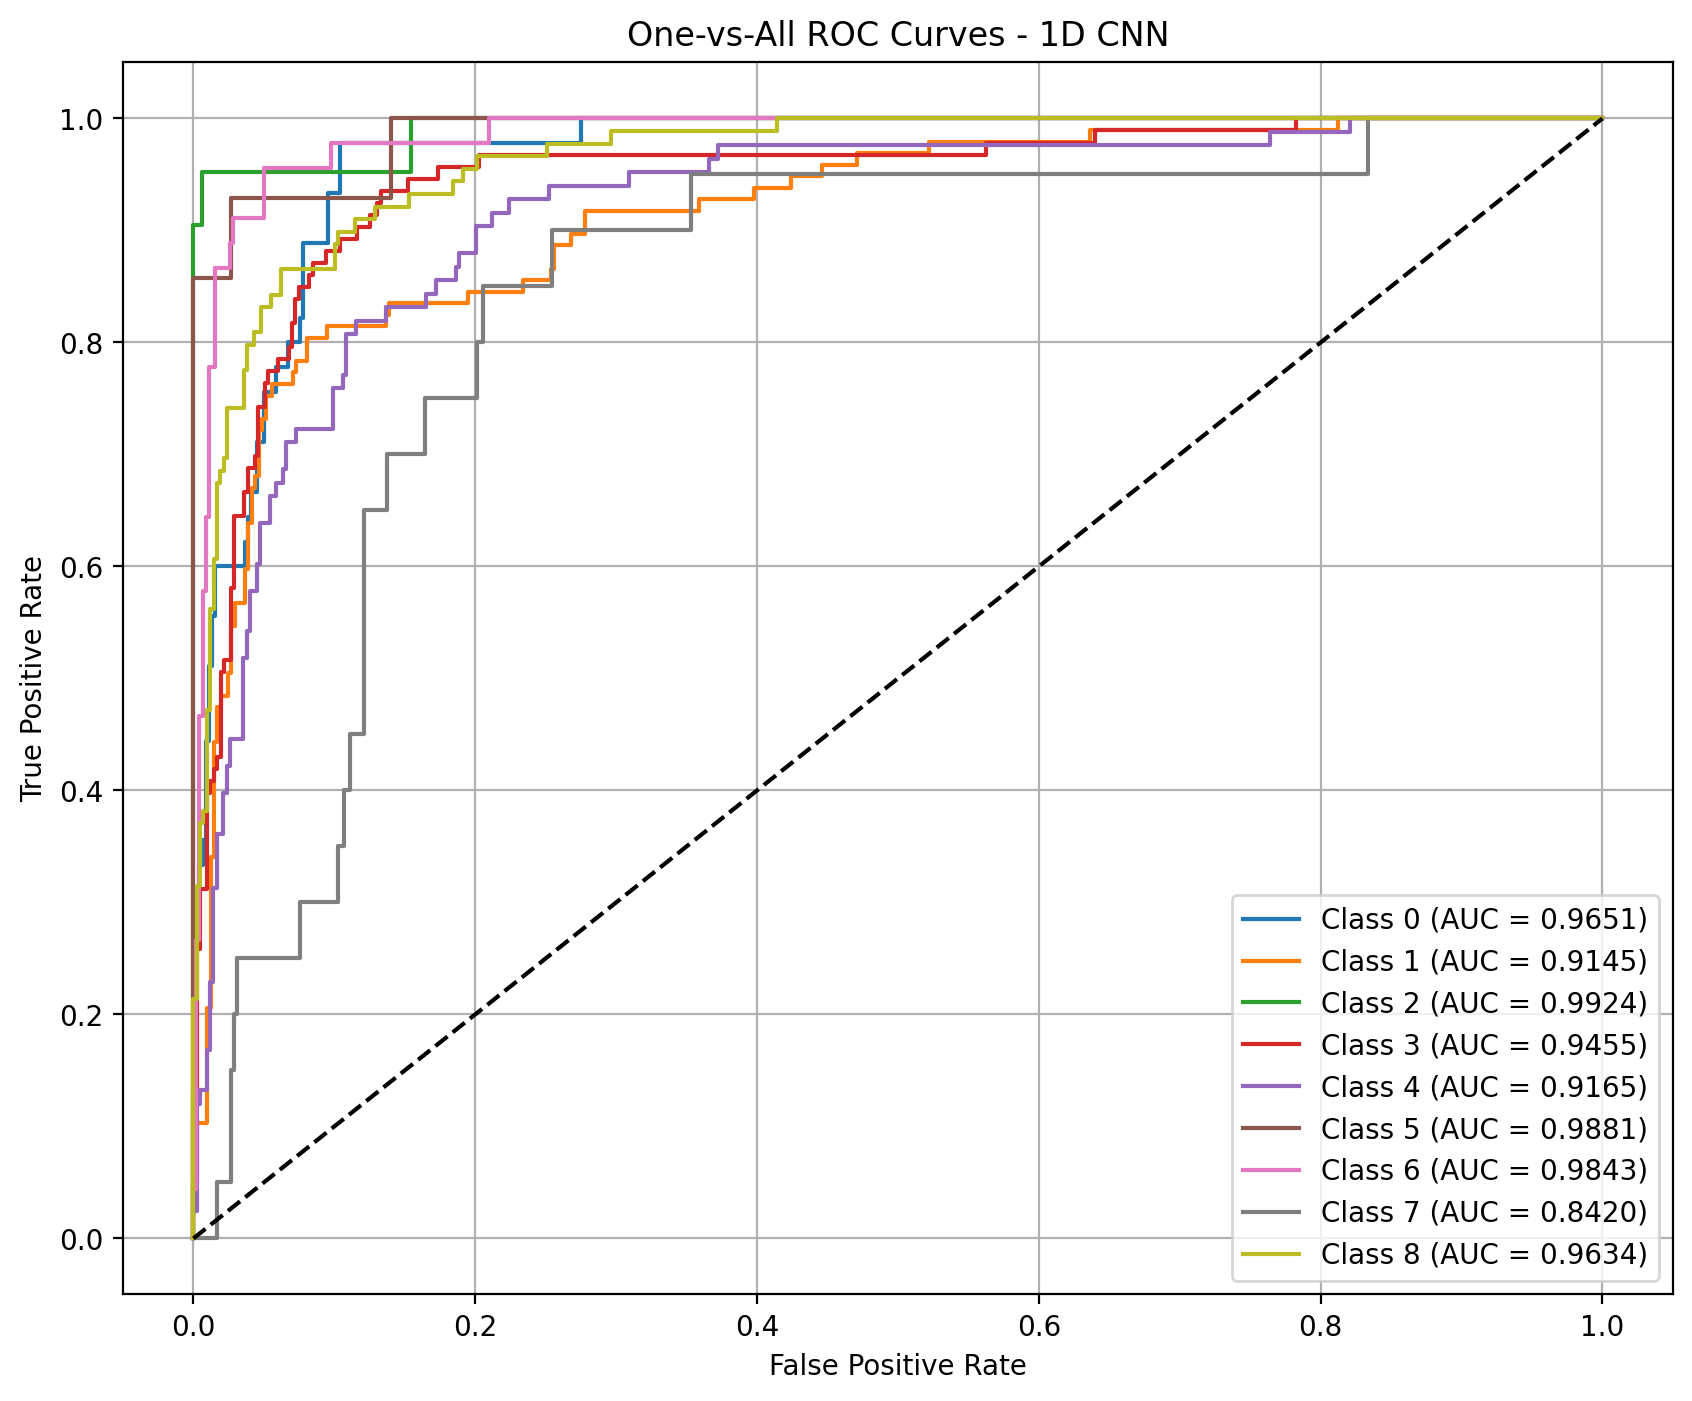

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import label_binarize

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare data for PyTorch (convert to PyTorch tensors)
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32).unsqueeze(2)  # (samples, features, 1)
X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32).unsqueeze(2)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32).unsqueeze(2)

# Reshape input tensors for 1D CNN
X_train_tensor = X_train_tensor.permute(0, 2, 1)  # (samples, features, 1) -> (samples, 1, features)
X_val_tensor = X_val_tensor.permute(0, 2, 1)
X_test_tensor = X_test_tensor.permute(0, 2, 1)

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the CNN Model
class Tabular1DCNN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(Tabular1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, stride=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * ((num_features - 2) // 2), 128)  # Adjust based on input dimensions
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))  # Convolution + Activation
        x = self.pool(x)              # Max Pooling
        x = x.view(x.size(0), -1)     # Flatten
        x = self.relu(self.fc1(x))    # Fully connected layer + Activation
        x = self.dropout(x)           # Dropout
        x = self.fc2(x)               # Output layer
        return x

# Initialize the model
num_features = X_train_scaled.shape[1]
num_classes = len(class_labels)
model = Tabular1DCNN(num_features=num_features, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, X_train, y_train, X_val, y_val, num_epochs, batch_size, verbose=False):
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(X_val, y_val)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = correct / total
        if verbose:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Train the model with verbose=False to hide epoch logs
train_model(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, num_epochs=50, batch_size=32, verbose=False)

# Evaluate on test data
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)
    y_pred = y_pred.cpu().numpy()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Convert class labels to strings if they are integers
class_labels_str = [str(label) for label in class_labels]

# Classification report with macro precision, recall, and F1
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels_str).plot(cmap="Blues")
plt.title("Confusion Matrix - 1D CNN")
plt.show()

# One-vs-All AUC and ROC Curves
y_test_binarized = label_binarize(y_test, classes=range(num_classes))  # Binarize labels
y_prob = outputs.cpu().numpy()  # Model probabilities from the forward pass

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels_str[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - 1D CNN")
plt.legend()
plt.grid()
plt.show()

# TabNet


Early stopping occurred at epoch 48 with best_epoch = 28 and best_val_accuracy = 0.88235
Test Accuracy: 0.6410
Macro Precision: 0.5659
Macro Recall: 0.5989
Macro F1-Score: 0.5645


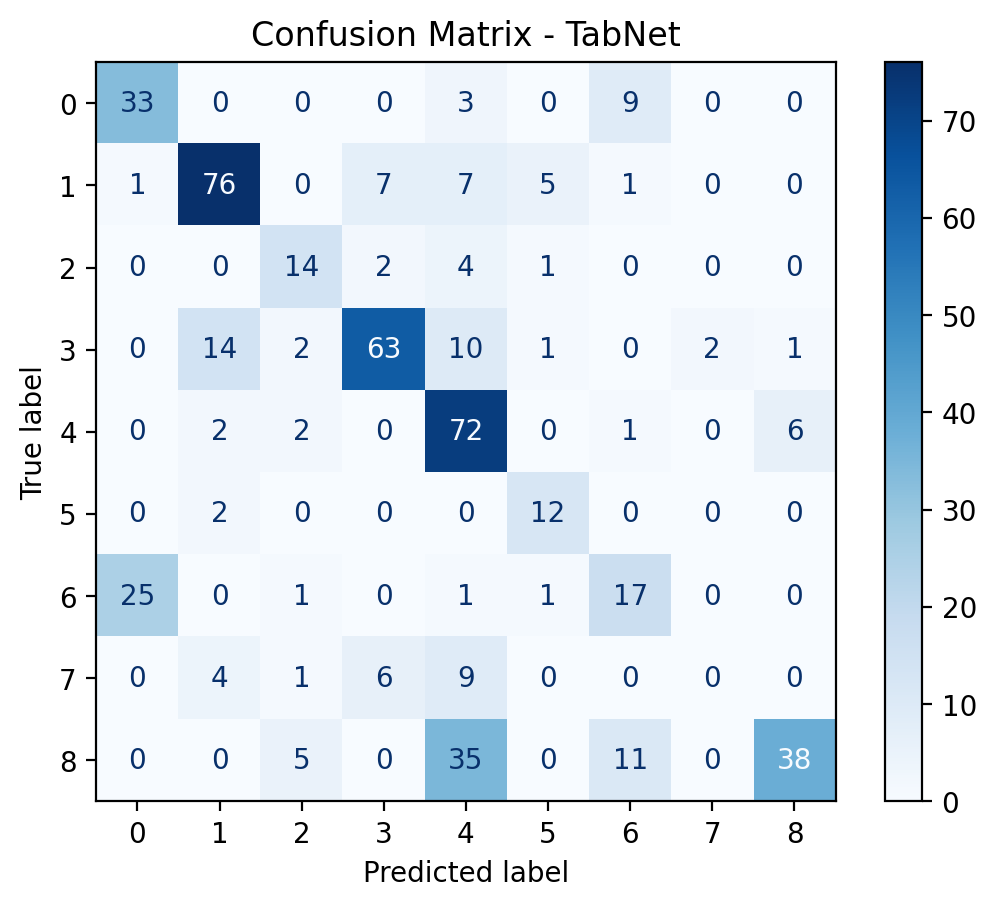

One-vs-All AUC: 0.9120


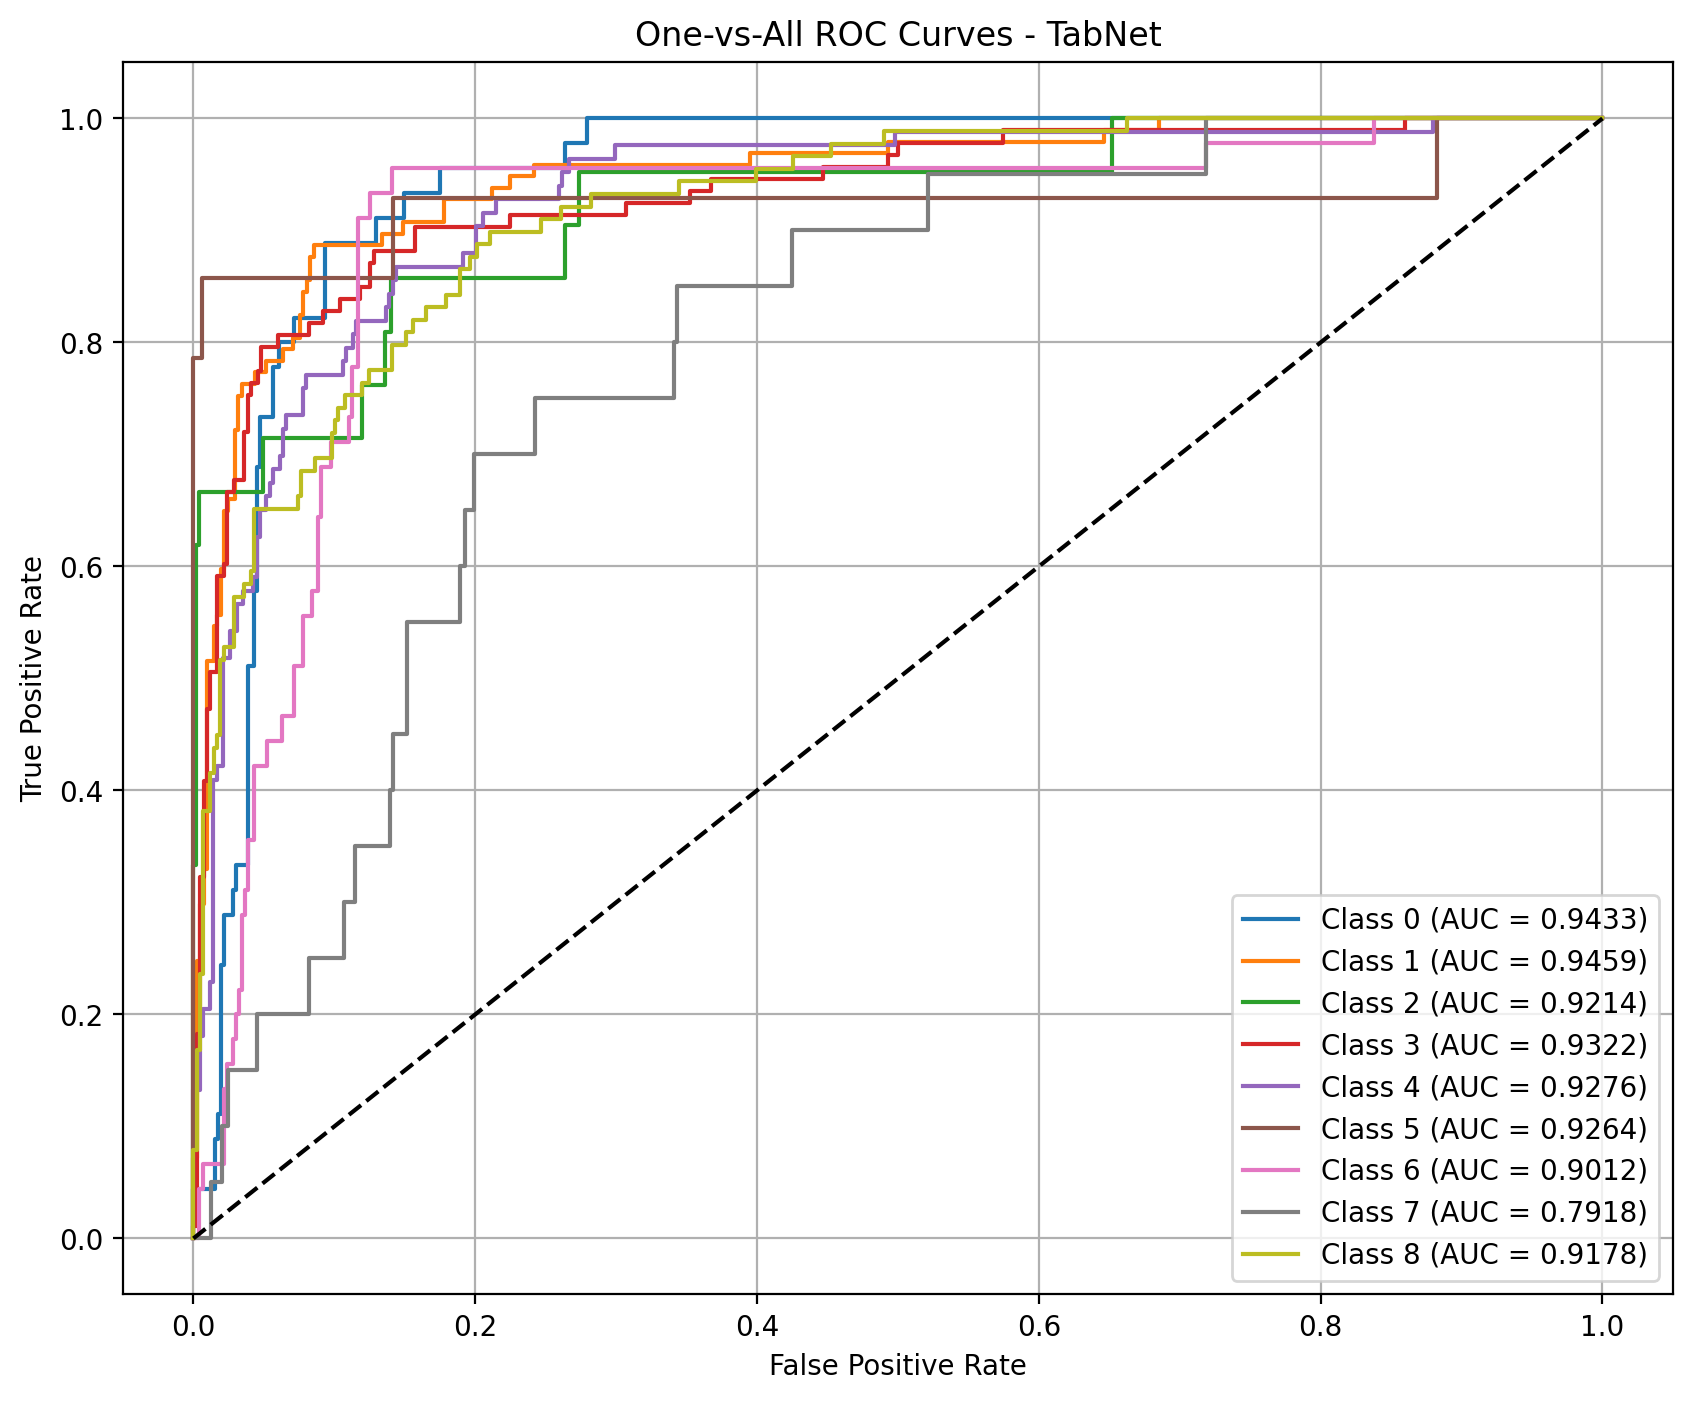

In [37]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt

# Convert scaled data to numpy arrays (TabNet works with numpy arrays)
X_train_np = X_train_scaled.values
X_val_np = X_val_scaled.values
X_test_np = X_test_scaled.values

y_train_np = y_train
y_val_np = y_val
y_test_np = y_test

# Initialize TabNet Classifier
tabnet_model = TabNetClassifier(
    optimizer_params={"lr": 0.02},
    verbose=0,
    seed=42
)

# Train the model using scaled data
tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=200,  # Increased number of epochs
    patience=20,  # Allow more time for validation accuracy to improve
    batch_size=16  # Reduced batch size for better convergence
)

# Predictions
y_pred = tabnet_model.predict(X_test_np)
y_prob = tabnet_model.predict_proba(X_test_np)

# Test Accuracy
test_accuracy = accuracy_score(y_test_np, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_np, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - TabNet")
plt.show()

# One-vs-All AUC and ROC Curves
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test_np, classes=range(len(class_labels)))  # Binarize labels

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - TabNet")
plt.legend()
plt.grid()
plt.show()

# FT-Transformer from Pytorch

**Github: https://github.com/lucidrains/tab-transformer-pytorch**

Train Loss: 0.5491, Validation Accuracy: 0.7059
Test Accuracy: 0.7318
Macro Precision: 0.6973, Recall: 0.7381, F1: 0.6989
One-vs-All AUC: 0.9300


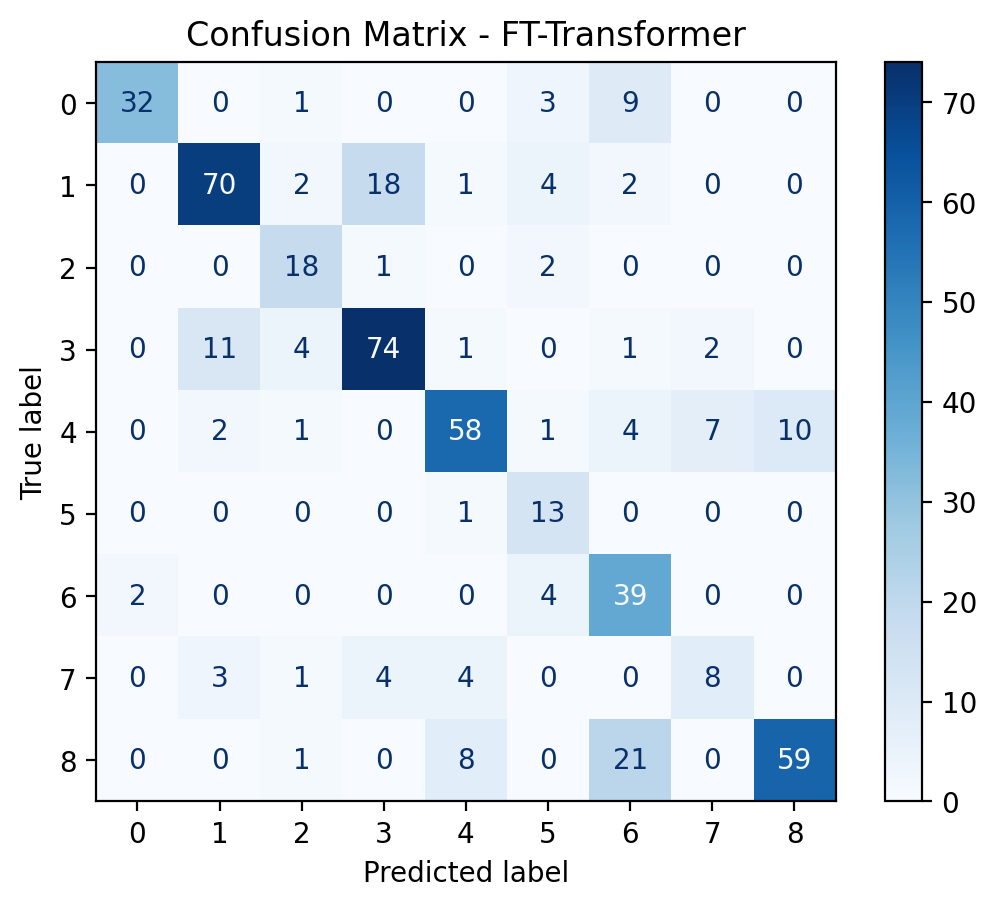

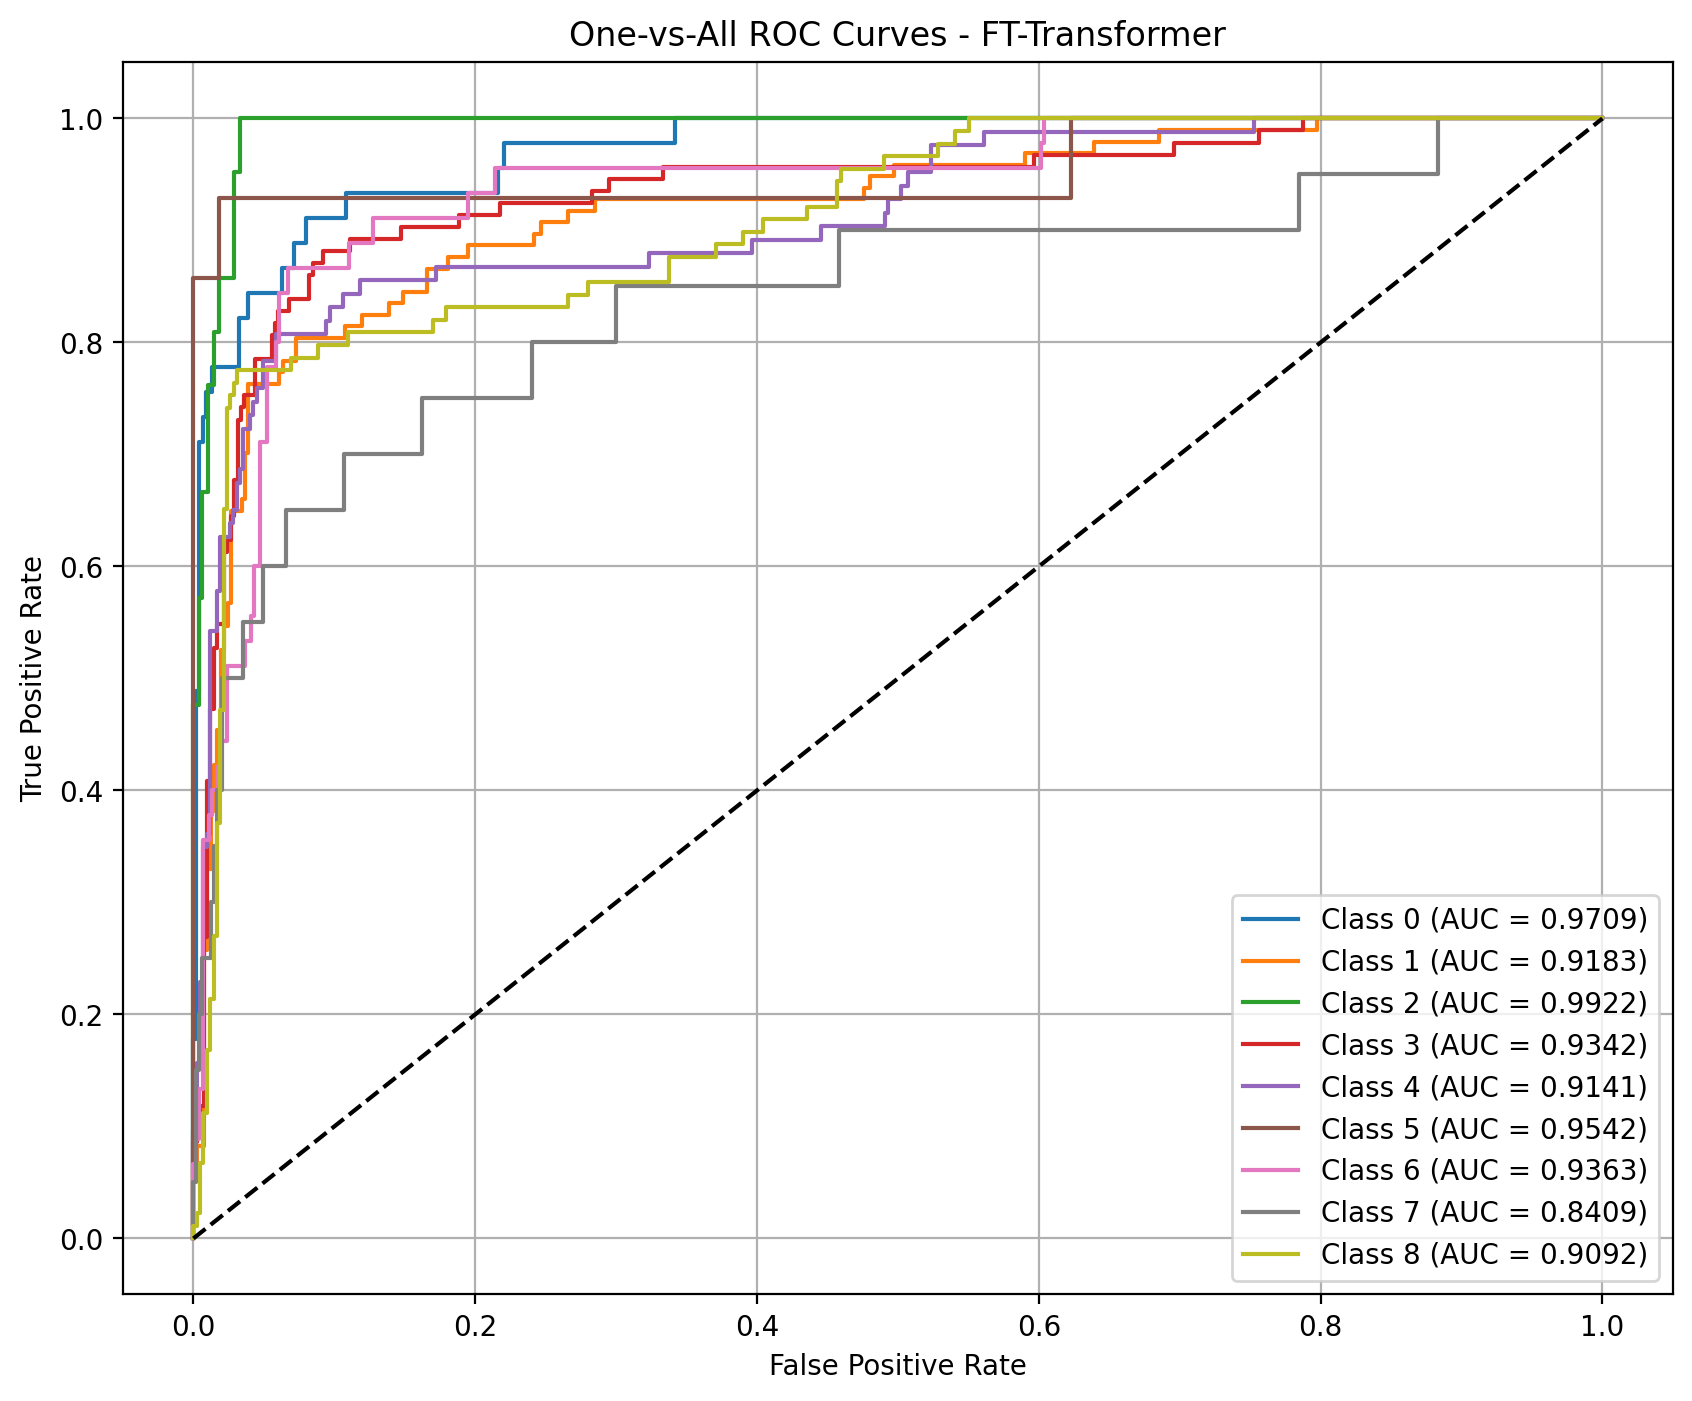

In [56]:
import torch
from tab_transformer_pytorch import FTTransformer
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define FT-Transformer
model = FTTransformer(
    categories=(1,),  # Dummy categorical feature with 1 category
    num_continuous=X_train_scaled.shape[1],  # Number of continuous features
    dim=32,  # Transformer embedding dimension
    dim_out=len(class_labels),  # Number of output classes
    depth=6,  # Depth of the transformer
    heads=8,  # Number of attention heads
    attn_dropout=0.1,  # Attention dropout
    ff_dropout=0.1  # Feedforward dropout
).to(device)

# Dataset preparation
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Dummy categorical input
dummy_categ = torch.zeros(X_train_tensor.size(0), 1, device=device, dtype=torch.long)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_ft_transformer(model, X_train, y_train, X_val, y_val, dummy_categ, epochs=50, batch_size=32):
    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train.size(0))
        train_loss = 0.0

        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            X_batch, y_batch = X_train[indices], y_train[indices]
            categ_batch = dummy_categ[indices]  # Dummy categorical input

            optimizer.zero_grad()
            output = model(x_categ=categ_batch, x_numer=X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        with torch.no_grad():
            output = model(x_categ=torch.zeros(X_val.size(0), 1, device=device, dtype=torch.long), x_numer=X_val)
            val_pred = output.argmax(dim=1)
            val_accuracy = accuracy_score(y_val.cpu().numpy(), val_pred.cpu().numpy())

        if epoch + 1 == epochs:  # Print only the final epoch's result
            print(f"Train Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Train the model
train_ft_transformer(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, dummy_categ)

# Evaluation on test data
model.eval()
with torch.no_grad():
    categ_test = torch.zeros(X_test_tensor.size(0), 1, device=device, dtype=torch.long)  # Dummy categorical input
    test_output = model(x_categ=categ_test, x_numer=X_test_tensor)
    y_test_pred = test_output.argmax(dim=1).cpu().numpy()
    y_test_prob = torch.softmax(test_output, dim=1).cpu().numpy()

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# One-vs-All AUC
y_test_binarized = label_binarize(y_test, classes=range(len(class_labels)))
auc = roc_auc_score(y_test_binarized, y_test_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - FT-Transformer")
plt.show()

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - FT-Transformer")
plt.legend()
plt.grid()
plt.show()

# TabTransformer from Pytorch

**Github: https://github.com/lucidrains/tab-transformer-pytorch**

Train Loss: 0.0056, Validation Accuracy: 0.8824
Test Accuracy: 0.7475
Macro Precision: 0.7079, Recall: 0.7412, F1: 0.7214
One-vs-All AUC: 0.9564


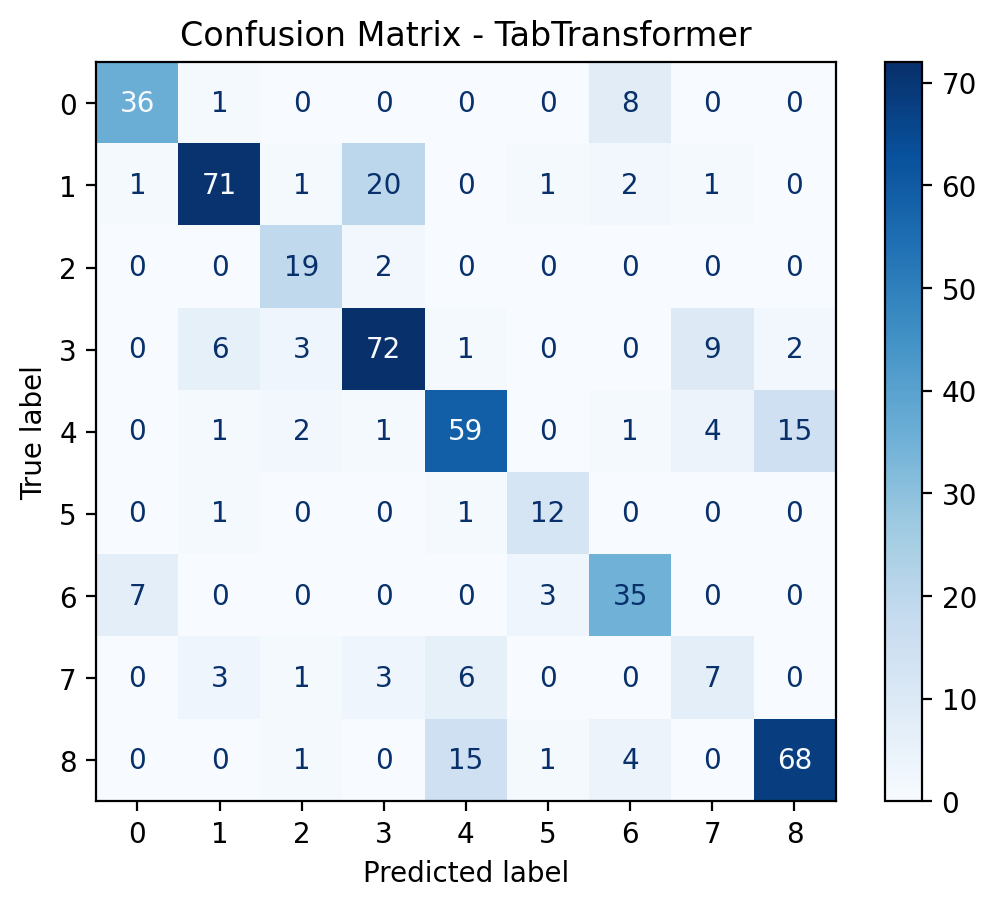

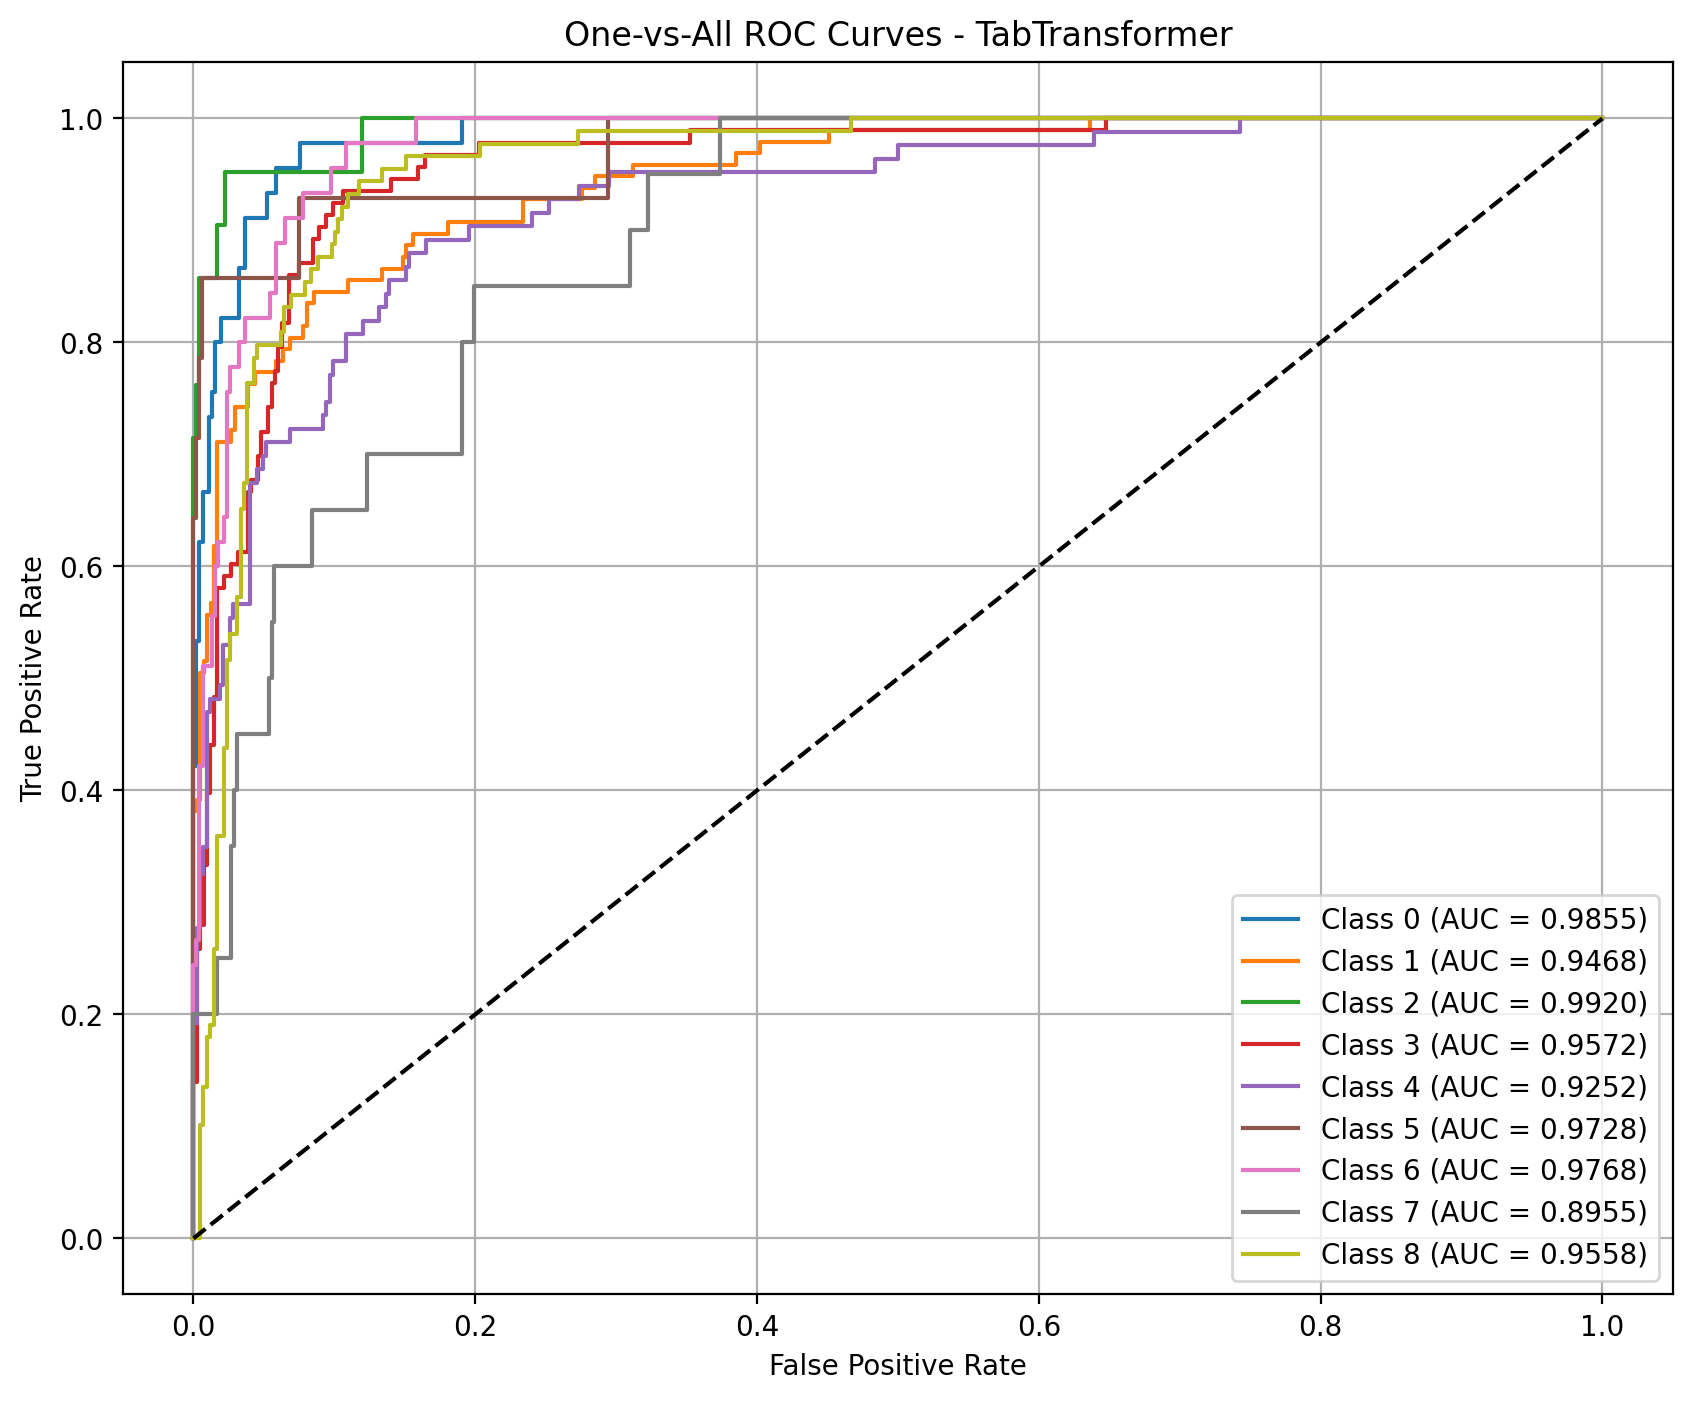

In [58]:
import torch
from tab_transformer_pytorch import TabTransformer
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Continuous normalization parameters (mean and std for each feature)
cont_mean_std = torch.tensor(
    [[0.0, 1.0] for _ in range(X_train_scaled.shape[1])],  # Fixed parenthesis
    dtype=torch.float32
).to(device)

# Define TabTransformer
model = TabTransformer(
    categories=(1,),  # Dummy categorical feature with 1 category
    num_continuous=X_train_scaled.shape[1],  # Number of continuous features
    dim=32,  # Transformer embedding dimension
    dim_out=len(class_labels),  # Number of output classes
    depth=6,  # Depth of the transformer
    heads=8,  # Number of attention heads
    attn_dropout=0.1,  # Attention dropout
    ff_dropout=0.1,  # Feedforward dropout
    mlp_hidden_mults=(4, 2),  # Multipliers for hidden layers in the MLP head
    mlp_act=nn.ReLU(),  # Activation function for the MLP head
    continuous_mean_std=cont_mean_std,  # Mean and std for continuous features
).to(device)

# Dataset preparation
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Dummy categorical input
dummy_categ = torch.zeros(X_train_tensor.size(0), 1, device=device, dtype=torch.long)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_tab_transformer(model, X_train, y_train, X_val, y_val, dummy_categ, epochs=50, batch_size=32):
    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train.size(0))
        train_loss = 0.0

        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            X_batch, y_batch = X_train[indices], y_train[indices]
            categ_batch = dummy_categ[indices]  # Dummy categorical input

            optimizer.zero_grad()
            output = model(x_categ=categ_batch, x_cont=X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        with torch.no_grad():
            output = model(x_categ=torch.zeros(X_val.size(0), 1, device=device, dtype=torch.long), x_cont=X_val)
            val_pred = output.argmax(dim=1)
            val_accuracy = accuracy_score(y_val.cpu().numpy(), val_pred.cpu().numpy())

        if epoch + 1 == epochs:  # Print only the final epoch's result
            print(f"Train Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Train the model
train_tab_transformer(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, dummy_categ)

# Evaluation on test data
model.eval()
with torch.no_grad():
    categ_test = torch.zeros(X_test_tensor.size(0), 1, device=device, dtype=torch.long)  # Dummy categorical input
    test_output = model(x_categ=categ_test, x_cont=X_test_tensor)
    y_test_pred = test_output.argmax(dim=1).cpu().numpy()
    y_test_prob = torch.softmax(test_output, dim=1).cpu().numpy()

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# One-vs-All AUC
y_test_binarized = label_binarize(y_test, classes=range(len(class_labels)))
auc = roc_auc_score(y_test_binarized, y_test_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - TabTransformer")
plt.show()

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - TabTransformer")
plt.legend()
plt.grid()
plt.show()

# TabSeq

**This code is directly taken from this github: https://github.com/zadid6pretam/TabSeq and modified for this dataset**

2024-12-19 00:41:56.386956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:41:56.407766: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:41:56.416511: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:41:57.056877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:41:57.061724: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:41:57.063893: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deseria

1/1 [==============================] - 0s 24ms/step


2024-12-19 00:41:59.622416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:41:59.625360: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:41:59.626766: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


16/16 [==============================] - 0s 3ms/step


2024-12-19 00:42:00.997917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:42:01.020302: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:42:01.029834: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:42:01.812926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:42:01.819446: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:42:01.822233: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deseria

16/16 [==============================] - 0s 11ms/step - loss: 0.8641 - accuracy: 0.7396
Test Accuracy: 0.7396
16/16 [==============================] - 0s 4ms/step


2024-12-19 00:42:05.618968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:42:05.622219: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:42:05.623820: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


Test AUC (macro): 0.9456
Macro Precision: 0.6994
Macro Recall: 0.7386
Macro F1-Score: 0.6974


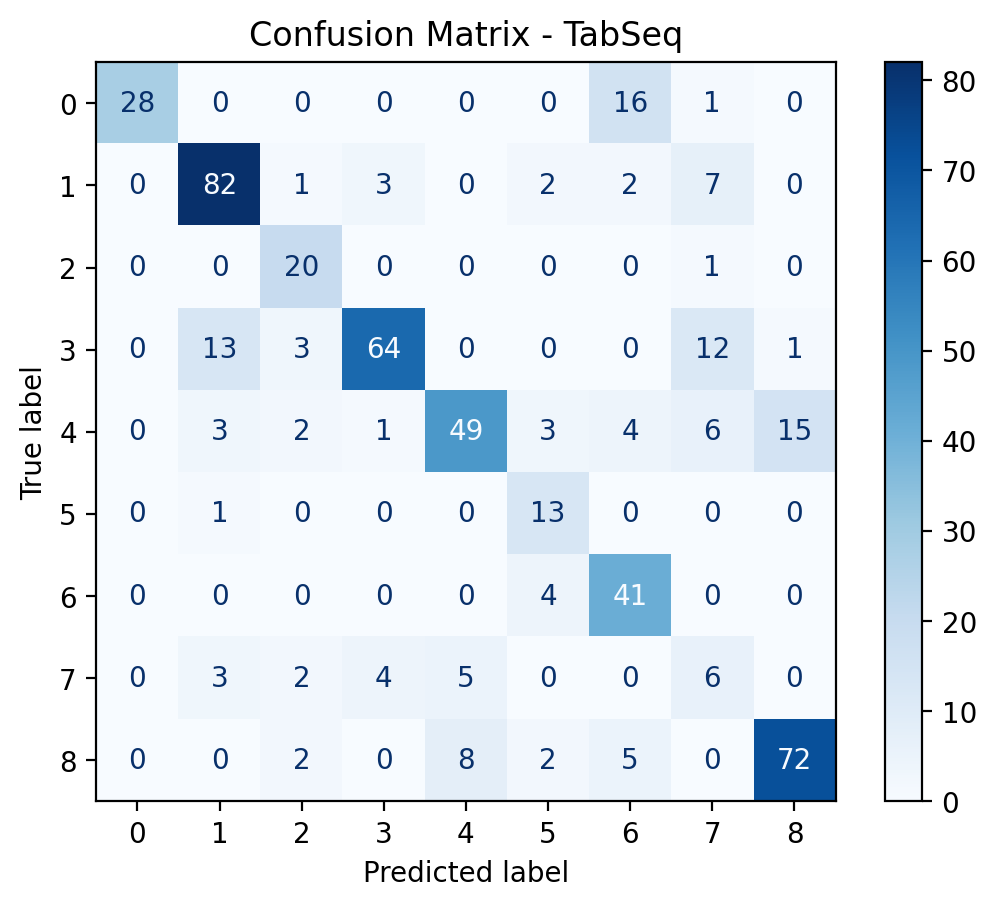

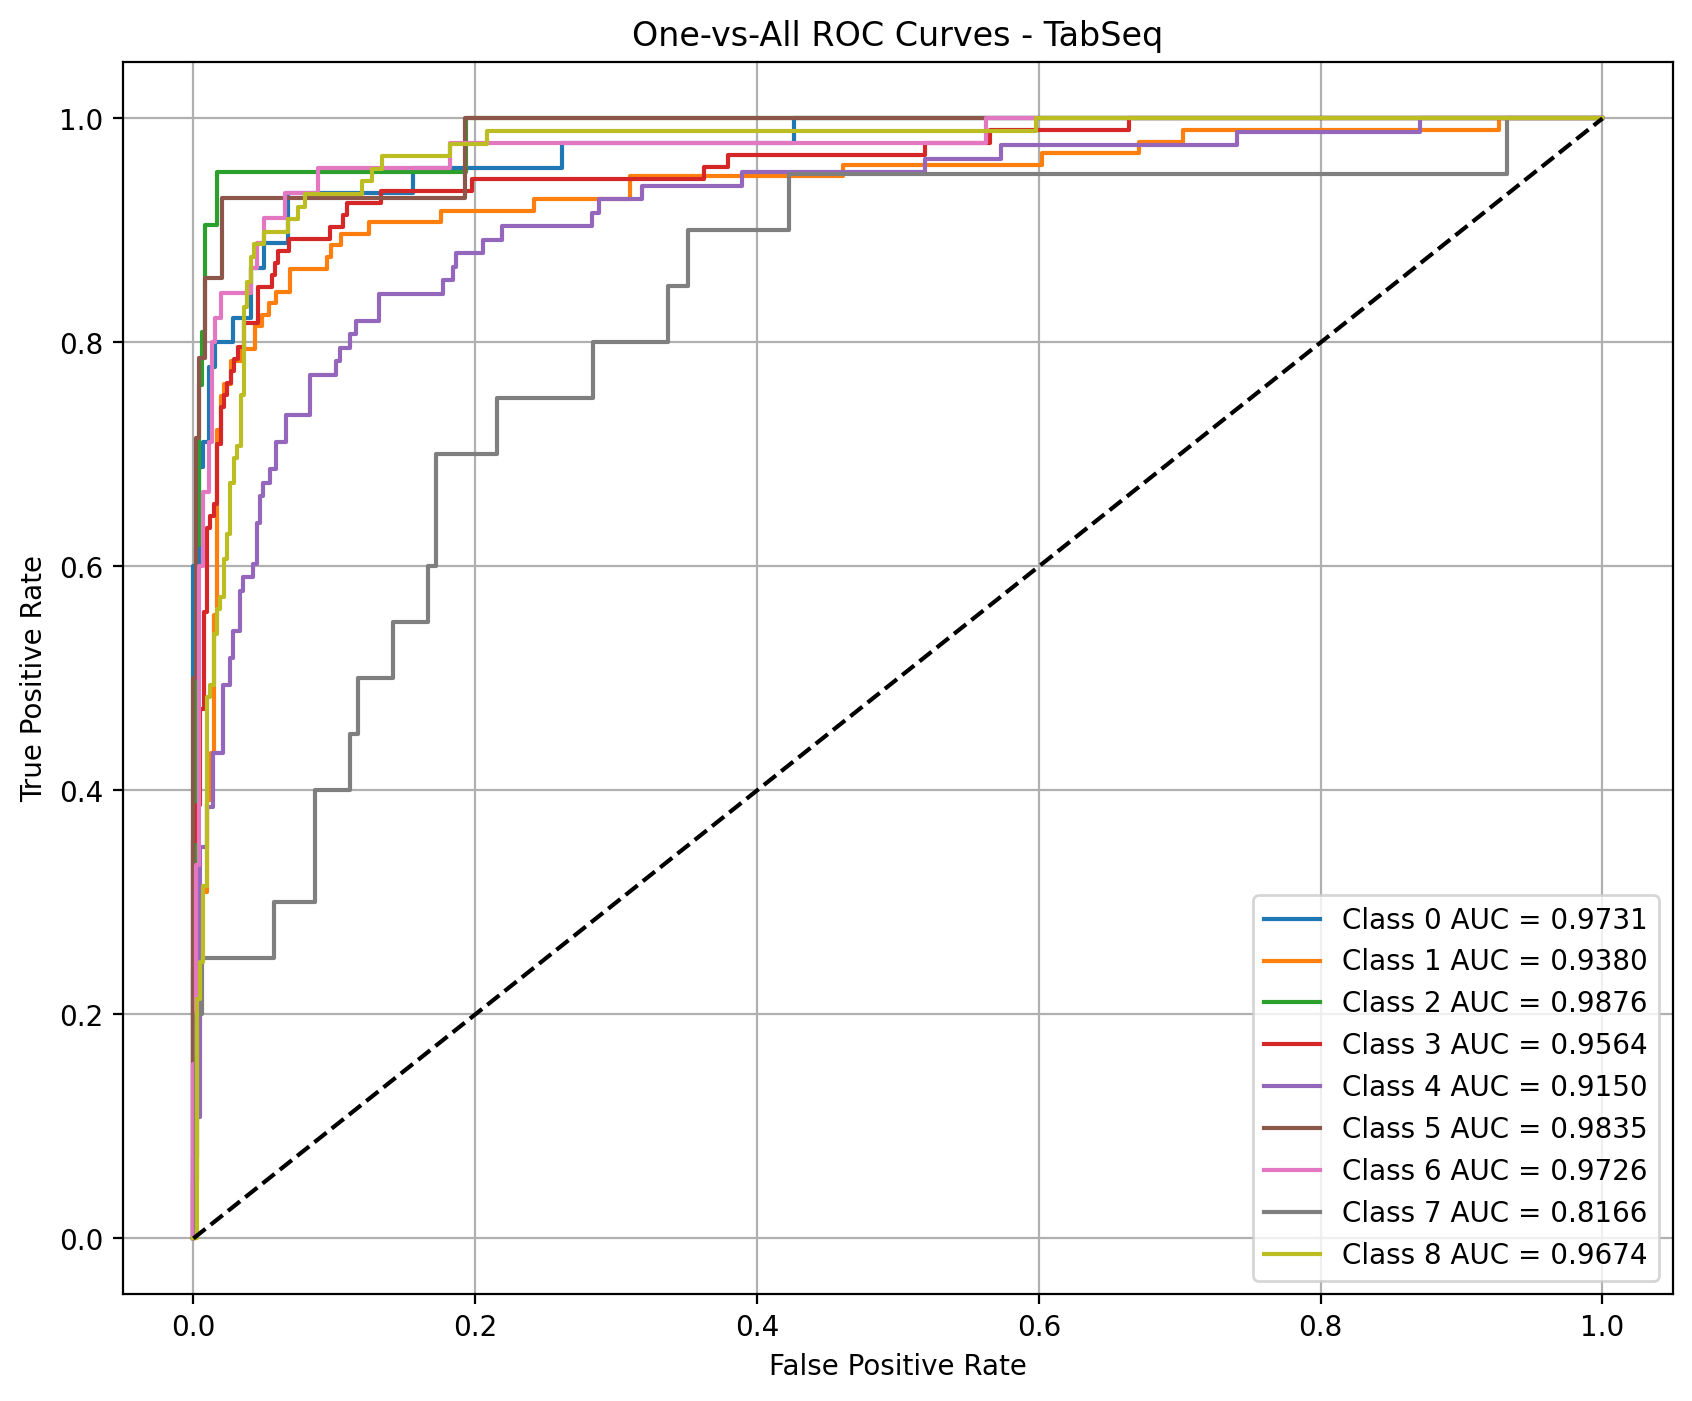

In [64]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ==========================
# Feature Ordering Functions
# ==========================
def minimize_dispersion(X_cluster):
    variances = X_cluster.var(axis=0)
    ordered_features = variances.sort_values(ascending=False).index.tolist()
    return ordered_features

def calculate_cluster_variances(X_train, cluster_labels):
    num_clusters = len(np.unique(cluster_labels))
    cluster_variances = np.zeros(num_clusters)
    for cluster_id in range(num_clusters):
        feature_indices = np.where(cluster_labels == cluster_id)[0]
        cluster_features = X_train.iloc[:, feature_indices]
        cluster_variances[cluster_id] = cluster_features.var().sum()
    return cluster_variances

def assign_weights_with_randomness(cluster_variances):
    base_weights = cluster_variances / cluster_variances.sum()
    random_factors = np.random.rand(len(base_weights))
    weights = base_weights * random_factors
    normalized_weights = weights / weights.sum()
    return normalized_weights

def integrate_local_orderings_with_weights(local_orderings, weights, feature_names):
    feature_positions = {feature: 0 for feature in feature_names}
    total_weight = sum(weights)
    for ordering, weight in zip(local_orderings, weights):
        for position, feature_name in enumerate(ordering):
            feature_positions[feature_name] += (position * weight)
    averaged_positions = {feature: pos / total_weight for feature, pos in feature_positions.items()}
    global_ordering = sorted(averaged_positions, key=averaged_positions.get)
    return global_ordering

# =====================
# Feature Ordering Steps
# =====================
X_train = pd.DataFrame(X_train_scaled)  # Scaled training dataset
X_valid = pd.DataFrame(X_val_scaled)   # Scaled validation dataset
X_test = pd.DataFrame(X_test_scaled)   # Scaled test dataset

num_clusters = 5
X_features = X_train.transpose()
clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = clustering_model.fit_predict(X_features)

clusters = []
for cluster_id in range(num_clusters):
    features_in_cluster = X_features.index[cluster_labels == cluster_id]
    X_cluster = X_train[features_in_cluster]
    clusters.append(X_cluster)

local_orderings = [minimize_dispersion(X_cluster) for X_cluster in clusters]
cluster_variances = calculate_cluster_variances(X_train, cluster_labels)
weights = assign_weights_with_randomness(cluster_variances)
feature_names = X_train.columns.tolist()
global_ordering = integrate_local_orderings_with_weights(local_orderings, weights, feature_names)

X_train_reordered = X_train[global_ordering]
X_valid_reordered = X_valid[global_ordering]
X_test_reordered = X_test[global_ordering]

# =======================
# Denoising Autoencoder
# =======================
input_dim = X_train_reordered.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

noise_factor = 0.1
X_train_noisy = X_train_reordered + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_reordered.shape)
X_valid_noisy = X_valid_reordered + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_valid_reordered.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_valid_noisy = np.clip(X_valid_noisy, 0., 1.)

early_stopping_ae = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Hide epoch output
autoencoder.fit(
    X_train_noisy, X_train_reordered,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_noisy, X_valid_reordered),
    verbose=0,  # Suppress epoch output
    callbacks=[early_stopping_ae]
)

encoder = Model(inputs=autoencoder.input, outputs=encoded)
encoded_train = encoder.predict(X_train_reordered)
encoded_valid = encoder.predict(X_valid_reordered)
encoded_test = encoder.predict(X_test_reordered)

# ===================
# Classifier
# ===================
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes)
y_valid_one_hot = to_categorical(y_val, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

classifier = Sequential([
    Dense(128, activation='relu', input_dim=encoded_train.shape[1]),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hide epoch output
classifier.fit(
    encoded_train, y_train_one_hot,
    epochs=50,
    batch_size=32,
    validation_data=(encoded_valid, y_valid_one_hot),
    verbose=0,  # Suppress epoch output
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# =====================
# Evaluation
# =====================
test_loss, test_accuracy = classifier.evaluate(encoded_test, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy:.4f}')

y_test_pred_proba = classifier.predict(encoded_test)
test_auc = roc_auc_score(y_test_one_hot, y_test_pred_proba, average='macro', multi_class='ovr')
print(f'Test AUC (macro): {test_auc:.4f}')

y_test_pred_classes = np.argmax(y_test_pred_proba, axis=1)
y_test_true_classes = np.argmax(y_test_one_hot, axis=1)

# Macro Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_true_classes, y_test_pred_classes, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - TabSeq")
plt.show()

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_test_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc_score(y_test_one_hot[:, i], y_test_pred_proba[:, i]):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - TabSeq")
plt.legend()
plt.grid()
plt.show()

# Weighted Cross-entropy loss for deep learning

# TabSeq + weighted cross entropy loss

2024-12-19 00:53:51.466540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:53:51.488108: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:53:51.497118: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:53:52.374086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:53:52.378945: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:53:52.381108: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deseria

5/5 [==============================] - 0s 13ms/step


2024-12-19 00:53:55.155867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:53:55.159662: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:53:55.161404: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


16/16 [==============================] - 0s 3ms/step


2024-12-19 00:53:57.395903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:53:57.419589: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:53:57.429389: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:53:58.378215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:53:58.384962: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:53:58.387850: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deseria

16/16 [==============================] - 0s 12ms/step - loss: 0.0801 - accuracy: 0.7357
Test Accuracy: 0.7357
16/16 [==============================] - 0s 4ms/step


2024-12-19 00:54:03.654256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-19 00:54:03.658735: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2024-12-19 00:54:03.660922: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


Test AUC (macro): 0.9525
Macro Precision: 0.7008
Macro Recall: 0.7365
Macro F1-Score: 0.7099


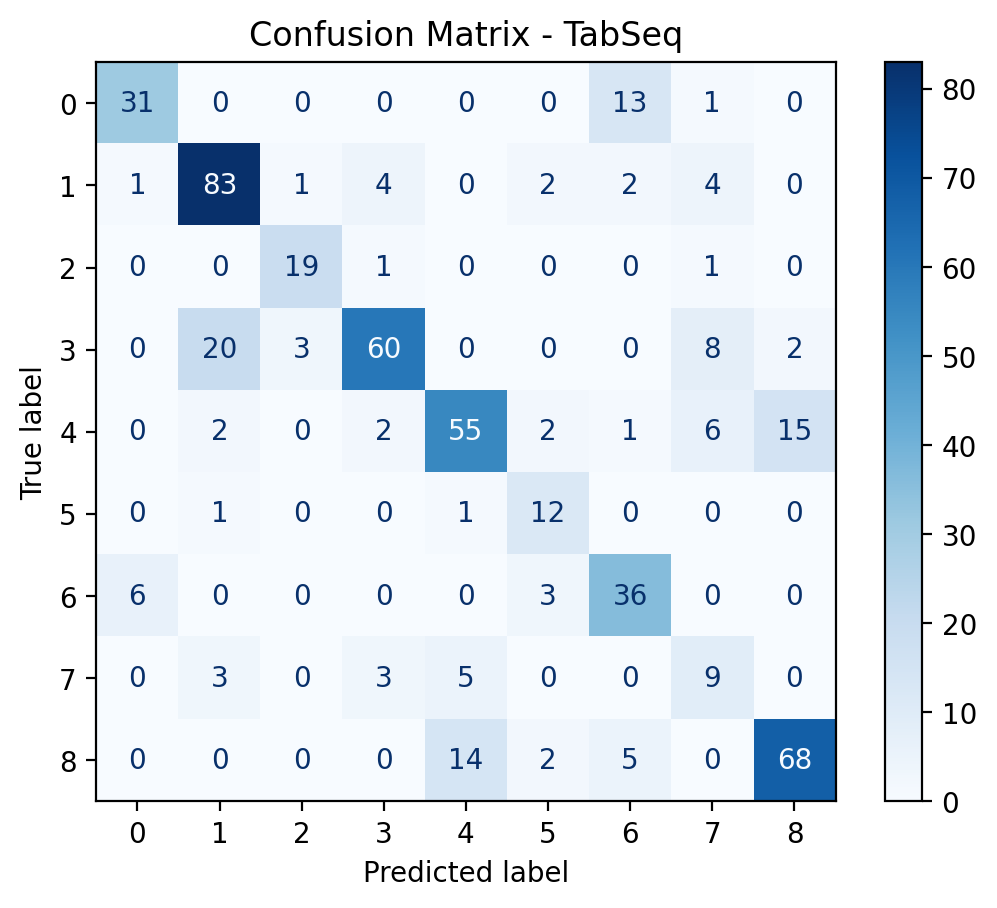

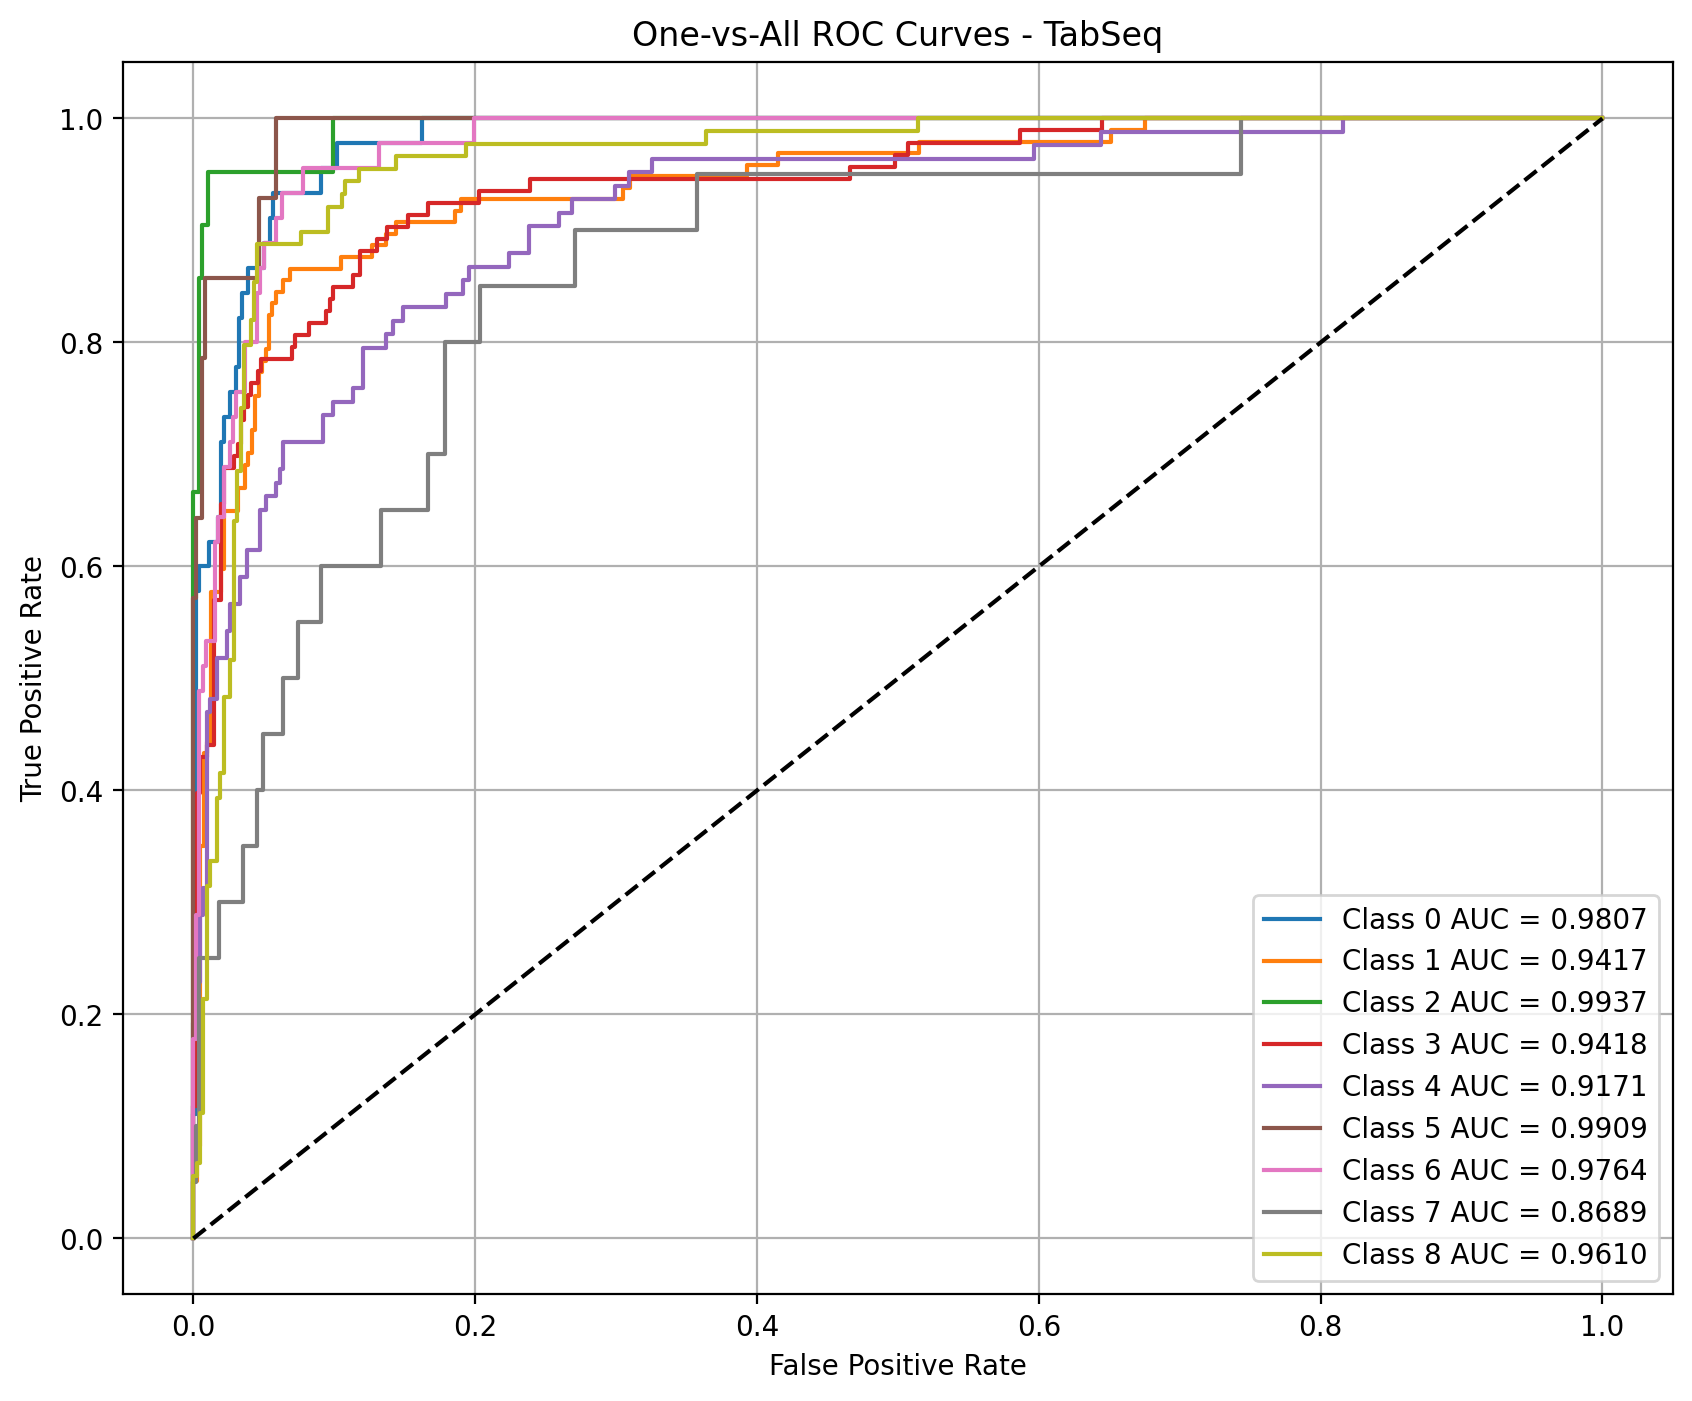

In [73]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ==========================
# Feature Ordering Functions
# ==========================
def minimize_dispersion(X_cluster):
    variances = X_cluster.var(axis=0)
    ordered_features = variances.sort_values(ascending=False).index.tolist()
    return ordered_features

def calculate_cluster_variances(X_train, cluster_labels):
    num_clusters = len(np.unique(cluster_labels))
    cluster_variances = np.zeros(num_clusters)
    for cluster_id in range(num_clusters):
        feature_indices = np.where(cluster_labels == cluster_id)[0]
        cluster_features = X_train.iloc[:, feature_indices]
        cluster_variances[cluster_id] = cluster_features.var().sum()
    return cluster_variances

def assign_weights_with_randomness(cluster_variances):
    base_weights = cluster_variances / cluster_variances.sum()
    random_factors = np.random.rand(len(base_weights))
    weights = base_weights * random_factors
    normalized_weights = weights / weights.sum()
    return normalized_weights

def integrate_local_orderings_with_weights(local_orderings, weights, feature_names):
    feature_positions = {feature: 0 for feature in feature_names}
    total_weight = sum(weights)
    for ordering, weight in zip(local_orderings, weights):
        for position, feature_name in enumerate(ordering):
            feature_positions[feature_name] += (position * weight)
    averaged_positions = {feature: pos / total_weight for feature, pos in feature_positions.items()}
    global_ordering = sorted(averaged_positions, key=averaged_positions.get)
    return global_ordering

# =====================
# Feature Ordering Steps
# =====================
X_train = pd.DataFrame(X_train_scaled)  # Scaled training dataset
X_valid = pd.DataFrame(X_val_scaled)   # Scaled validation dataset
X_test = pd.DataFrame(X_test_scaled)   # Scaled test dataset

num_clusters = 5
X_features = X_train.transpose()
clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = clustering_model.fit_predict(X_features)

clusters = []
for cluster_id in range(num_clusters):
    features_in_cluster = X_features.index[cluster_labels == cluster_id]
    X_cluster = X_train[features_in_cluster]
    clusters.append(X_cluster)

local_orderings = [minimize_dispersion(X_cluster) for X_cluster in clusters]
cluster_variances = calculate_cluster_variances(X_train, cluster_labels)
weights = assign_weights_with_randomness(cluster_variances)
feature_names = X_train.columns.tolist()
global_ordering = integrate_local_orderings_with_weights(local_orderings, weights, feature_names)

X_train_reordered = X_train[global_ordering]
X_valid_reordered = X_valid[global_ordering]
X_test_reordered = X_test[global_ordering]

# =======================
# Weighted Cross-Entropy Loss
# =======================
def weighted_categorical_crossentropy(weights):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        class_weights = tf.reduce_sum(weights * y_true, axis=-1)
        unweighted_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
        return tf.reduce_mean(class_weights * unweighted_loss)
    return loss

# Compute class weights
class_counts = np.sum(to_categorical(y_train, len(np.unique(y_train))), axis=0)
class_weights = 1 / class_counts
normalized_weights = class_weights / np.sum(class_weights)

# =======================
# Denoising Autoencoder
# =======================
input_dim = X_train_reordered.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

noise_factor = 0.1
X_train_noisy = X_train_reordered + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_reordered.shape)
X_valid_noisy = X_valid_reordered + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_valid_reordered.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_valid_noisy = np.clip(X_valid_noisy, 0., 1.)

early_stopping_ae = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Hide epoch output
autoencoder.fit(
    X_train_noisy, X_train_reordered,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_noisy, X_valid_reordered),
    verbose=0,  # Suppress epoch output
    callbacks=[early_stopping_ae]
)

encoder = Model(inputs=autoencoder.input, outputs=encoded)
encoded_train = encoder.predict(X_train_reordered)
encoded_valid = encoder.predict(X_valid_reordered)
encoded_test = encoder.predict(X_test_reordered)

# ===================
# Classifier
# ===================
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes)
y_valid_one_hot = to_categorical(y_val, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

classifier = Sequential([
    Dense(128, activation='relu', input_dim=encoded_train.shape[1]),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

classifier.compile(optimizer='adam', loss=weighted_categorical_crossentropy(normalized_weights), metrics=['accuracy'])

# Hide epoch output
classifier.fit(
    encoded_train, y_train_one_hot,
    epochs=50,
    batch_size=32,
    validation_data=(encoded_valid, y_valid_one_hot),
    verbose=0,  # Suppress epoch output
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# =====================
# Evaluation
# =====================
test_loss, test_accuracy = classifier.evaluate(encoded_test, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy:.4f}')

y_test_pred_proba = classifier.predict(encoded_test)
test_auc = roc_auc_score(y_test_one_hot, y_test_pred_proba, average='macro', multi_class='ovr')
print(f'Test AUC (macro): {test_auc:.4f}')

y_test_pred_classes = np.argmax(y_test_pred_proba, axis=1)
y_test_true_classes = np.argmax(y_test_one_hot, axis=1)

# Macro Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_true_classes, y_test_pred_classes, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - TabSeq")
plt.show()

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_test_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc_score(y_test_one_hot[:, i], y_test_pred_proba[:, i]):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - TabSeq")
plt.legend()
plt.grid()
plt.show()

# TabTransformer + weighted cross entropy loss

Train Loss: 0.0005, Validation Accuracy: 0.8235
Test Accuracy: 0.7337
Macro Precision: 0.6908, Recall: 0.7373, F1: 0.7075
One-vs-All AUC: 0.9564


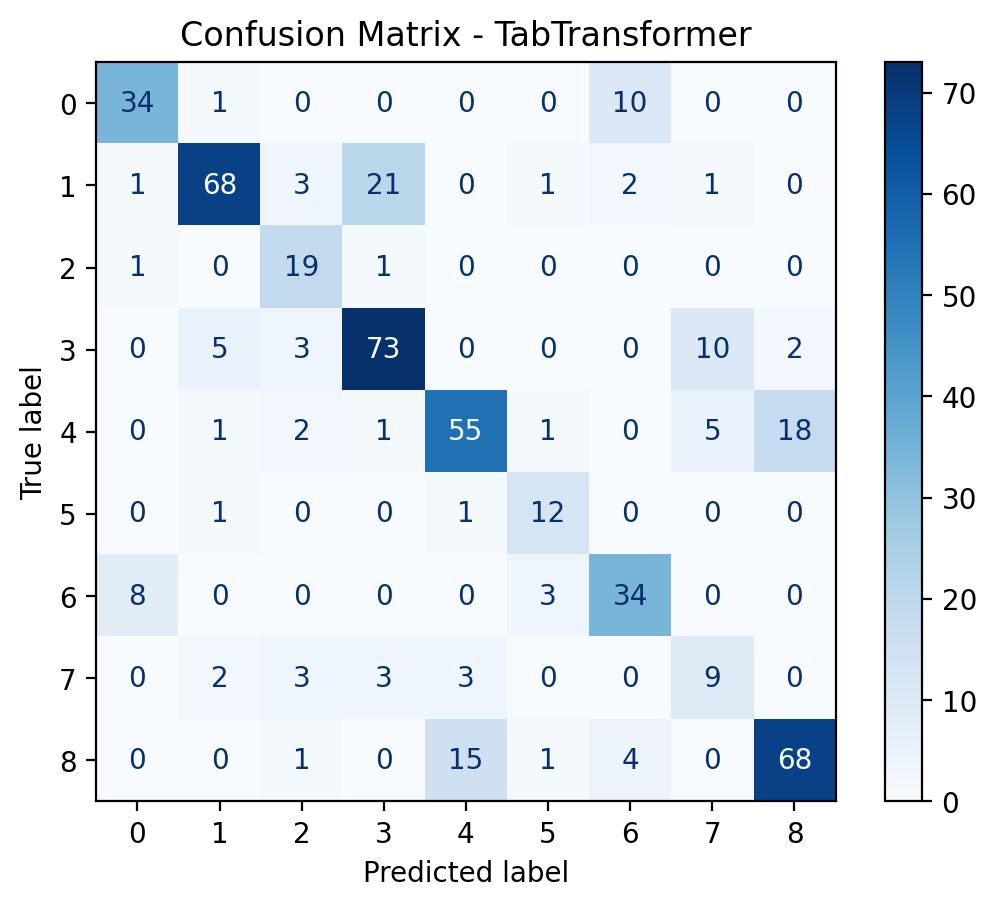

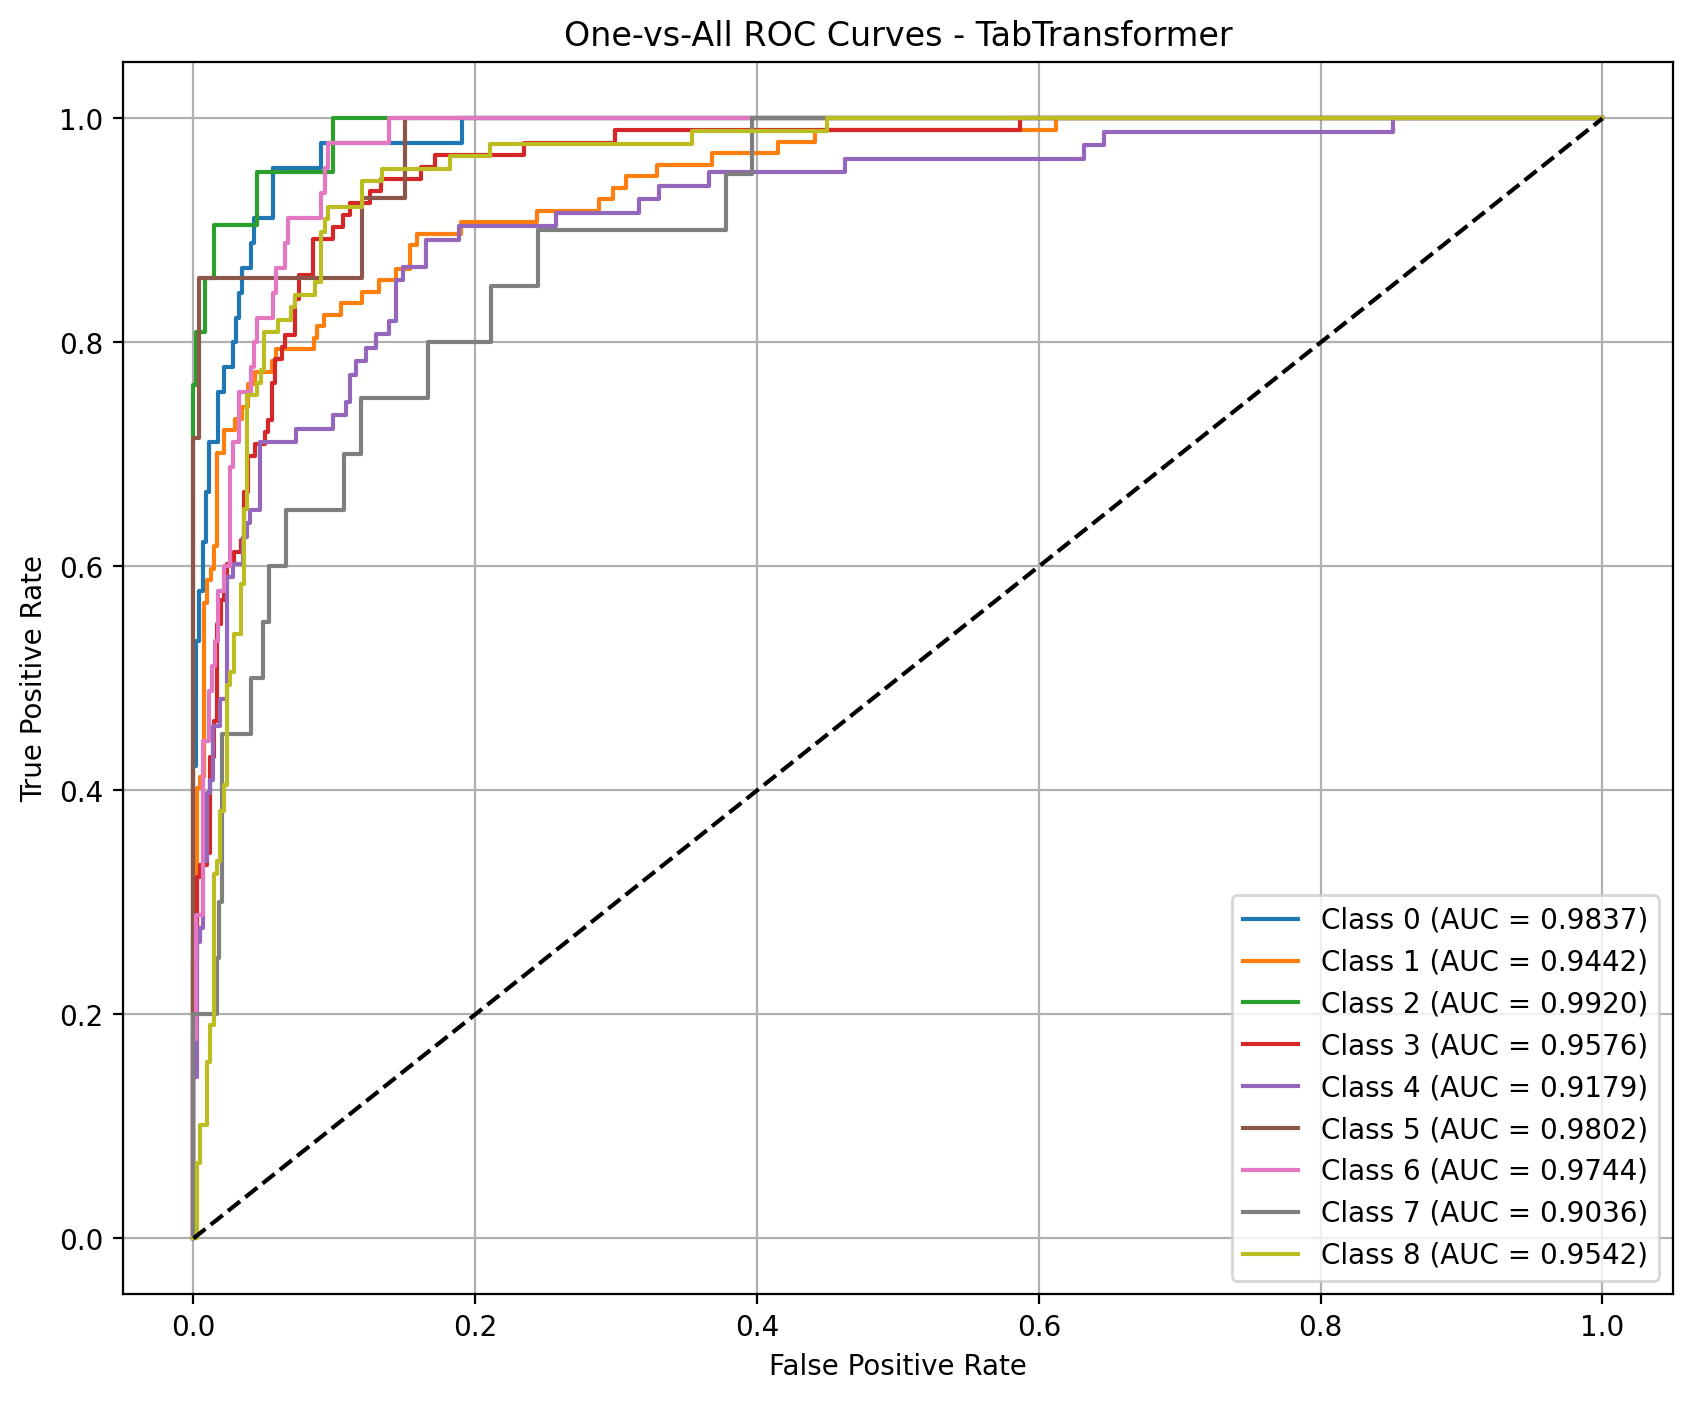

In [74]:
import torch
from tab_transformer_pytorch import TabTransformer
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Continuous normalization parameters (mean and std for each feature)
cont_mean_std = torch.tensor(
    [[0.0, 1.0] for _ in range(X_train_scaled.shape[1])],
    dtype=torch.float32
).to(device)

# Define TabTransformer
model = TabTransformer(
    categories=(1,),  # Dummy categorical feature with 1 category
    num_continuous=X_train_scaled.shape[1],  # Number of continuous features
    dim=32,  # Transformer embedding dimension
    dim_out=len(class_labels),  # Number of output classes
    depth=6,  # Depth of the transformer
    heads=8,  # Number of attention heads
    attn_dropout=0.1,  # Attention dropout
    ff_dropout=0.1,  # Feedforward dropout
    mlp_hidden_mults=(4, 2),  # Multipliers for hidden layers in the MLP head
    mlp_act=nn.ReLU(),  # Activation function for the MLP head
    continuous_mean_std=cont_mean_std,  # Mean and std for continuous features
).to(device)

# Dataset preparation
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Dummy categorical input
dummy_categ = torch.zeros(X_train_tensor.size(0), 1, device=device, dtype=torch.long)

# Compute class weights
class_counts = np.bincount(y_train)
class_weights = 1.0 / class_counts
normalized_weights = class_weights / np.sum(class_weights)
class_weights_tensor = torch.tensor(normalized_weights, dtype=torch.float32).to(device)

# Weighted Cross-Entropy Loss
def weighted_cross_entropy_loss(output, target):
    weights = class_weights_tensor[target]
    loss = nn.CrossEntropyLoss(reduction='none')(output, target)
    weighted_loss = weights * loss
    return weighted_loss.mean()

# Loss and optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_tab_transformer(model, X_train, y_train, X_val, y_val, dummy_categ, epochs=50, batch_size=32):
    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train.size(0))
        train_loss = 0.0

        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            X_batch, y_batch = X_train[indices], y_train[indices]
            categ_batch = dummy_categ[indices]  # Dummy categorical input

            optimizer.zero_grad()
            output = model(x_categ=categ_batch, x_cont=X_batch)
            loss = weighted_cross_entropy_loss(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        with torch.no_grad():
            output = model(x_categ=torch.zeros(X_val.size(0), 1, device=device, dtype=torch.long), x_cont=X_val)
            val_pred = output.argmax(dim=1)
            val_accuracy = accuracy_score(y_val.cpu().numpy(), val_pred.cpu().numpy())

        if epoch + 1 == epochs:  # Print only the final epoch's result
            print(f"Train Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Train the model
train_tab_transformer(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, dummy_categ)

# Evaluation on test data
model.eval()
with torch.no_grad():
    categ_test = torch.zeros(X_test_tensor.size(0), 1, device=device, dtype=torch.long)  # Dummy categorical input
    test_output = model(x_categ=categ_test, x_cont=X_test_tensor)
    y_test_pred = test_output.argmax(dim=1).cpu().numpy()
    y_test_prob = torch.softmax(test_output, dim=1).cpu().numpy()

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# One-vs-All AUC
y_test_binarized = label_binarize(y_test, classes=range(len(class_labels)))
auc = roc_auc_score(y_test_binarized, y_test_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - TabTransformer")
plt.show()

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - TabTransformer")
plt.legend()
plt.grid()
plt.show()

# FT-Transformer + weighted cross entropy loss

Train Loss: 0.6427, Validation Accuracy: 0.7647
Test Accuracy: 0.7239
Macro Precision: 0.6613, Recall: 0.7192, F1: 0.6768
One-vs-All AUC: 0.9340


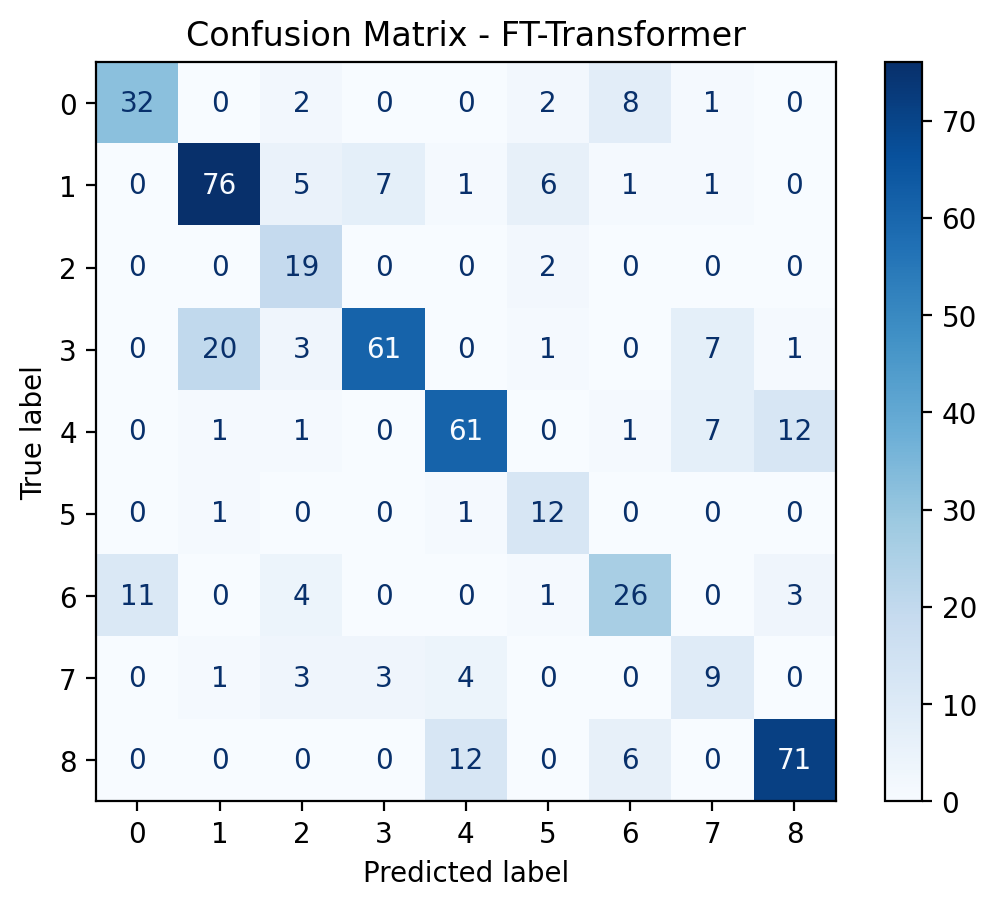

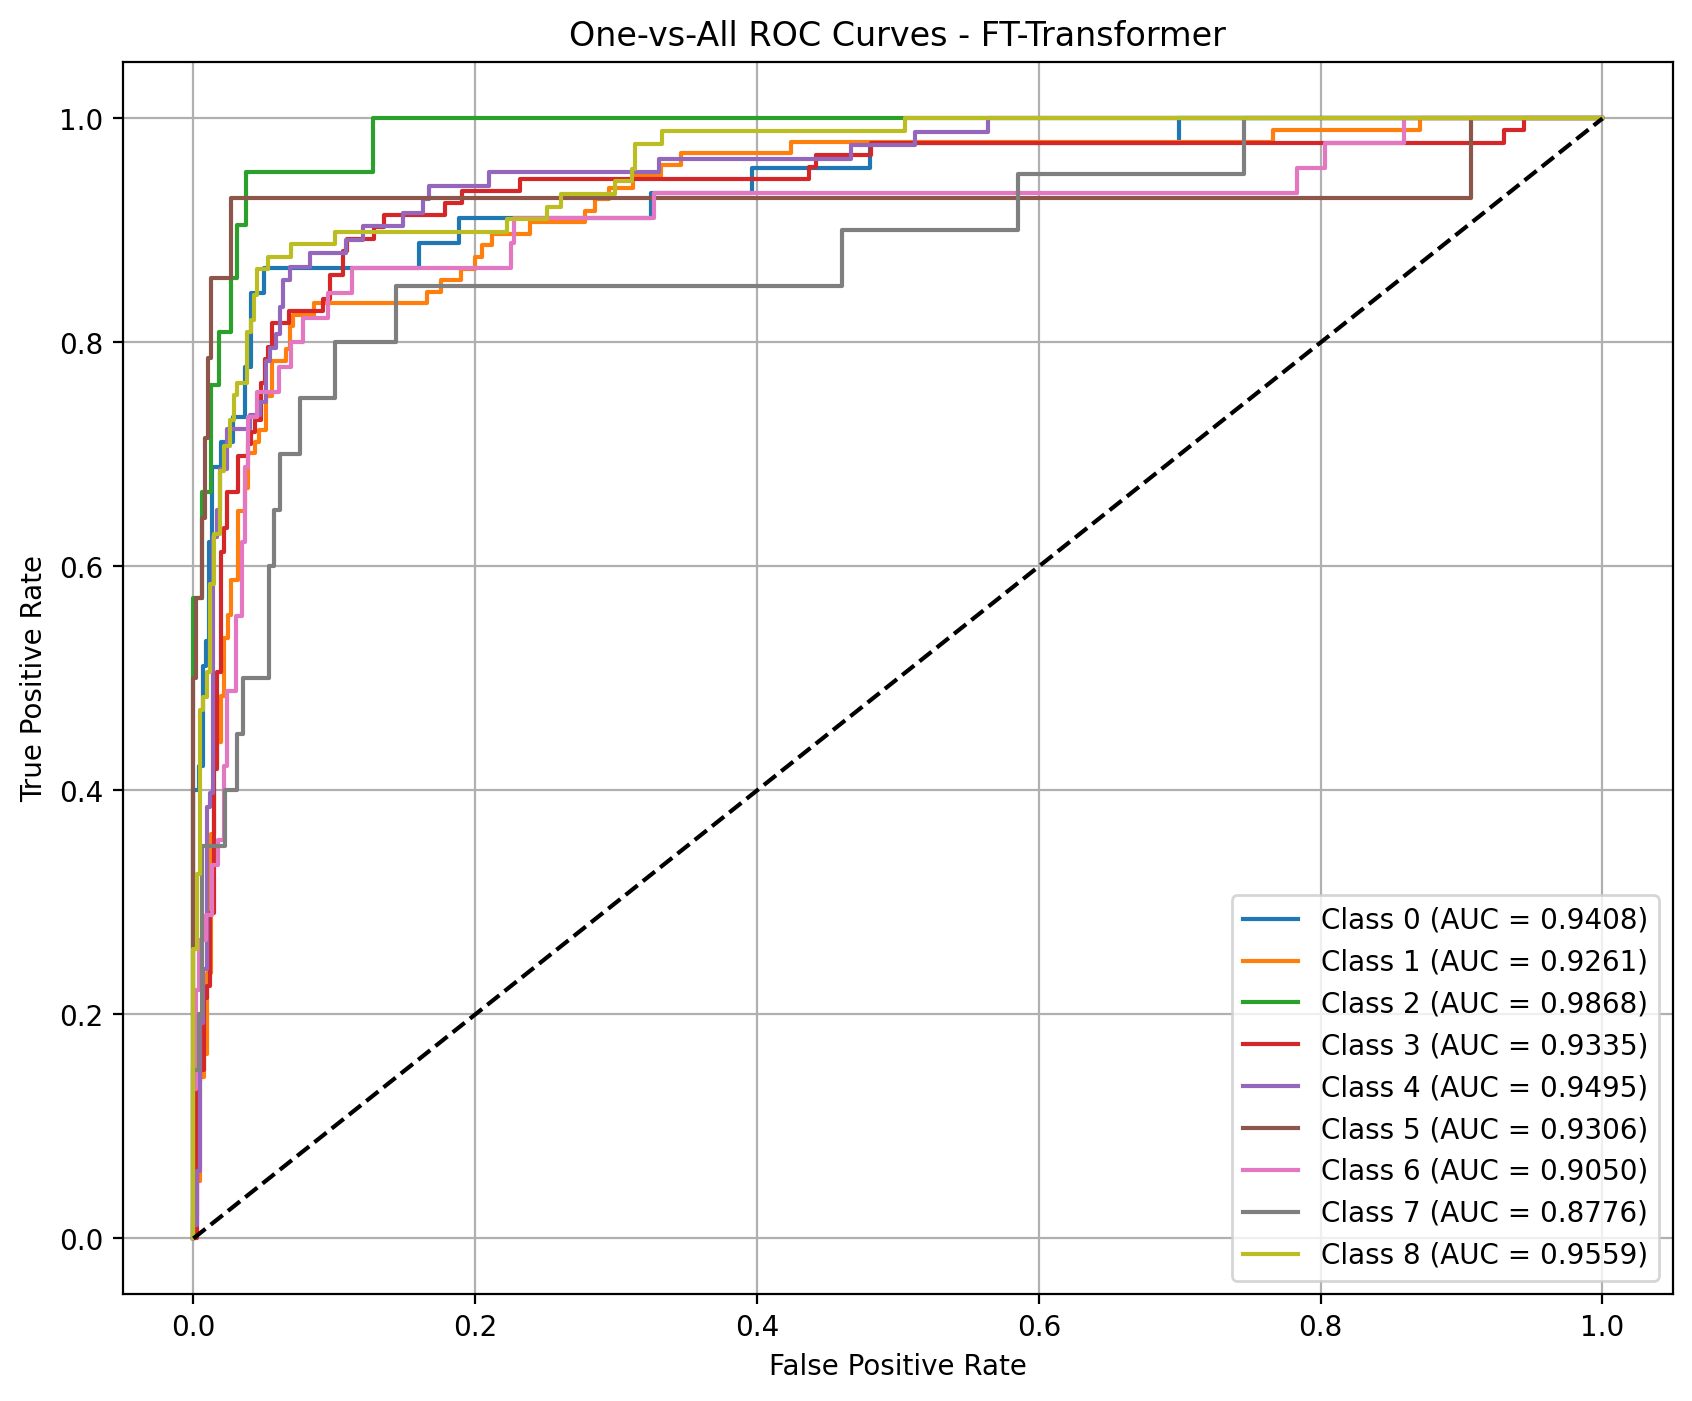

In [75]:
import torch
from tab_transformer_pytorch import FTTransformer
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define FT-Transformer
model = FTTransformer(
    categories=(1,),  # Dummy categorical feature with 1 category
    num_continuous=X_train_scaled.shape[1],  # Number of continuous features
    dim=32,  # Transformer embedding dimension
    dim_out=len(class_labels),  # Number of output classes
    depth=6,  # Depth of the transformer
    heads=8,  # Number of attention heads
    attn_dropout=0.1,  # Attention dropout
    ff_dropout=0.1  # Feedforward dropout
).to(device)

# Dataset preparation
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Dummy categorical input
dummy_categ = torch.zeros(X_train_tensor.size(0), 1, device=device, dtype=torch.long)

# Calculate class weights
class_counts = np.bincount(y_train)
class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float32).to(device)

# Define Weighted Cross-Entropy Loss
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_ft_transformer(model, X_train, y_train, X_val, y_val, dummy_categ, epochs=50, batch_size=32):
    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train.size(0))
        train_loss = 0.0

        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            X_batch, y_batch = X_train[indices], y_train[indices]
            categ_batch = dummy_categ[indices]  # Dummy categorical input

            optimizer.zero_grad()
            output = model(x_categ=categ_batch, x_numer=X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        with torch.no_grad():
            output = model(x_categ=torch.zeros(X_val.size(0), 1, device=device, dtype=torch.long), x_numer=X_val)
            val_pred = output.argmax(dim=1)
            val_accuracy = accuracy_score(y_val.cpu().numpy(), val_pred.cpu().numpy())

        if epoch + 1 == epochs:  # Print only the final epoch's result
            print(f"Train Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Train the model
train_ft_transformer(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, dummy_categ)

# Evaluation on test data
model.eval()
with torch.no_grad():
    categ_test = torch.zeros(X_test_tensor.size(0), 1, device=device, dtype=torch.long)  # Dummy categorical input
    test_output = model(x_categ=categ_test, x_numer=X_test_tensor)
    y_test_pred = test_output.argmax(dim=1).cpu().numpy()
    y_test_prob = torch.softmax(test_output, dim=1).cpu().numpy()

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# One-vs-All AUC
y_test_binarized = label_binarize(y_test, classes=range(len(class_labels)))
auc = roc_auc_score(y_test_binarized, y_test_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - FT-Transformer")
plt.show()

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_test_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - FT-Transformer")
plt.legend()
plt.grid()
plt.show()

# TabNet + weighted cross entropy loss


Early stopping occurred at epoch 63 with best_epoch = 43 and best_val_accuracy = 0.82353
Test Accuracy: 0.6667
Macro Precision: 0.6517
Macro Recall: 0.7002
Macro F1-Score: 0.6575


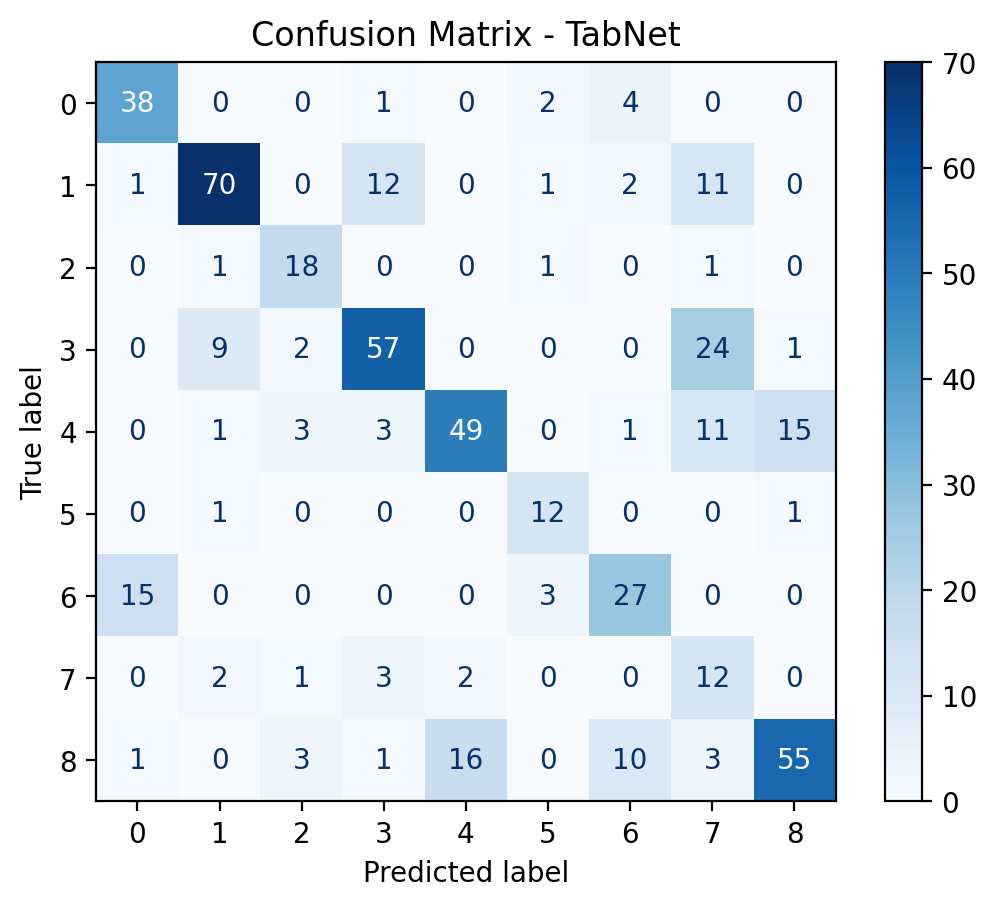

One-vs-All AUC: 0.9310


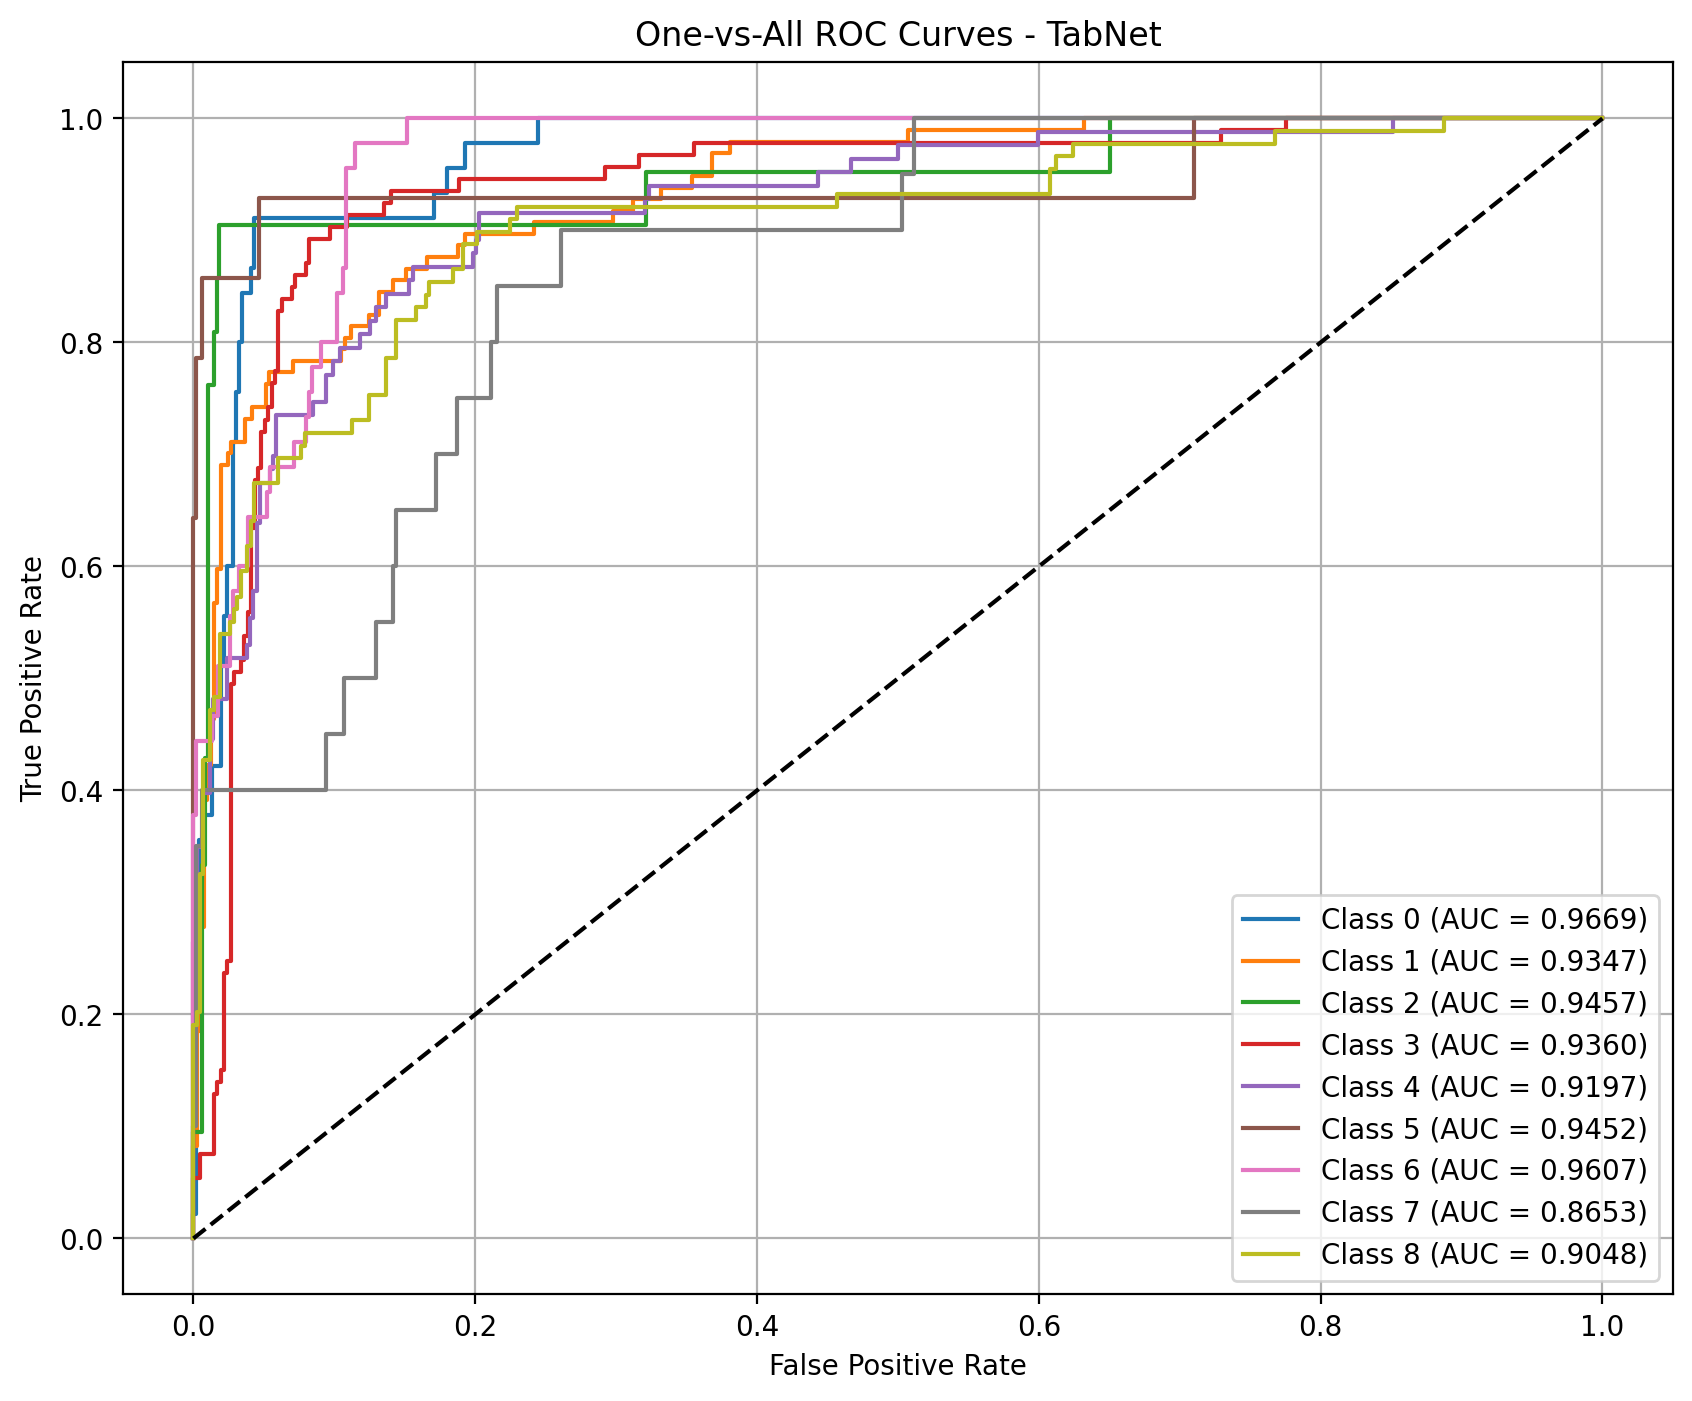

In [77]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt

# Convert scaled data to numpy arrays (TabNet works with numpy arrays)
X_train_np = X_train_scaled.values
X_val_np = X_val_scaled.values
X_test_np = X_test_scaled.values

y_train_np = y_train
y_val_np = y_val
y_test_np = y_test

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_np), y=y_train_np)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Define custom loss function with weights
def weighted_cross_entropy_loss(outputs, targets):
    weights = torch.tensor(class_weights, dtype=torch.float32).to(outputs.device)
    loss = torch.nn.CrossEntropyLoss(weight=weights)
    return loss(outputs, targets)

# Initialize TabNet Classifier
tabnet_model = TabNetClassifier(
    optimizer_params={"lr": 0.02},
    verbose=0,
    seed=42
)

# Train the model using scaled data
tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=200,  # Increased number of epochs
    patience=20,  # Allow more time for validation accuracy to improve
    batch_size=16,  # Reduced batch size for better convergence
    loss_fn=weighted_cross_entropy_loss  # Use weighted cross-entropy loss
)

# Predictions
y_pred = tabnet_model.predict(X_test_np)
y_prob = tabnet_model.predict_proba(X_test_np)

# Test Accuracy
test_accuracy = accuracy_score(y_test_np, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Macro Average Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_np, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(cmap="Blues")
plt.title("Confusion Matrix - TabNet")
plt.show()

# One-vs-All AUC and ROC Curves
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test_np, classes=range(len(class_labels)))  # Binarize labels

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - TabNet")
plt.legend()
plt.grid()
plt.show()

# 1D CNN + weighted cross entropy loss

Test Accuracy: 0.7318
Macro Precision: 0.7004
Macro Recall: 0.7405
Macro F1-Score: 0.7076


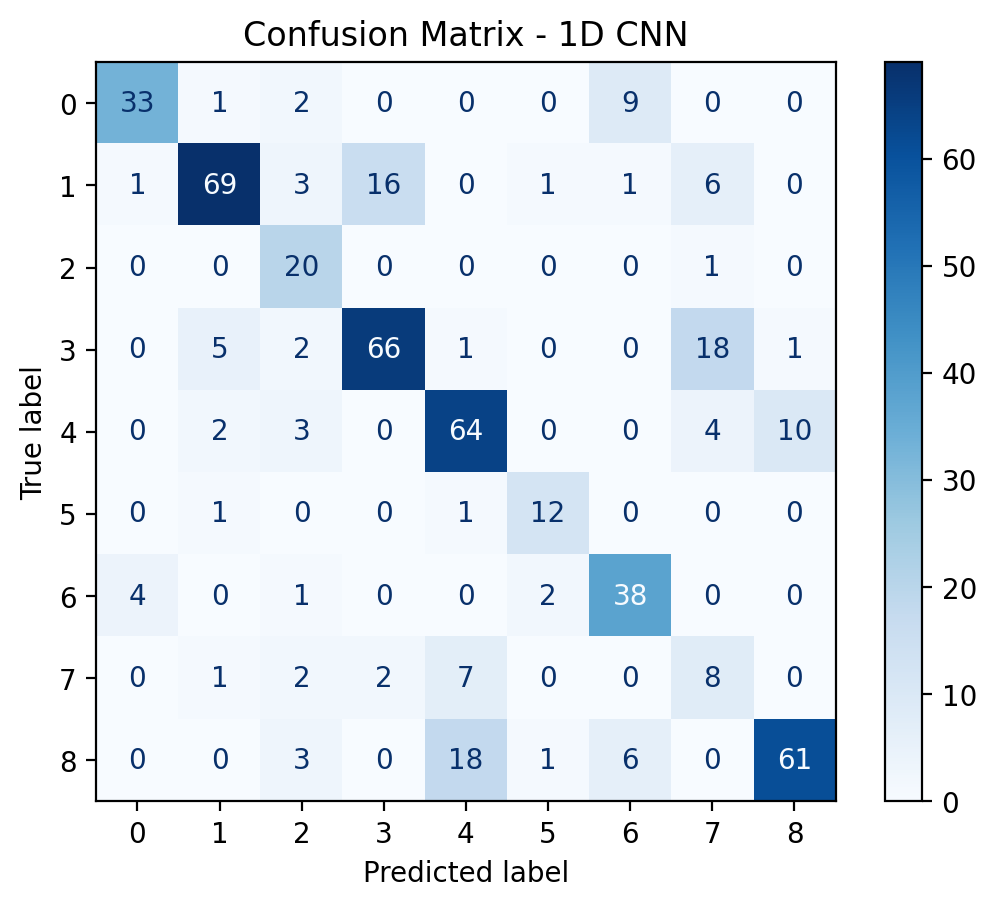

One-vs-All AUC: 0.9433


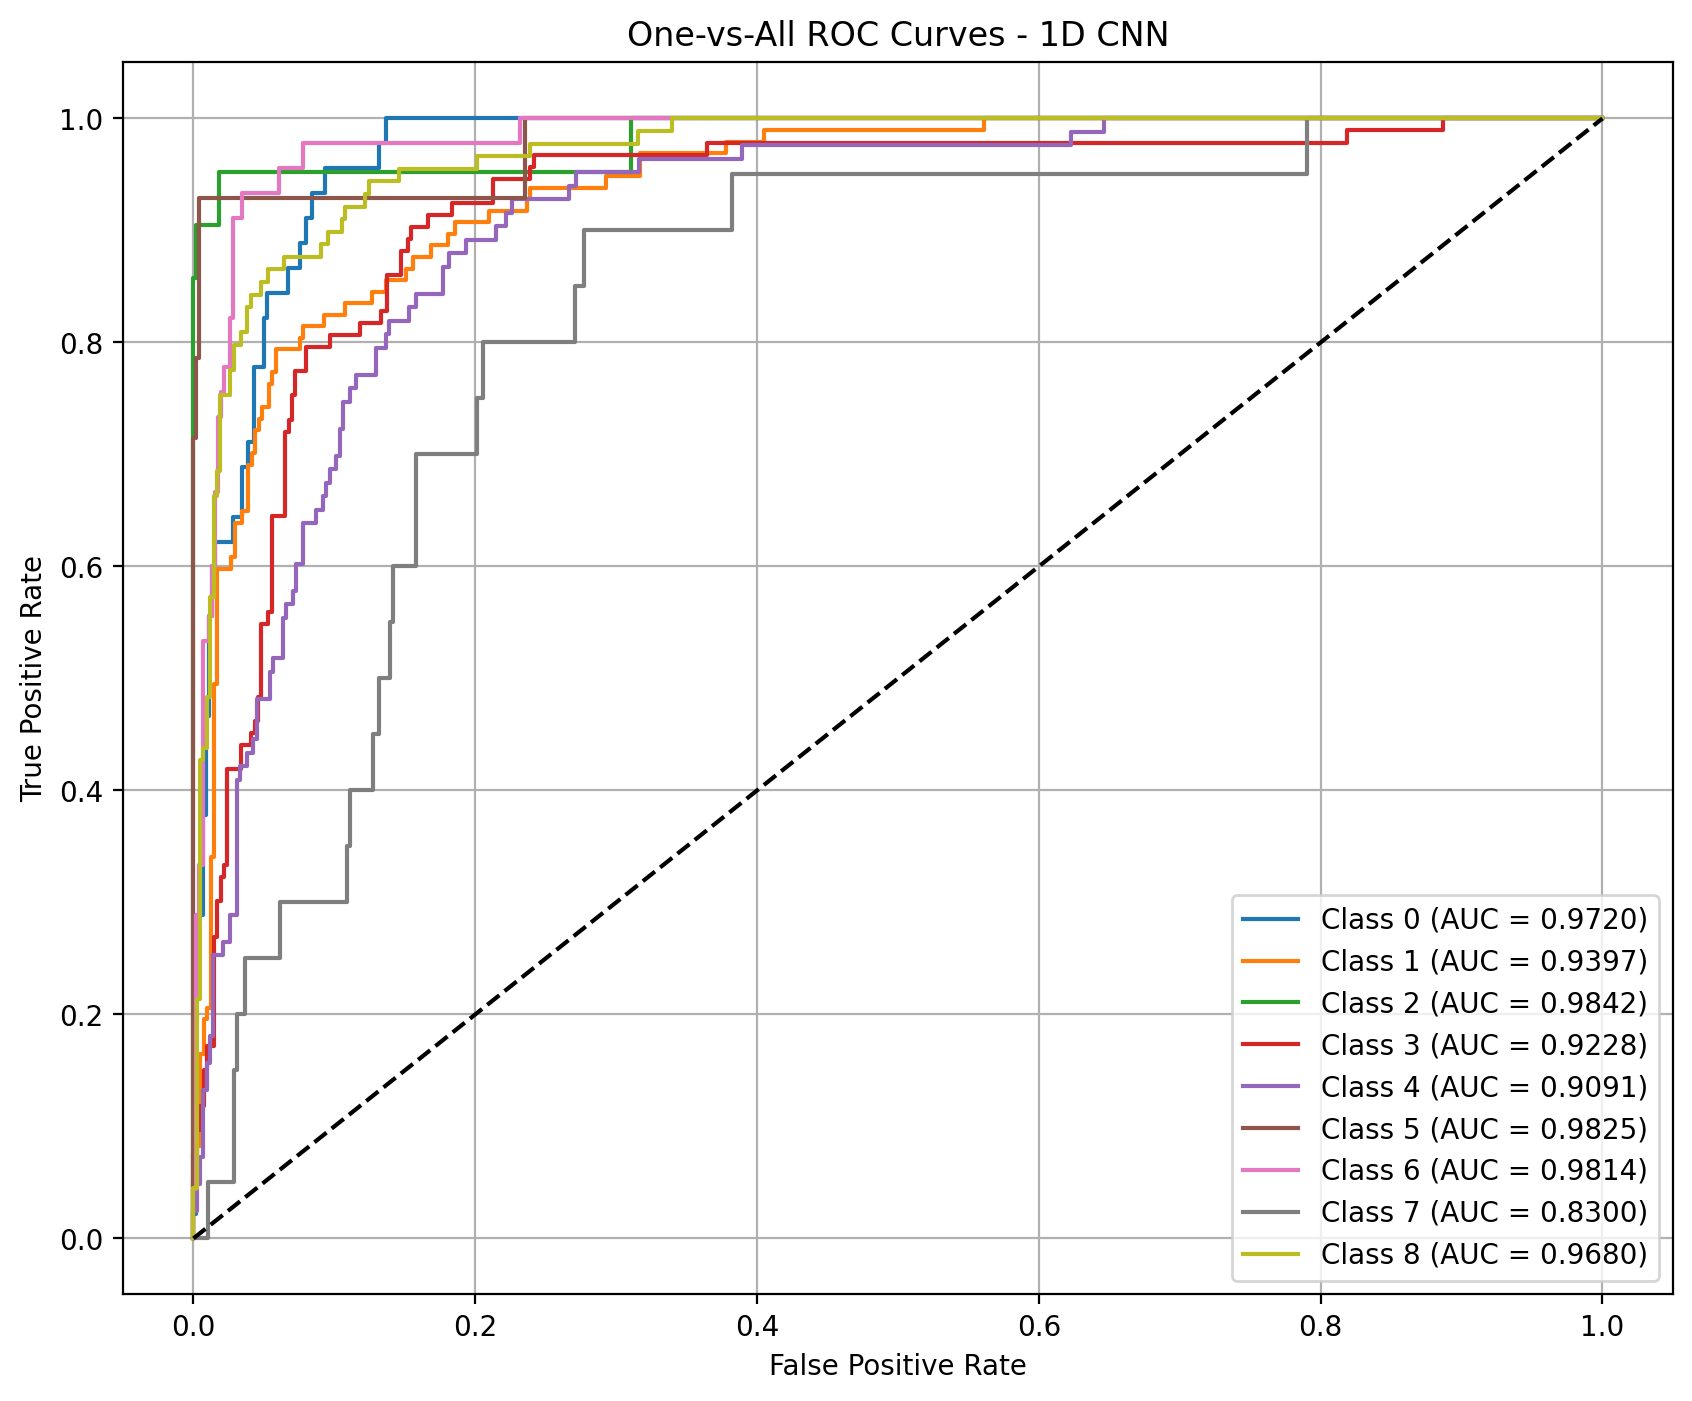

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_class_weight

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare data for PyTorch (convert to PyTorch tensors)
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32).unsqueeze(2)  # (samples, features, 1)
X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32).unsqueeze(2)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32).unsqueeze(2)

# Reshape input tensors for 1D CNN
X_train_tensor = X_train_tensor.permute(0, 2, 1)  # (samples, features, 1) -> (samples, 1, features)
X_val_tensor = X_val_tensor.permute(0, 2, 1)
X_test_tensor = X_test_tensor.permute(0, 2, 1)

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Define the CNN Model
class Tabular1DCNN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(Tabular1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, stride=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * ((num_features - 2) // 2), 128)  # Adjust based on input dimensions
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))  # Convolution + Activation
        x = self.pool(x)              # Max Pooling
        x = x.view(x.size(0), -1)     # Flatten
        x = self.relu(self.fc1(x))    # Fully connected layer + Activation
        x = self.dropout(x)           # Dropout
        x = self.fc2(x)               # Output layer
        return x

# Initialize the model
num_features = X_train_scaled.shape[1]
num_classes = len(class_labels)
model = Tabular1DCNN(num_features=num_features, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, X_train, y_train, X_val, y_val, num_epochs, batch_size, verbose=False):
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(X_val, y_val)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = correct / total
        if verbose:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Train the model with verbose=False to hide epoch logs
train_model(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, num_epochs=50, batch_size=32, verbose=False)

# Evaluate on test data
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)
    y_pred = y_pred.cpu().numpy()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Convert class labels to strings if they are integers
class_labels_str = [str(label) for label in class_labels]

# Classification report with macro precision, recall, and F1
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels_str).plot(cmap="Blues")
plt.title("Confusion Matrix - 1D CNN")
plt.show()

# One-vs-All AUC and ROC Curves
y_test_binarized = label_binarize(y_test, classes=range(num_classes))  # Binarize labels
y_prob = outputs.cpu().numpy()  # Model probabilities from the forward pass

# One-vs-All AUC
auc = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"One-vs-All AUC: {auc:.4f}")

# One-vs-All ROC Curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    class_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_labels_str[i]} (AUC = {class_auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-All ROC Curves - 1D CNN")
plt.legend()
plt.grid()
plt.show()

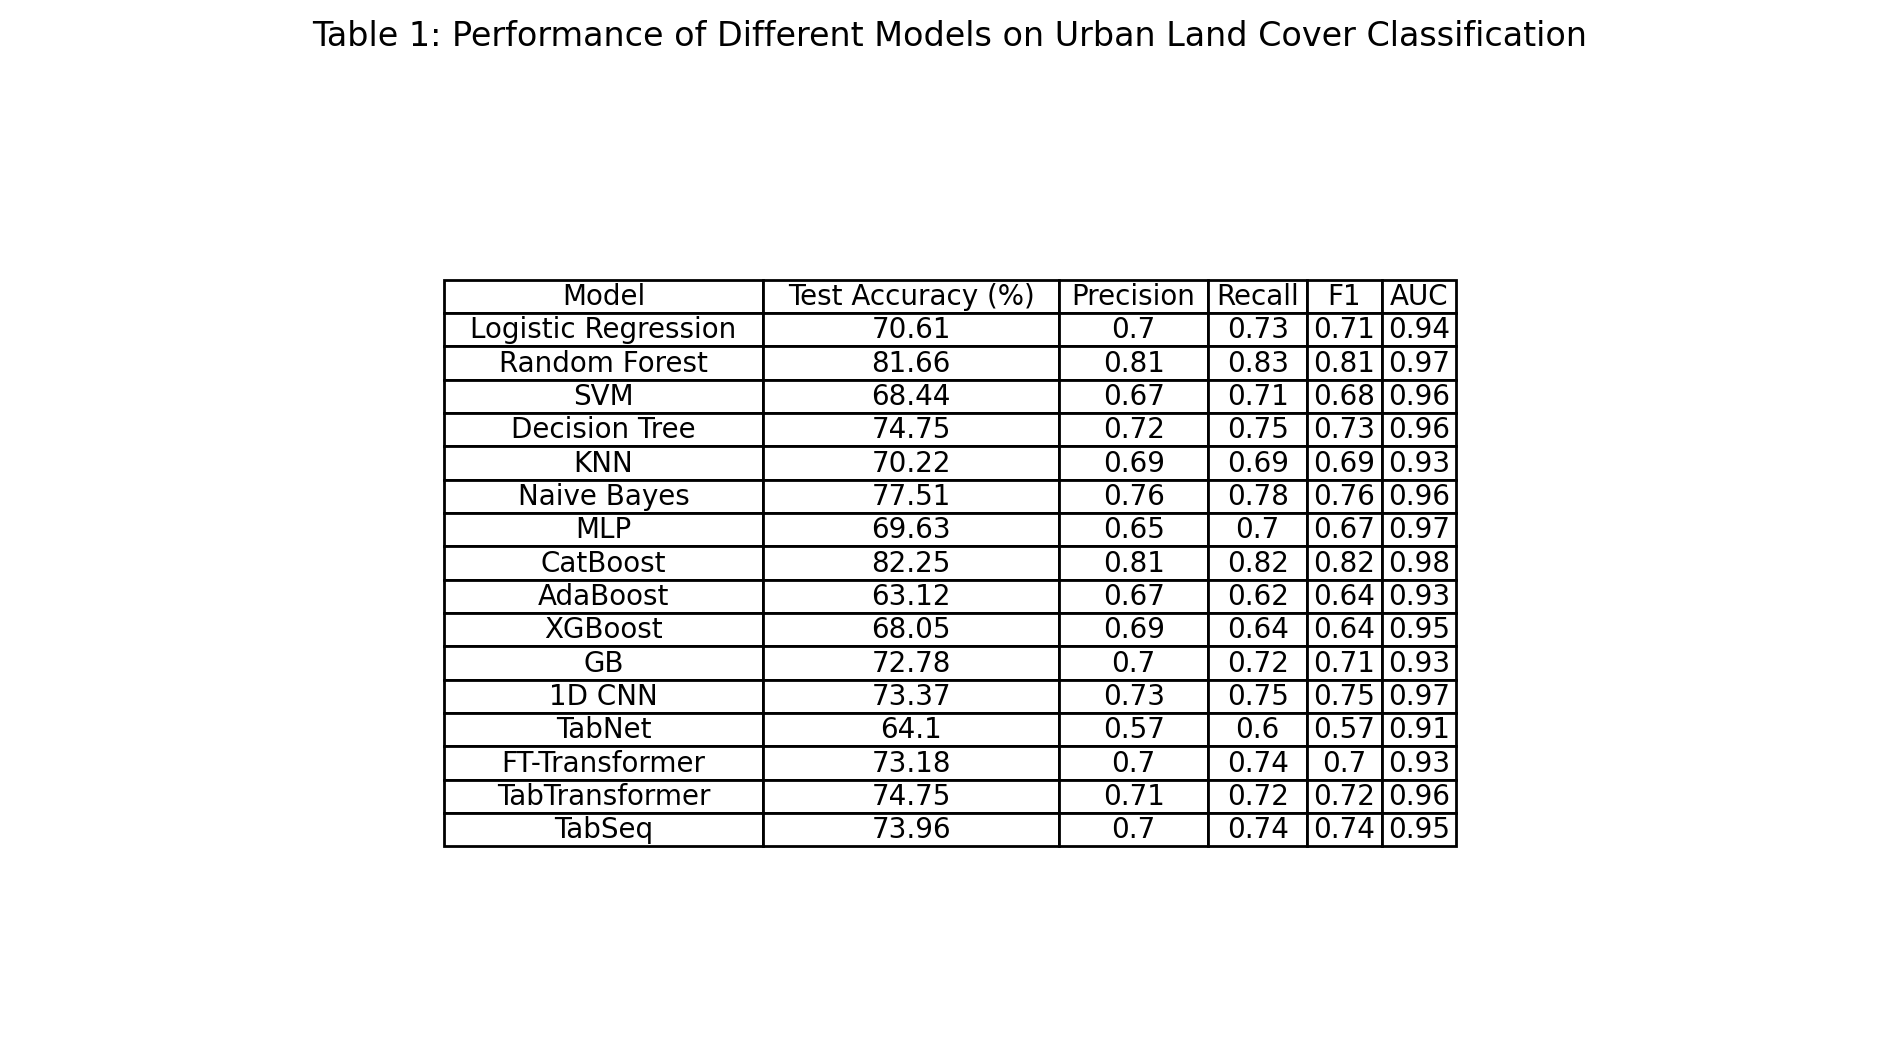

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
    "Model": [
        "Logistic Regression", "Random Forest", "SVM", "Decision Tree", "KNN",
        "Naive Bayes", "MLP", "CatBoost", "AdaBoost", "XGBoost", "GB", "1D CNN",
        "TabNet", "FT-Transformer", "TabTransformer", "TabSeq"
    ],
    "Test Accuracy (%)": [
        70.61, 81.66, 68.44, 74.75, 70.22, 77.51, 69.63, 82.25, 63.12,
        68.05, 72.78, 73.37, 64.10, 73.18, 74.75, 73.96
    ],
    "Precision": [
        0.7, 0.81, 0.67, 0.72, 0.69, 0.76, 0.65, 0.81, 0.67, 0.69, 0.7,
        0.73, 0.57, 0.7, 0.71, 0.7
    ],
    "Recall": [
        0.73, 0.83, 0.71, 0.75, 0.69, 0.78, 0.7, 0.82, 0.62, 0.64, 0.72,
        0.75, 0.6, 0.74, 0.72, 0.74
    ],
    "F1": [
        0.71, 0.81, 0.68, 0.73, 0.69, 0.76, 0.67, 0.82, 0.64, 0.64, 0.71,
        0.75, 0.57, 0.7, 0.72, 0.74
    ],
    "AUC": [
        0.94, 0.97, 0.96, 0.96, 0.93, 0.96, 0.97, 0.98, 0.93, 0.95, 0.93,
        0.97, 0.91, 0.93, 0.96, 0.95
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the table using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Add table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc="center",
    loc="center",
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Add caption
plt.title("Table 1: Performance of Different Models on Urban Land Cover Classification", pad=20)

plt.show()

# Bar Chart for Test Accurcay

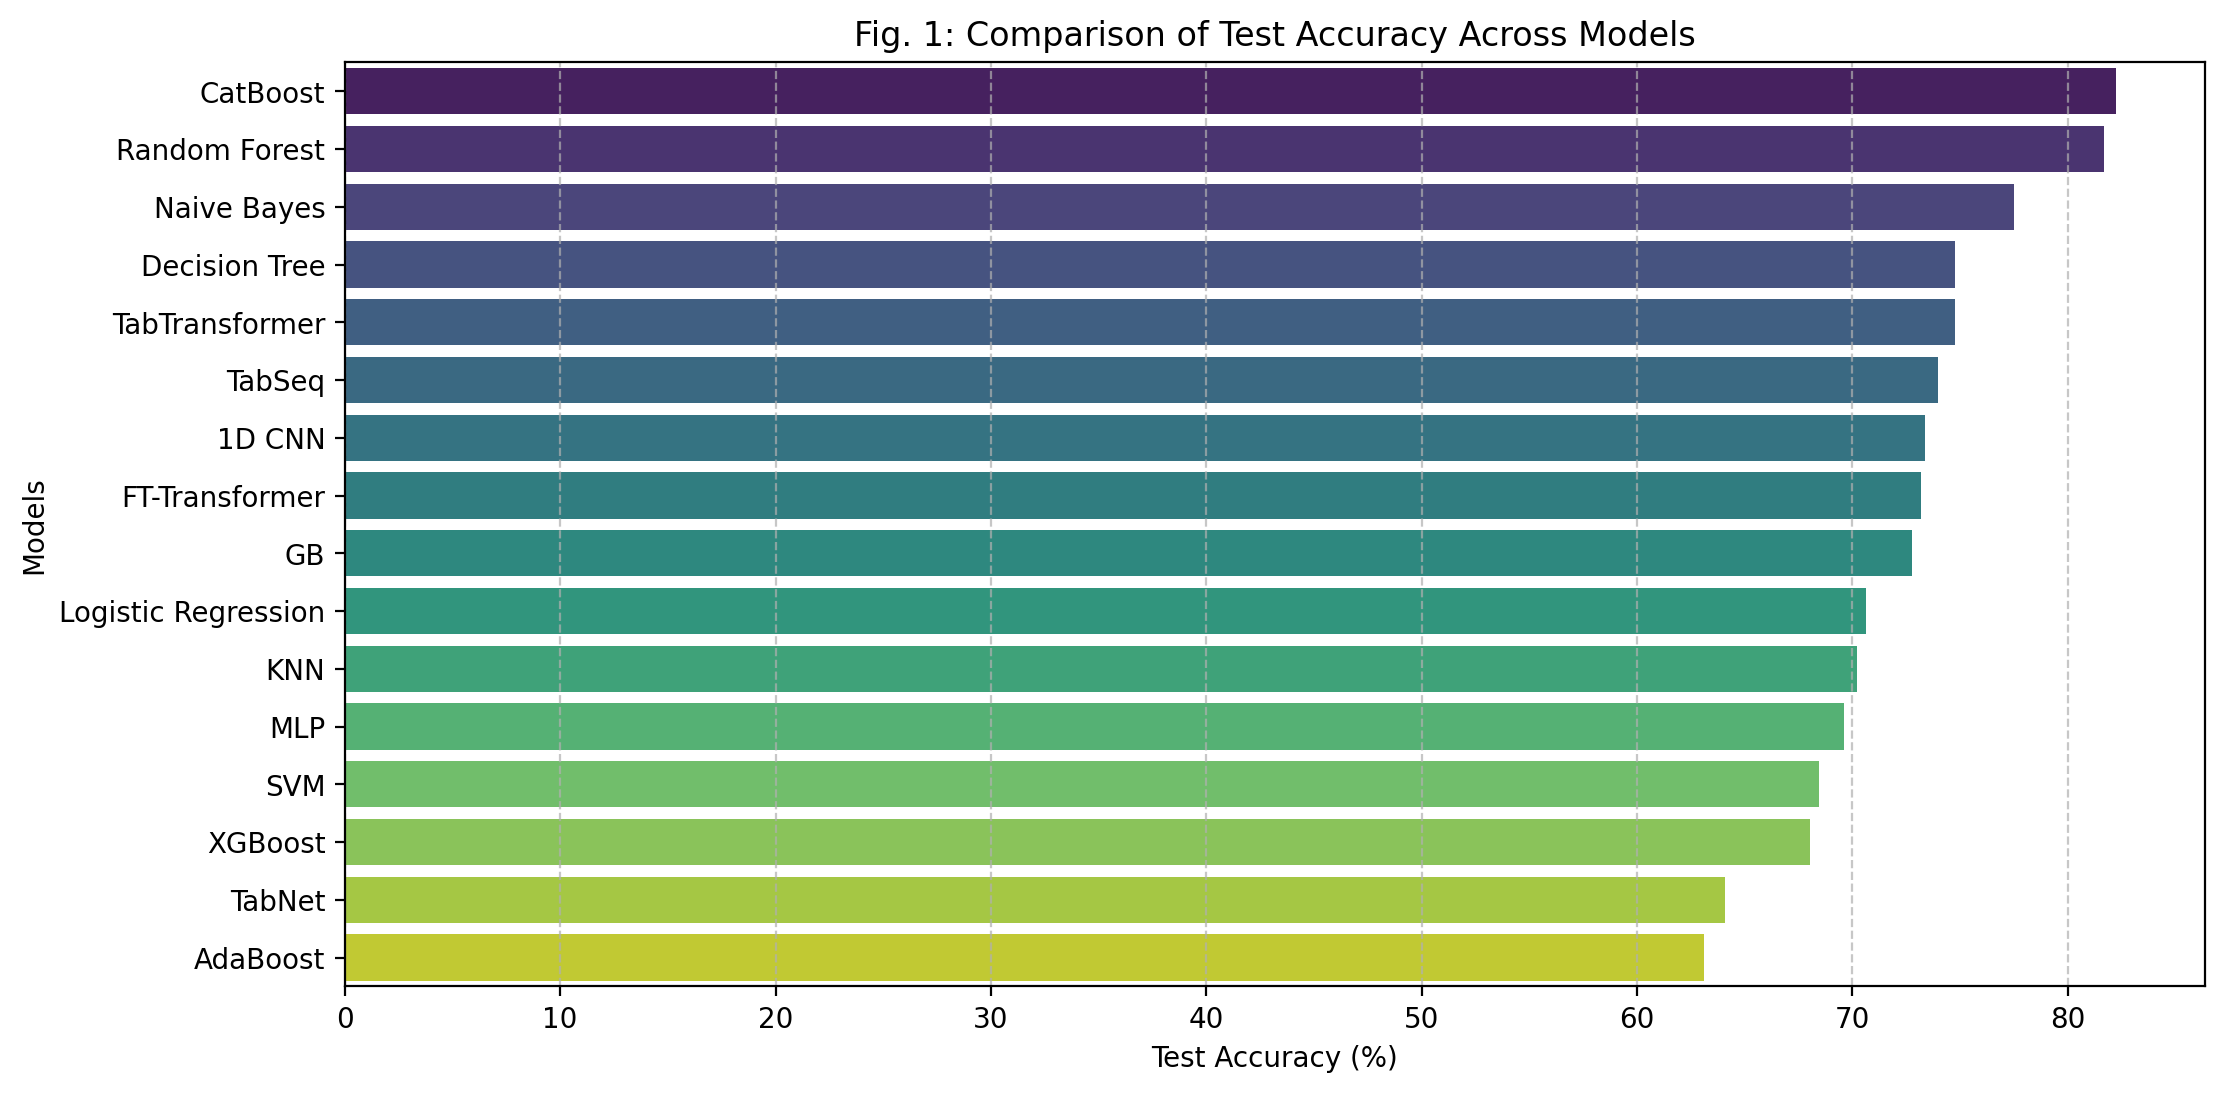

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by Test Accuracy (%) for better visualization
df_sorted = df.sort_values(by="Test Accuracy (%)", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Test Accuracy (%)", y="Model", data=df_sorted, palette="viridis")
plt.xlabel("Test Accuracy (%)")
plt.ylabel("Models")
plt.title("Fig. 1: Comparison of Test Accuracy Across Models")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Radar Chart for Multi-Metric Comparison

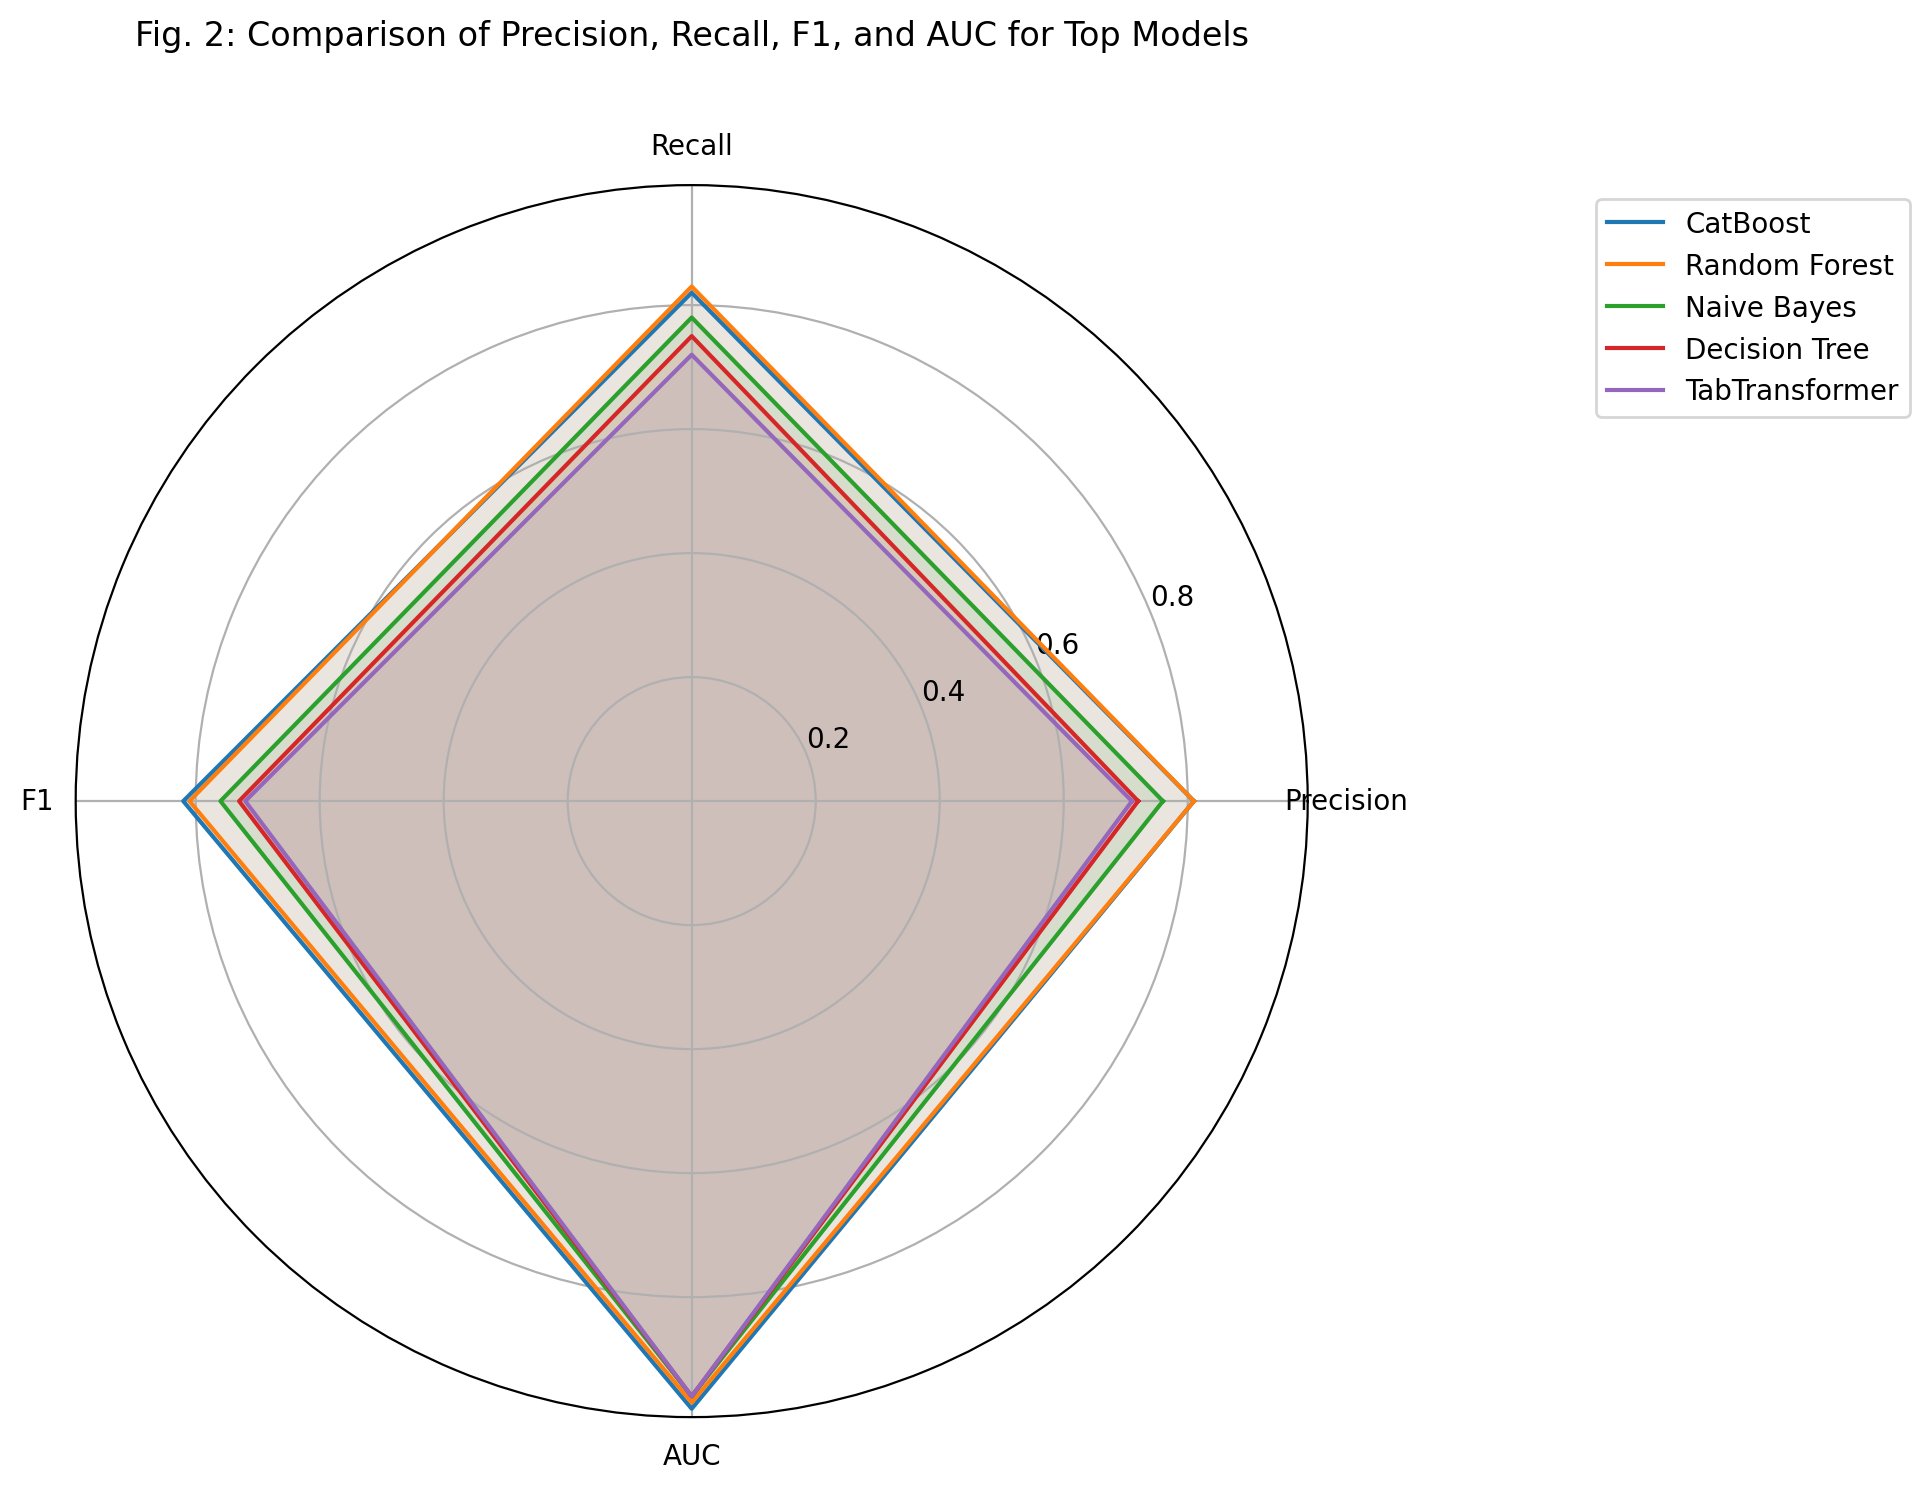

In [94]:
from math import pi

# Select top 5 models (sorted by Test Accuracy)
top_models = df_sorted.head(5)

metrics = ["Precision", "Recall", "F1", "AUC"]
angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # Complete the circle

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot for each model
for i, row in top_models.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, label=row["Model"])
    ax.fill(angles, values, alpha=0.1)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title("Fig. 2: Comparison of Precision, Recall, F1, and AUC for Top Models", y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.show()

# Heatmap for Metric Comparison

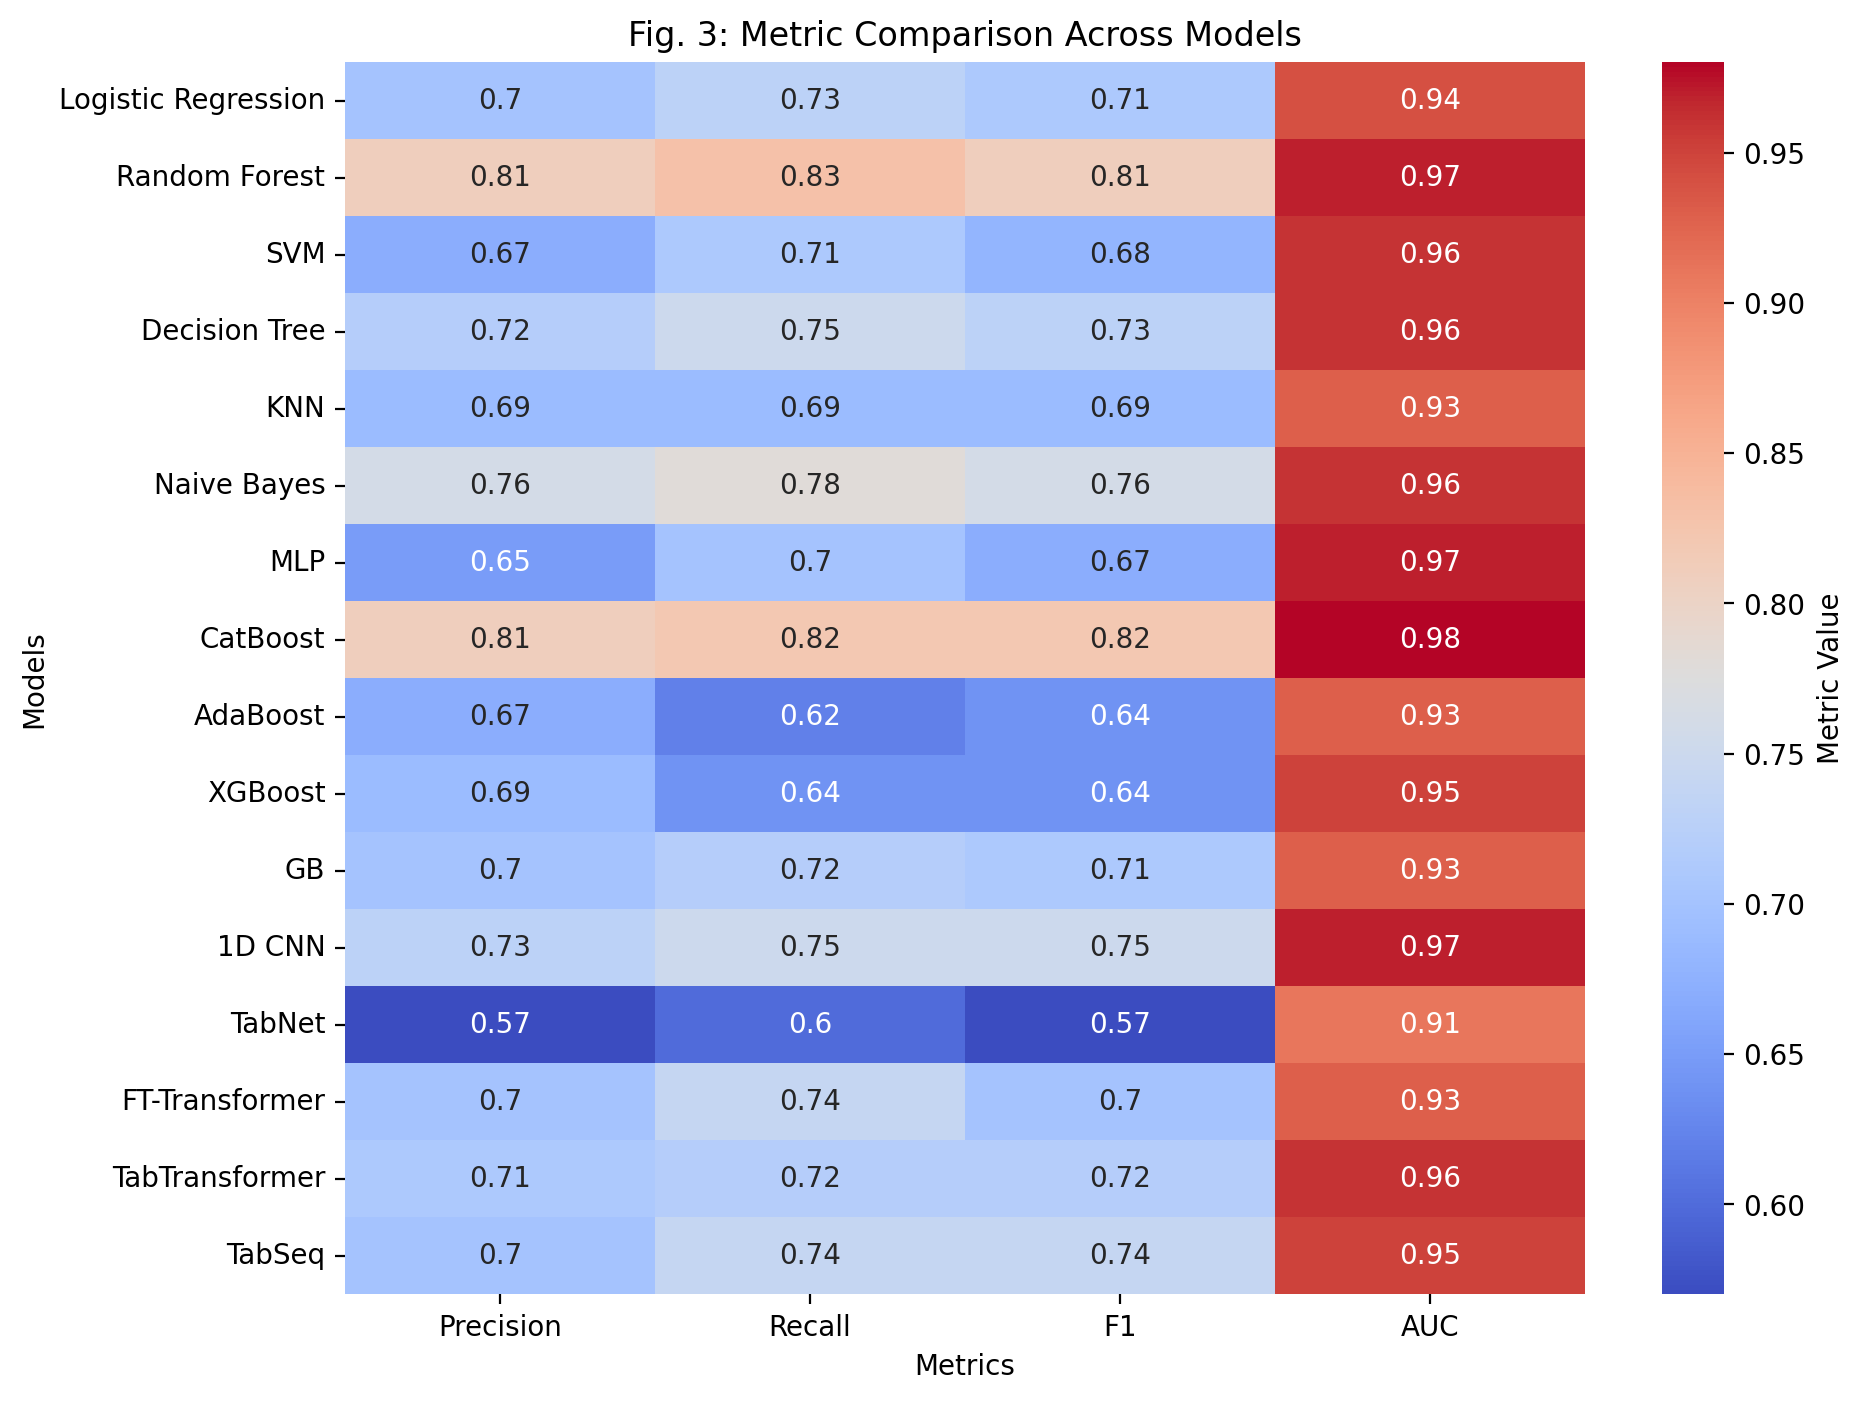

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[["Precision", "Recall", "F1", "AUC"]].set_index(df["Model"]),
    annot=True,
    cmap="coolwarm",
    cbar_kws={"label": "Metric Value"}
)
plt.title("Fig. 3: Metric Comparison Across Models")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()

# Line Chart for Deep Learning Models

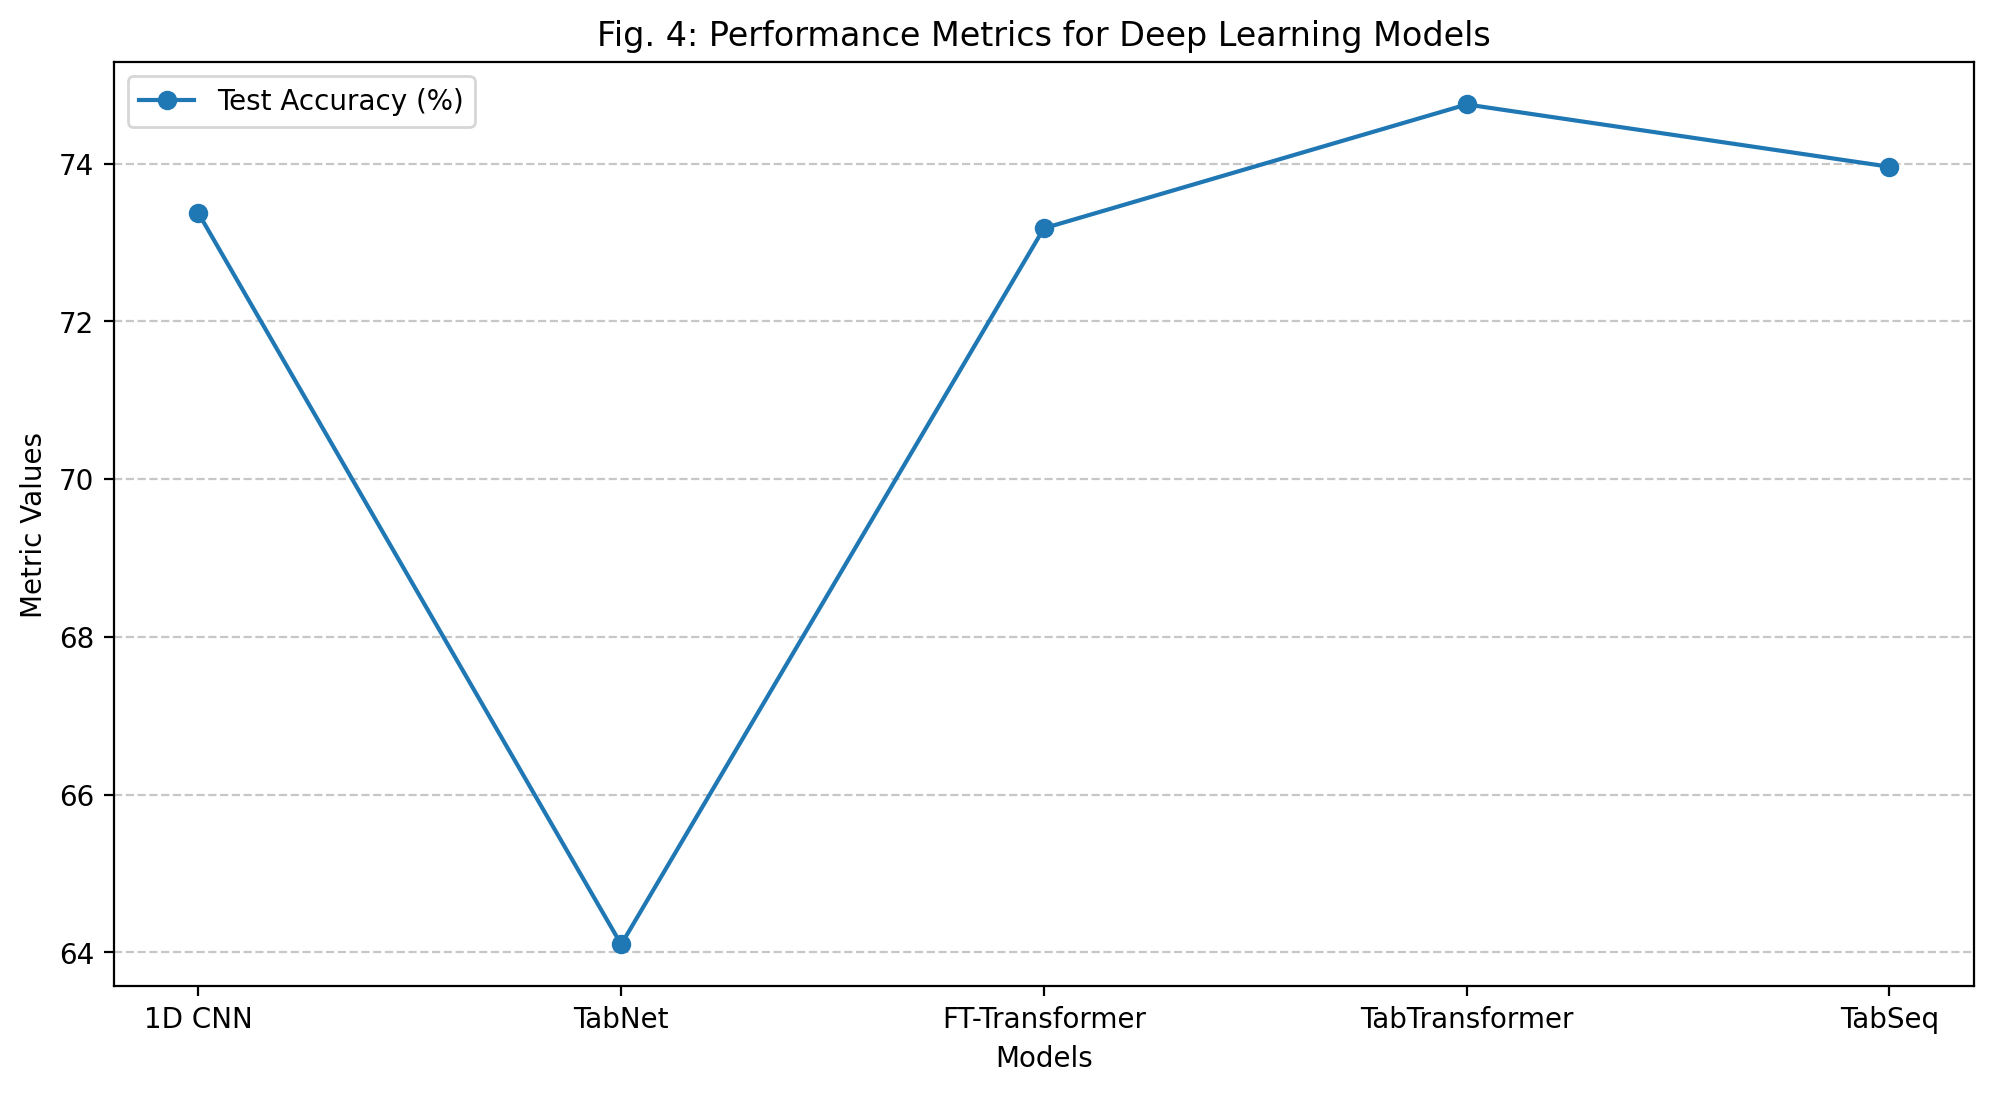

In [100]:
# Subset data for deep learning models
dl_models = df[df["Model"].isin(["1D CNN", "TabNet", "FT-Transformer", "TabTransformer", "TabSeq"])]

plt.figure(figsize=(12, 6))
for metric in ["Test Accuracy (%)"]:
    plt.plot(dl_models["Model"], dl_models[metric], marker="o", label=metric)

plt.title("Fig. 4: Performance Metrics for Deep Learning Models")
plt.xlabel("Models")
plt.ylabel("Metric Values")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Adding Weighted Crossentropy Loss to Deep Learning Models

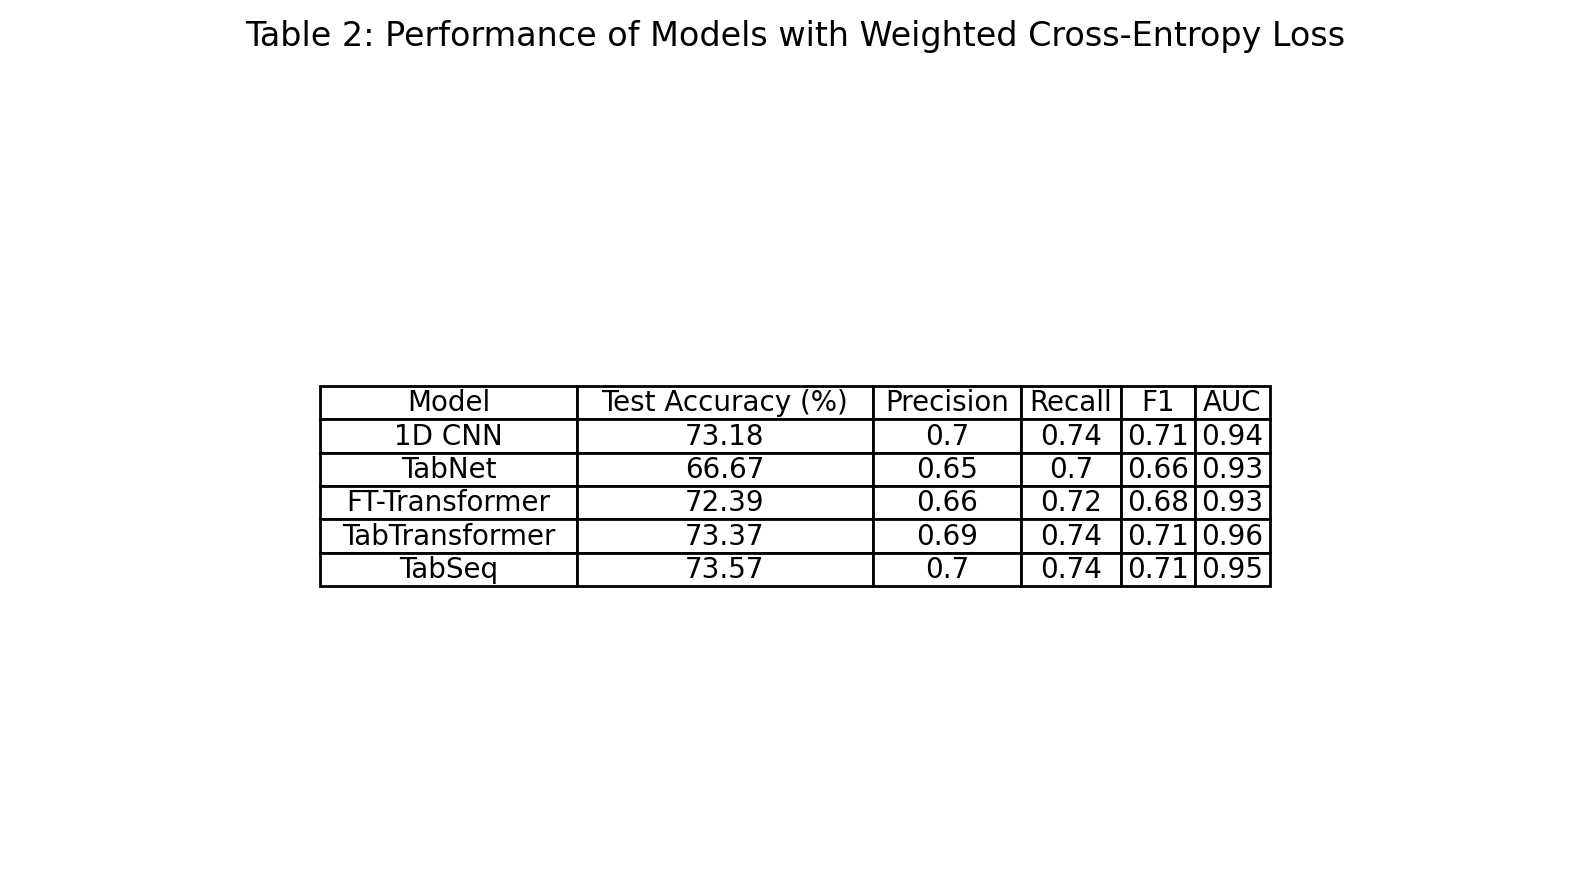

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data_weighted = {
    "Model": ["1D CNN", "TabNet", "FT-Transformer", "TabTransformer", "TabSeq"],
    "Test Accuracy (%)": [73.18, 66.67, 72.39, 73.37, 73.57],
    "Precision": [0.70, 0.65, 0.66, 0.69, 0.70],
    "Recall": [0.74, 0.70, 0.72, 0.74, 0.74],
    "F1": [0.71, 0.66, 0.68, 0.71, 0.71],
    "AUC": [0.94, 0.93, 0.93, 0.96, 0.95]
}

# Create the DataFrame
df_weighted = pd.DataFrame(data_weighted)

# Display the table using Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')

# Add table
table = ax.table(
    cellText=df_weighted.values,
    colLabels=df_weighted.columns,
    cellLoc="center",
    loc="center",
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_weighted.columns))))

# Add caption
plt.title("Table 2: Performance of Models with Weighted Cross-Entropy Loss", pad=20)

plt.show()

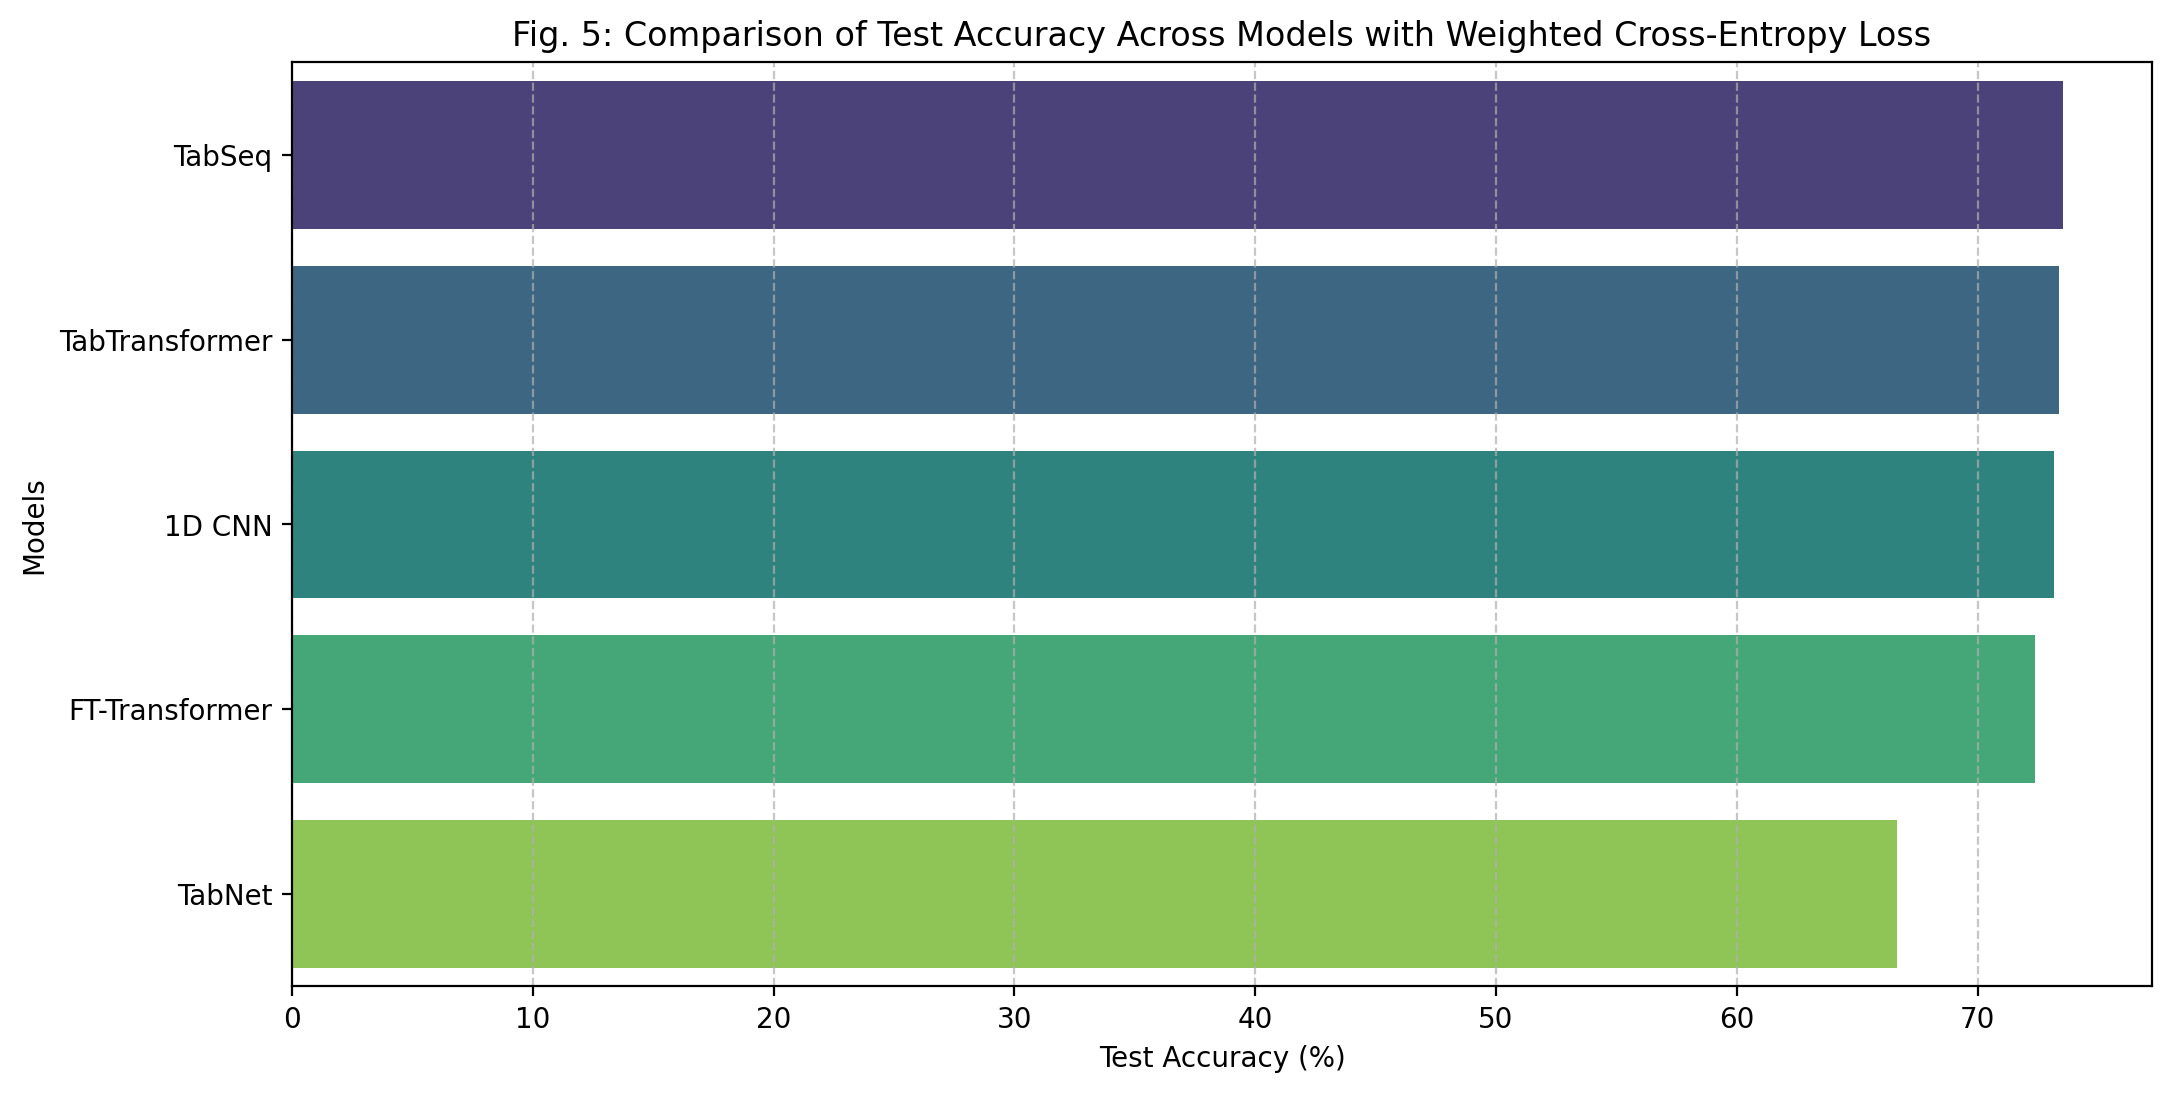

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by Test Accuracy for better visualization
df_sorted_weighted = df_weighted.sort_values(by="Test Accuracy (%)", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Test Accuracy (%)", y="Model", data=df_sorted_weighted, palette="viridis")
plt.xlabel("Test Accuracy (%)")
plt.ylabel("Models")
plt.title("Fig. 5: Comparison of Test Accuracy Across Models with Weighted Cross-Entropy Loss")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

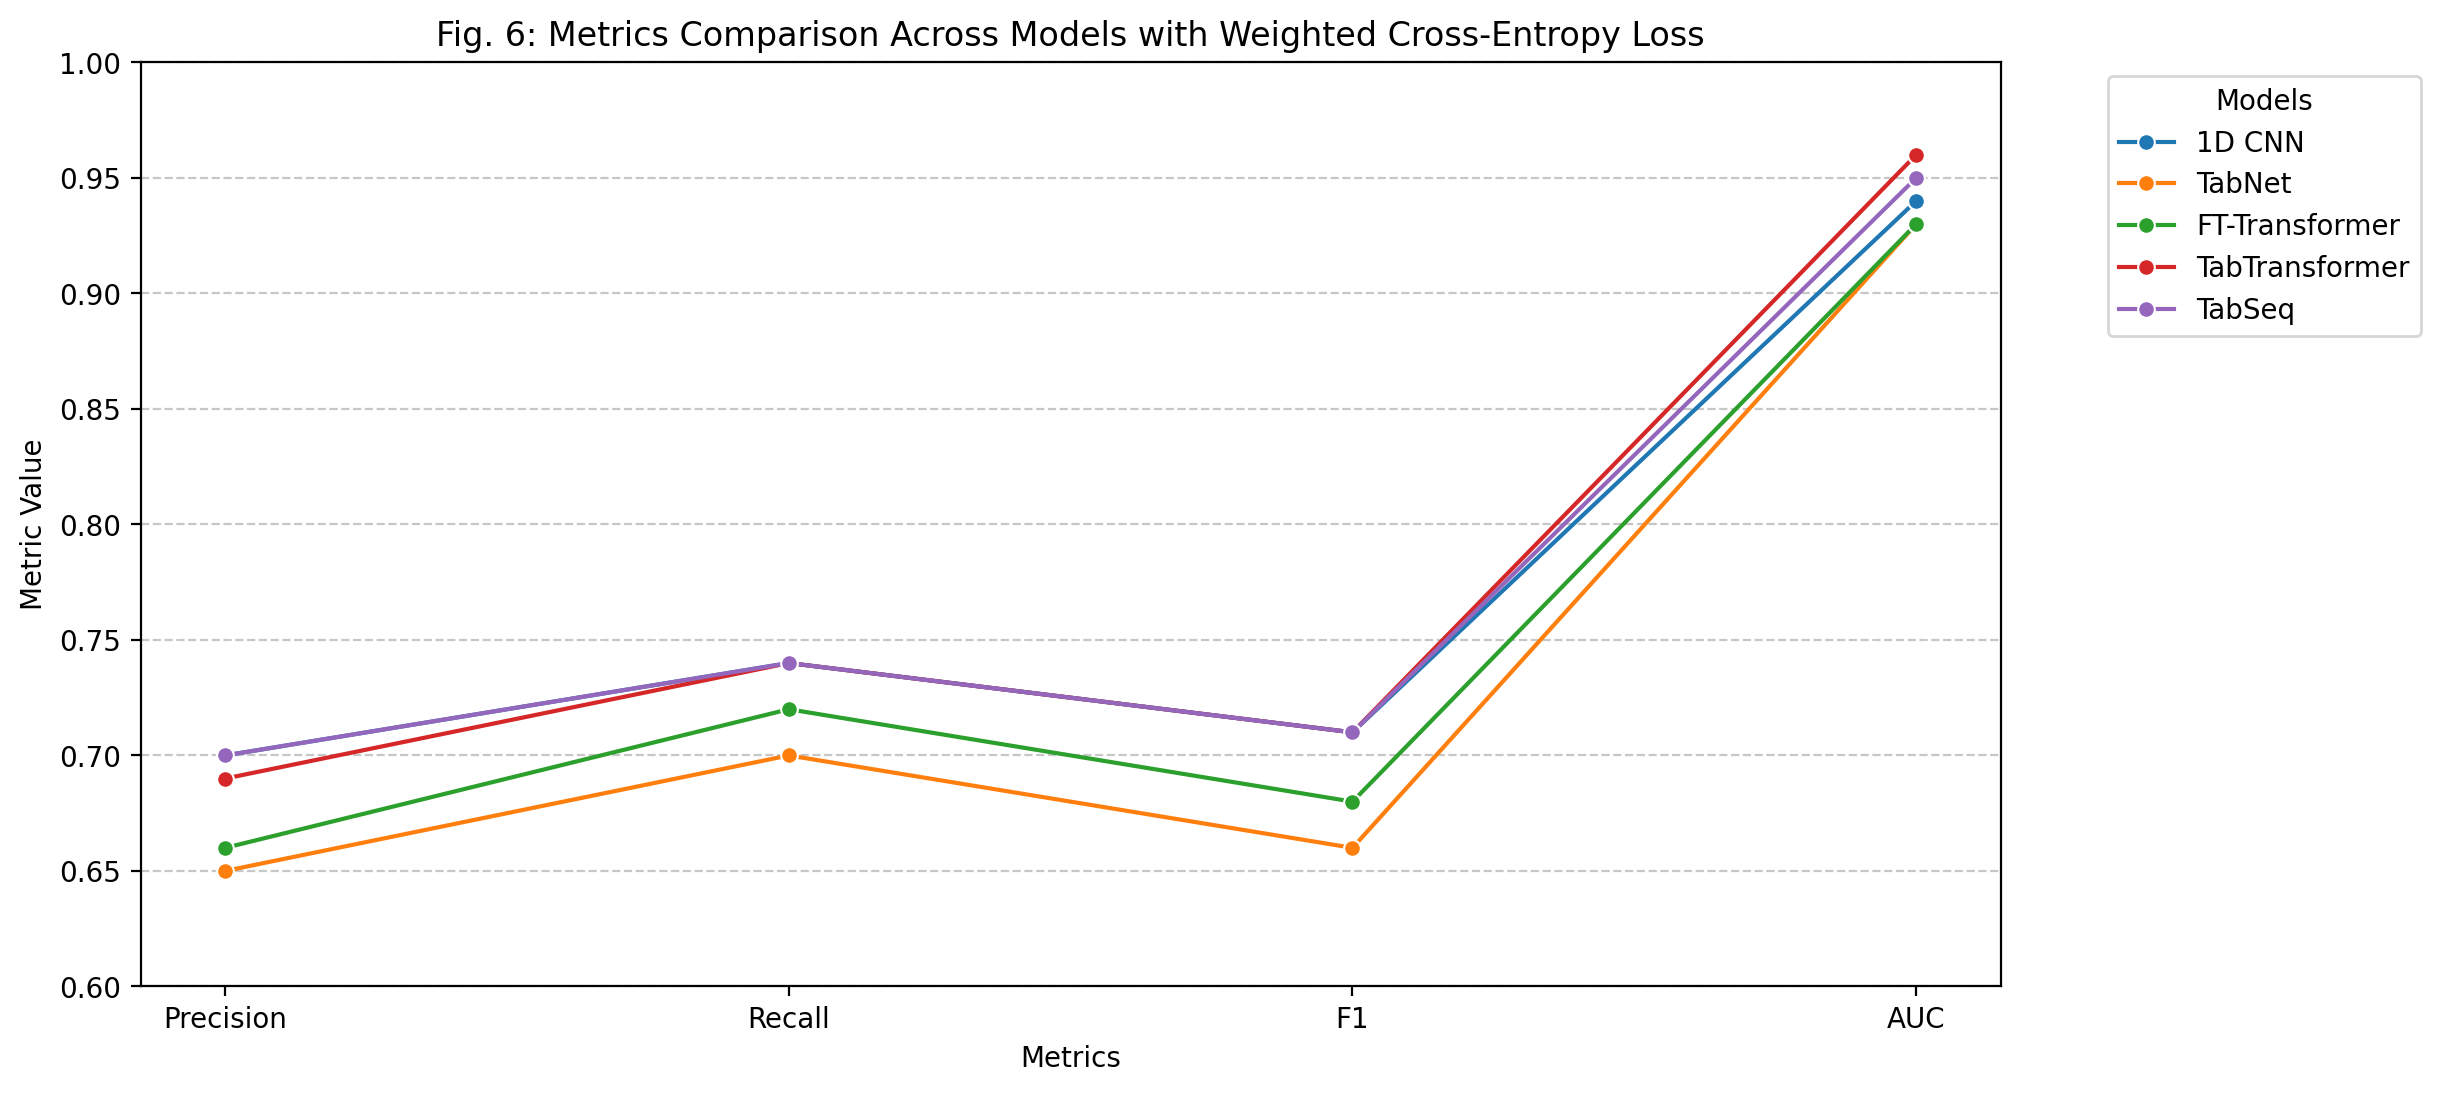

In [106]:
# Melt the data for line plot
df_melted = df_weighted.melt(id_vars="Model", var_name="Metric", value_name="Value")
metrics_to_plot = ["Precision", "Recall", "F1", "AUC"]  # Metrics to visualize

# Filter the melted DataFrame for selected metrics
df_melted_filtered = df_melted[df_melted["Metric"].isin(metrics_to_plot)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted_filtered, x="Metric", y="Value", hue="Model", marker="o")
plt.ylim(0.6, 1.0)
plt.title("Fig. 6: Metrics Comparison Across Models with Weighted Cross-Entropy Loss")
plt.ylabel("Metric Value")
plt.xlabel("Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# References

[1] Johnson, B. (2013). Urban Land Cover [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C53S48.

[2] C. R. Rao. "Linear Statistical Inference and Its Applications." Wiley, 1973.

[3] Breiman, Leo. "Random Forests." Machine Learning 45.1 (2001): 5-32.

[4] Cortes, Corinna, and Vladimir Vapnik. "Support-vector networks." Machine Learning 20.3 (1995): 273-297.

[5] Cover, T., and Hart, P. "Nearest neighbor pattern classification." IEEE Transactions on Information Theory 13.1 (1967): 21-27.

[6] Duda, R. O., and Hart, P. E. "Pattern Classification and Scene Analysis." Wiley, 1973.

[7] Chen, Tianqi, and Carlos Guestrin. "XGBoost: A scalable tree boosting system." Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (2016): 785-794.

[8] Prokhorenkova, L., et al. "CatBoost: unbiased boosting with categorical features." Advances in Neural Information Processing Systems 31 (2018): 6638-6648.

[9] Freund, Yoav, and Robert E. Schapire. "A decision-theoretic generalization of on-line learning and an application to boosting." Journal of Computer and System Sciences 55.1 (1997): 119-139.

[10] Friedman, Jerome H. "Greedy function approximation: a gradient boosting machine." The Annals of Statistics 29.5 (2001): 1189-1232.

[11] Quinlan, J. Ross. "Induction of Decision Trees." Machine Learning 1.1 (1986): 81-106.

[12] Rumelhart, David E., Geoffrey E. Hinton, and Ronald J. Williams. "Learning representations by back-propagating errors." Nature 323.6088 (1986): 533-536.

[13] Arik, Sercan O., and Tomas Pfister. "TabNet: Attentive interpretable tabular learning." Proceedings of the AAAI Conference on Artificial Intelligence 35.8 (2021): 6679-6687.

[14] Huang, Xin, et al. "TabTransformer: Tabular data modeling using contextual embeddings." arXiv preprint arXiv:2012.06678 (2020).

[15] Gorishniy, Yury, et al. "Revisiting deep learning models for tabular data." Advances in Neural Information Processing Systems 34 (2021): 18932-18943.

[16] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

[17] Habib, Zadid, et al. "TabSeq: A Framework for Deep Learning on Tabular Data via Sequential Ordering." Proceedings of the International Conference on Pattern Recognition (ICPR), Springer, 2024.

[18] https://github.com/zadid6pretam/TabSeq/tree/main

[19] https://github.com/lucidrains/tab-transformer-pytorch

[20] Johnson, B. A., & Iizuka, K. (2016). Integrating OpenStreetMap crowdsourced data and Landsat time-series imagery for rapid land use/land cover (LULC) mapping. Applied Geography, 67, 140–149.

[21] Johnson, B. (2015). Remote sensing image fusion at the segment level using a spatially-weighted approach: applications for land cover spectral analysis and mapping. ISPRS International Journal of Geo-Information, 4(1), 172-184.

[22] Wickham, J., Homer, C., Vogelmann, J., McKerrow, A., Mueller, R., Herold, N., & Coulston, J. (2014). The Multi-Resolution Land Characteristics (MRLC) Consortium—20 years of development and integration of USA national land cover data. Remote Sensing, 6(8), 7424–7441.

[23] Jozdani, S. E., Johnson, B. A., & Chen, D. (2019). Comparing deep neural networks, ensemble classifiers, and support vector machine algorithms for object-based urban land use/land cover classification. Remote Sensing, 11(1713). https://doi.org/10.3390/rs11141713

[24] Jin, S., Homer, C., Yang, L., Danielson, P., Dewitz, J., Li, C., Zhu, Z., Xian, G., & Howard, D. (2019). Overall methodology design for the United States National Land Cover Database 2016 products. Remote Sensing, 11(24), 2971.

[25] Ducey, M. J., Johnson, K. M., Belair, E. P., & Cook, B. D. (2018). The influence of human demography on land cover change in the Great Lakes States, USA. Environmental Management, 62(6), 1089–1107. https://doi.org/10.1007/s00267-018-1102-x
